In [1]:
import yaml
import matplotlib.pyplot as plt
from os import listdir
import math

In [2]:
PATH_Wjets_non_pesati = "Wjets/slice_notrack/R_non_pesati"
PATH_Wjets_pesati = "Wjets/slice_notrack/R_pesati"
PATH_Zjets_non_pesati = "Zjets/slice_notrack/R_non_pesati"
PATH_Zjets_pesati = "Zjets/slice_notrack/R_pesati"

# Wjets

## Non pesati

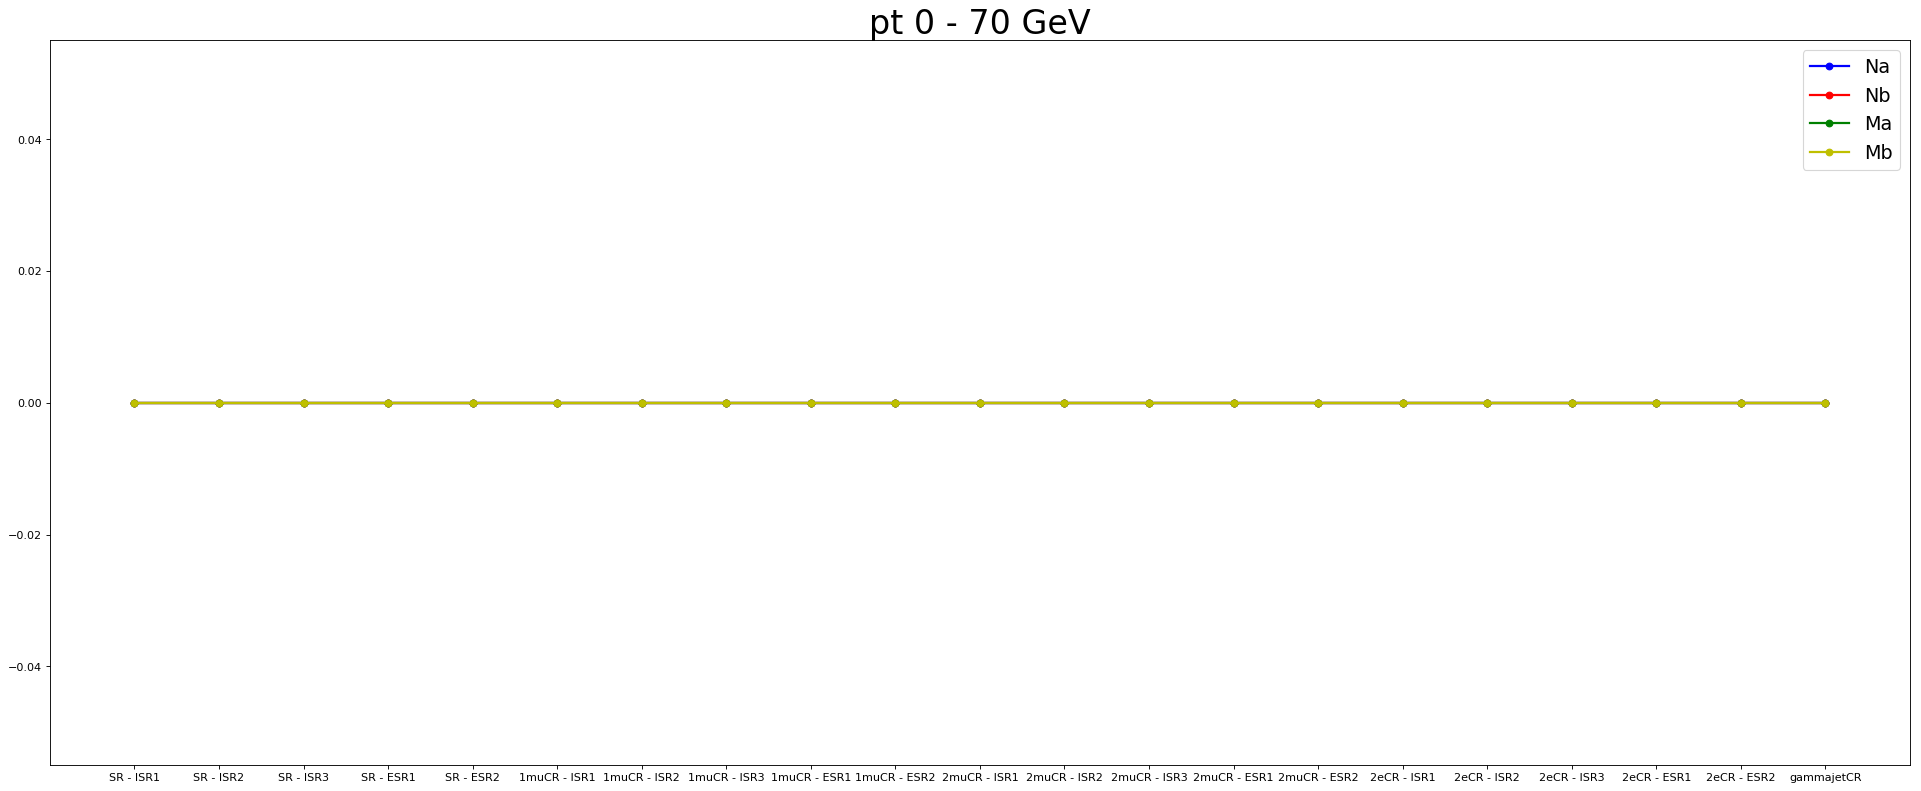

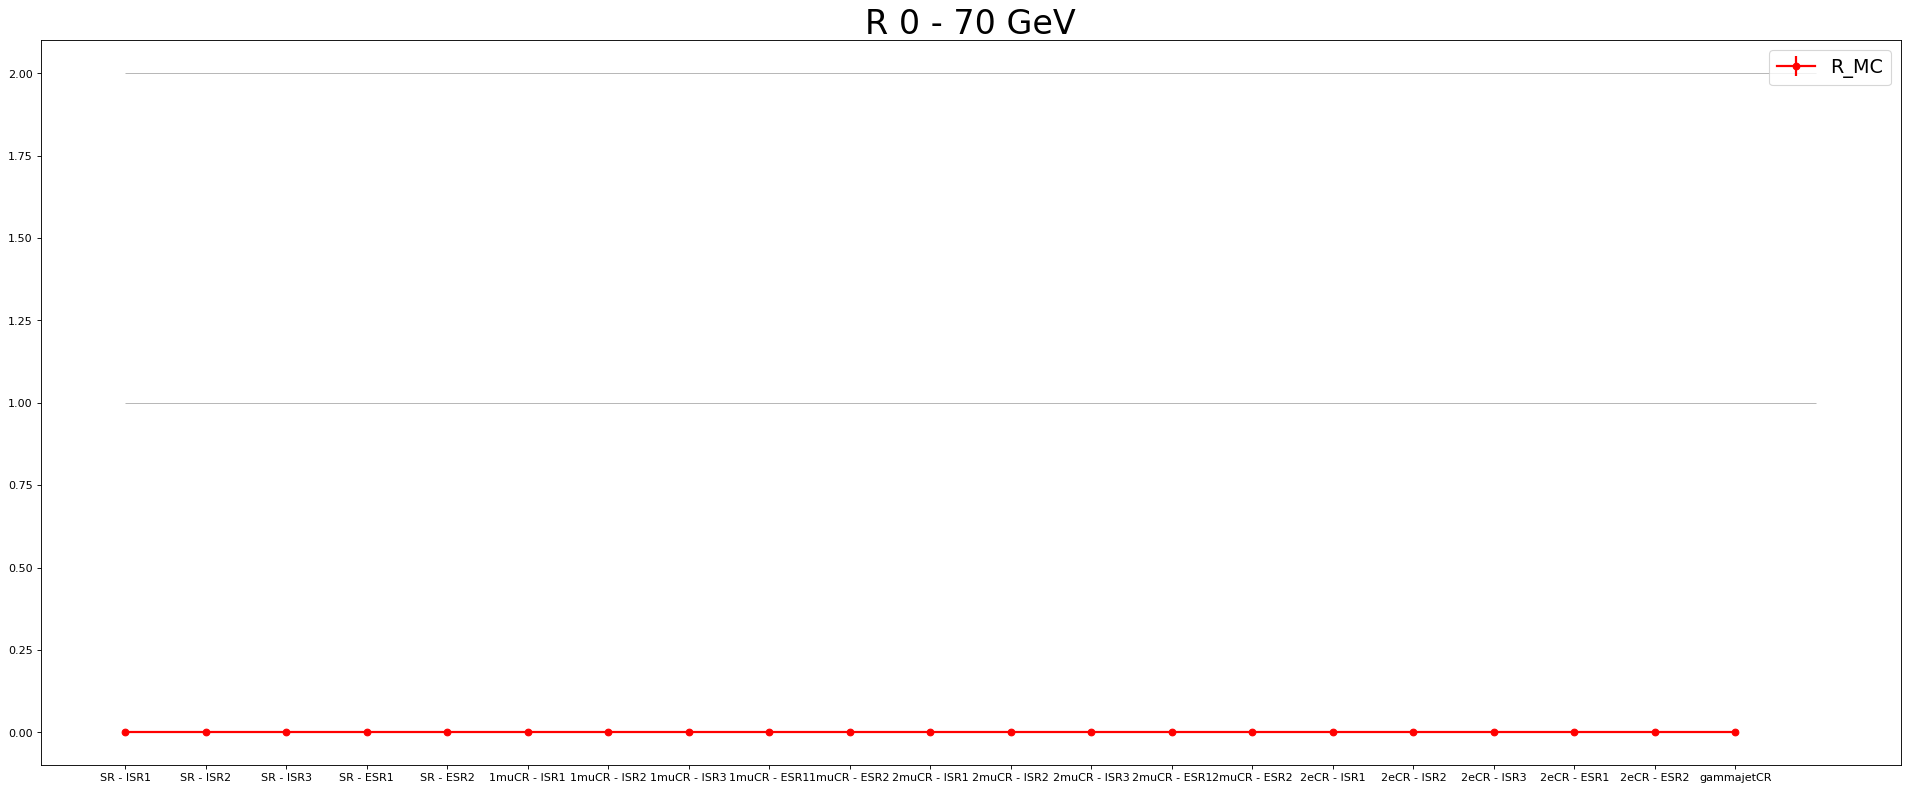

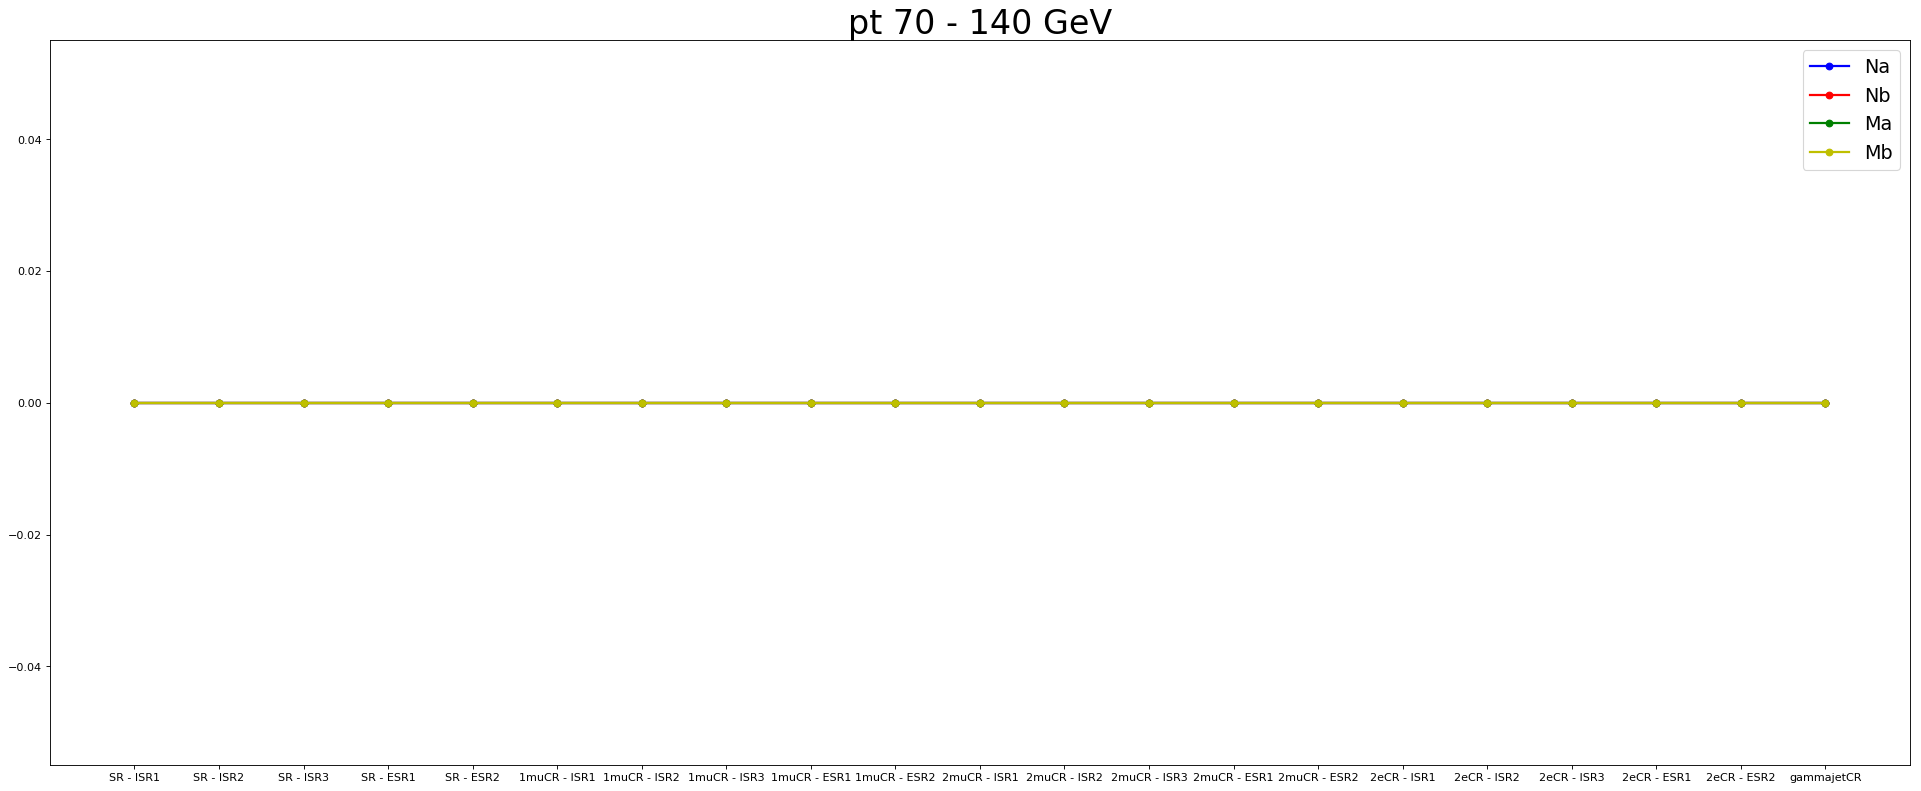

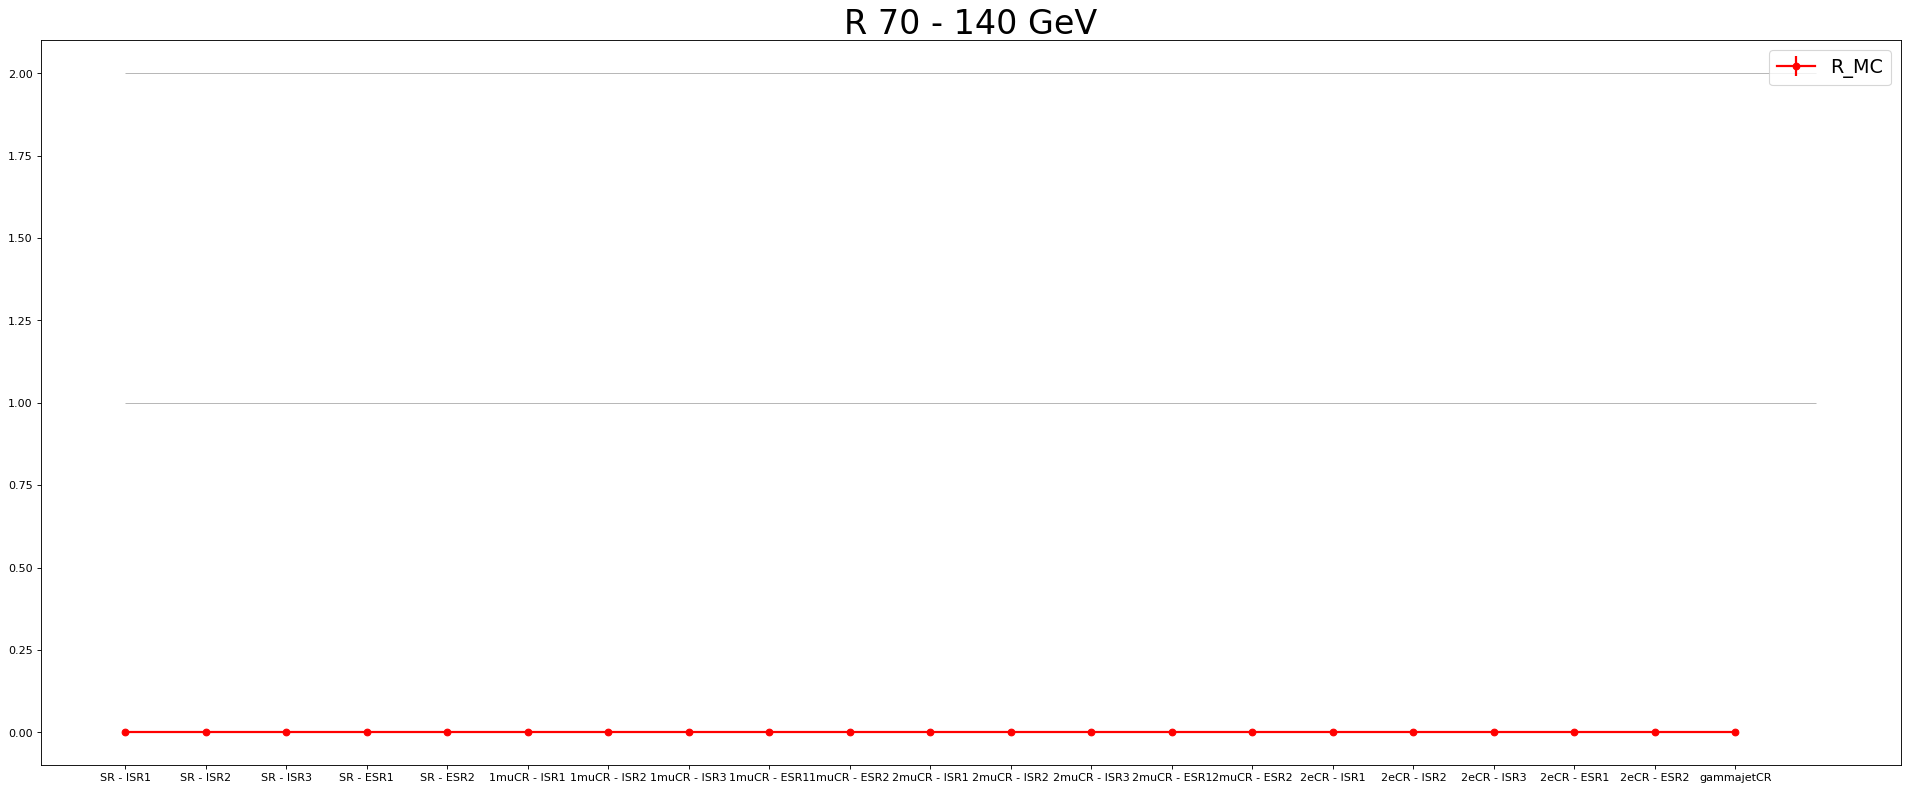

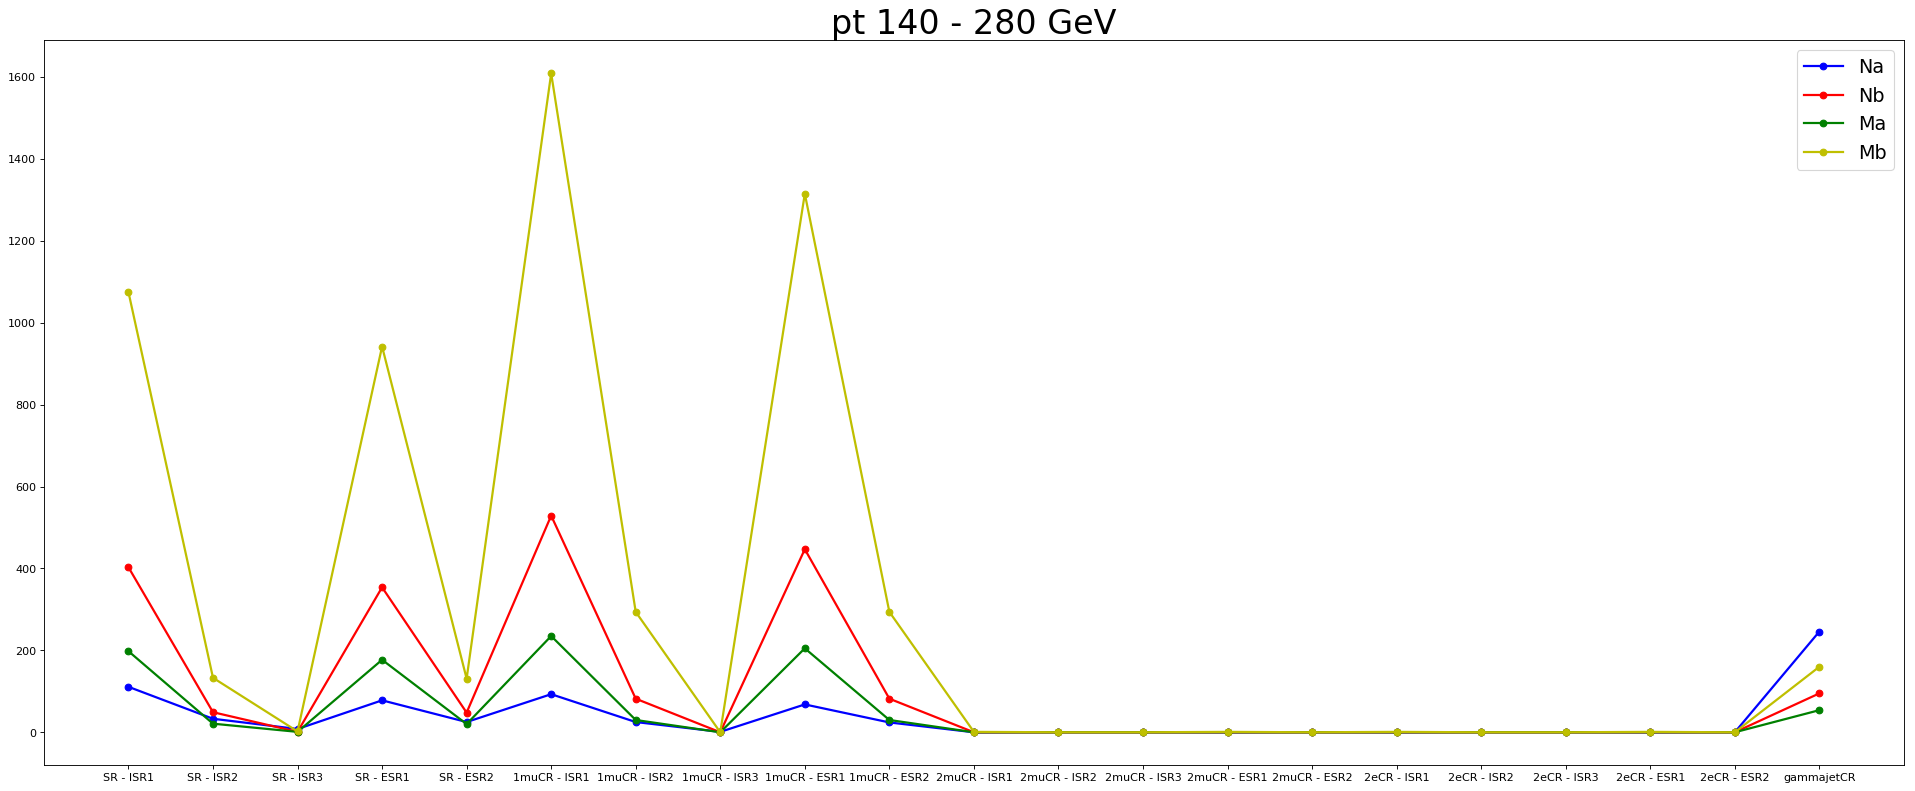

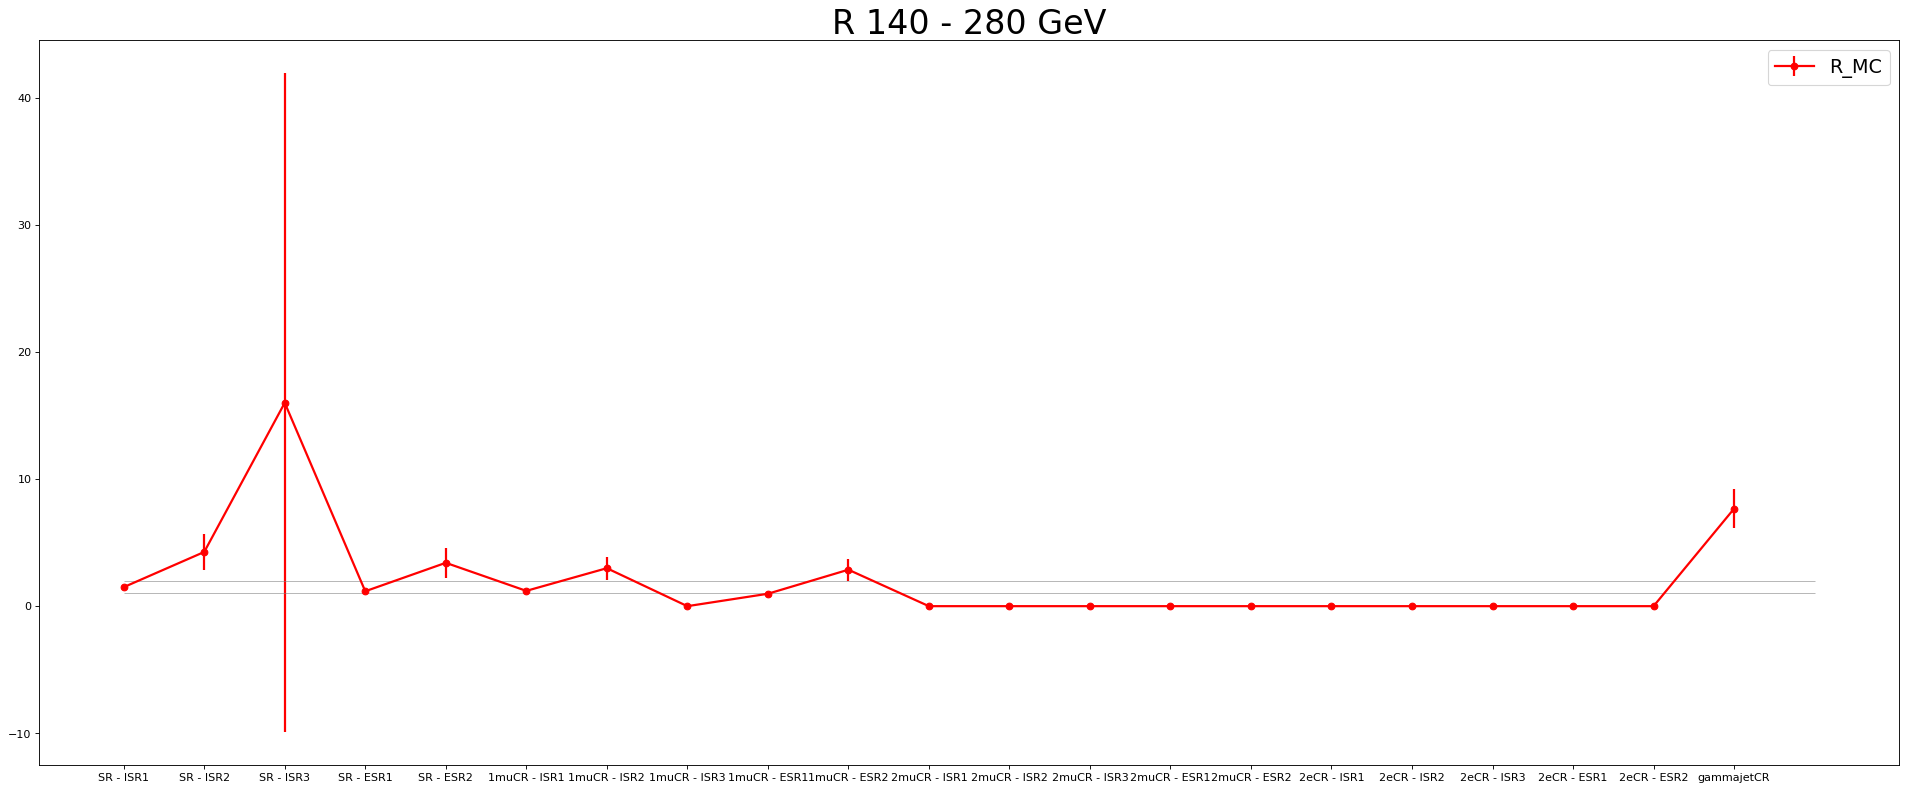

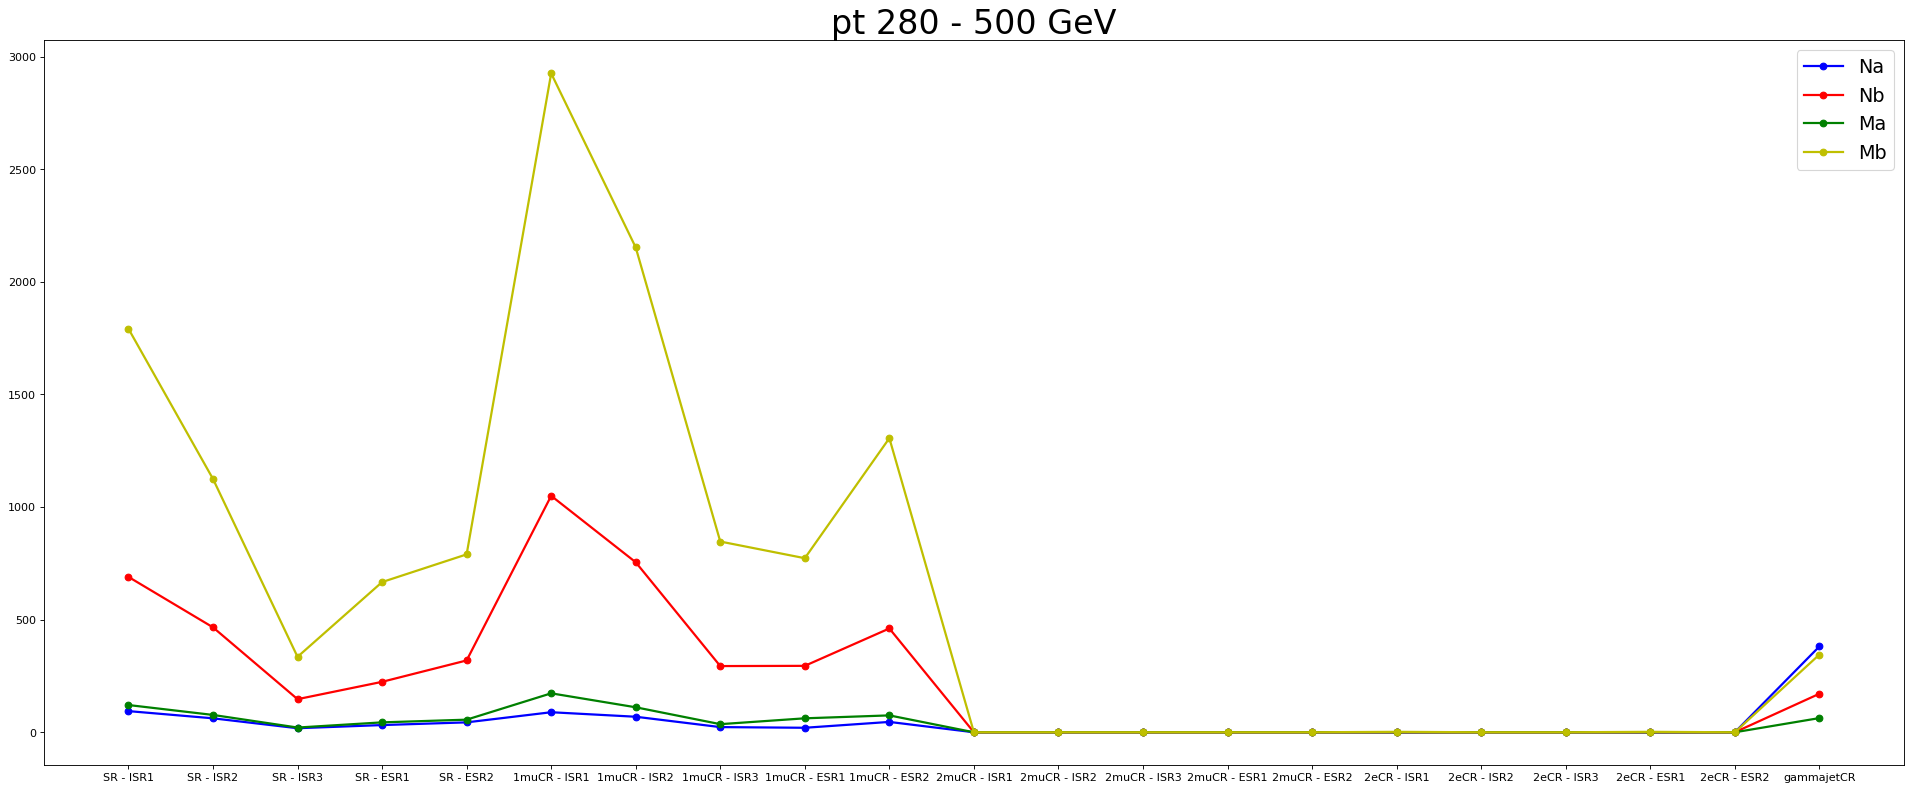

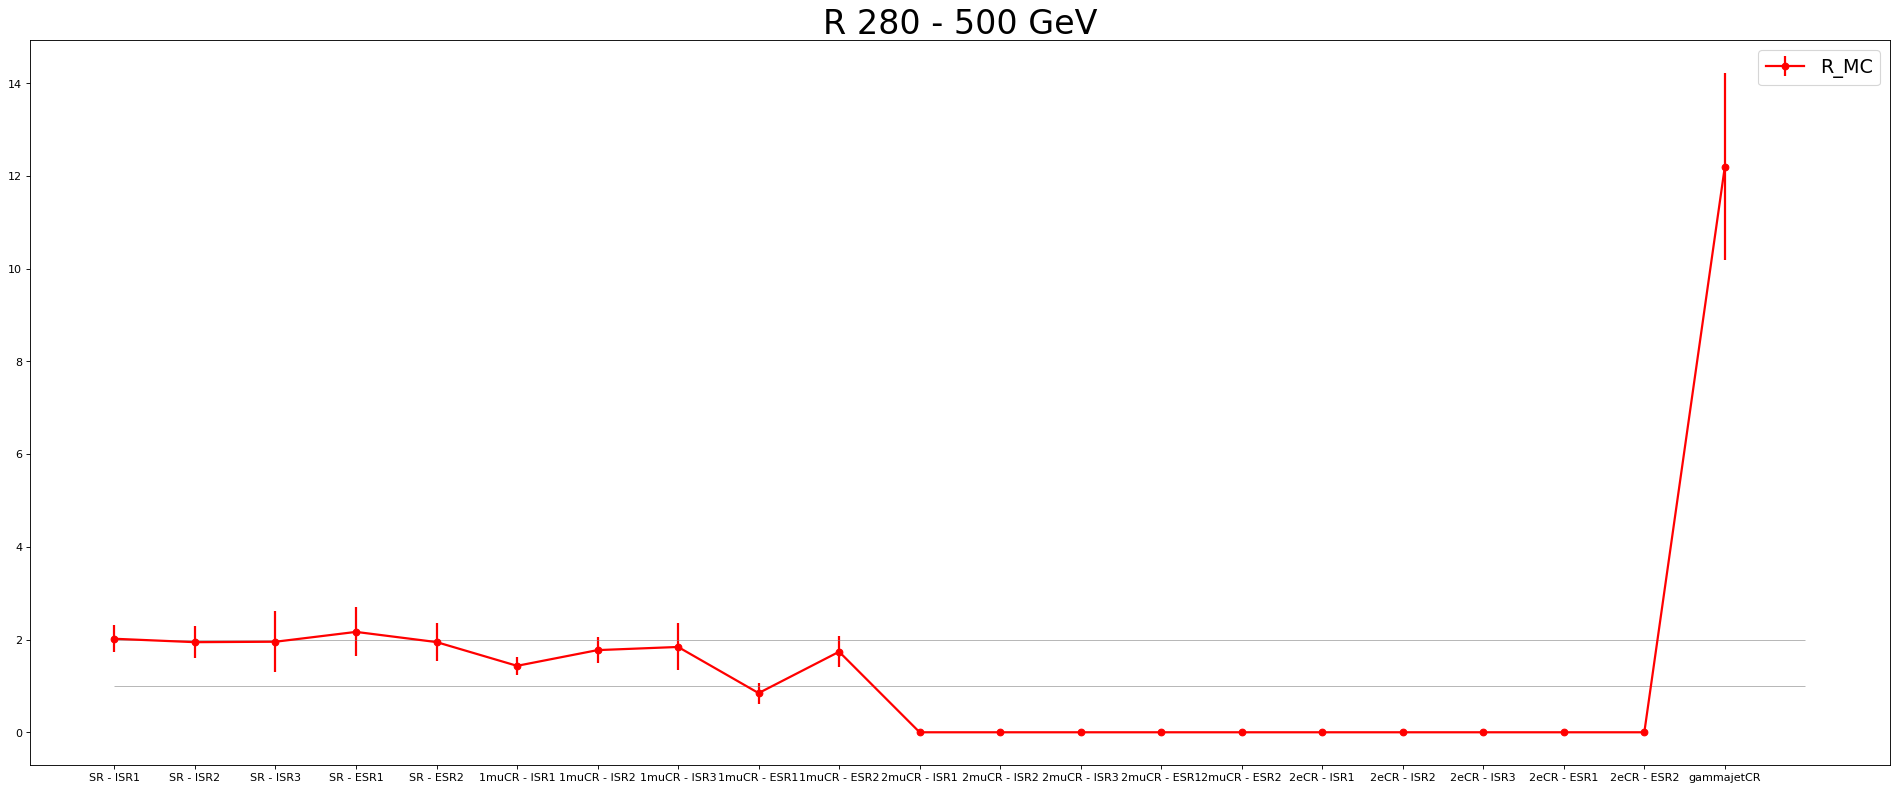

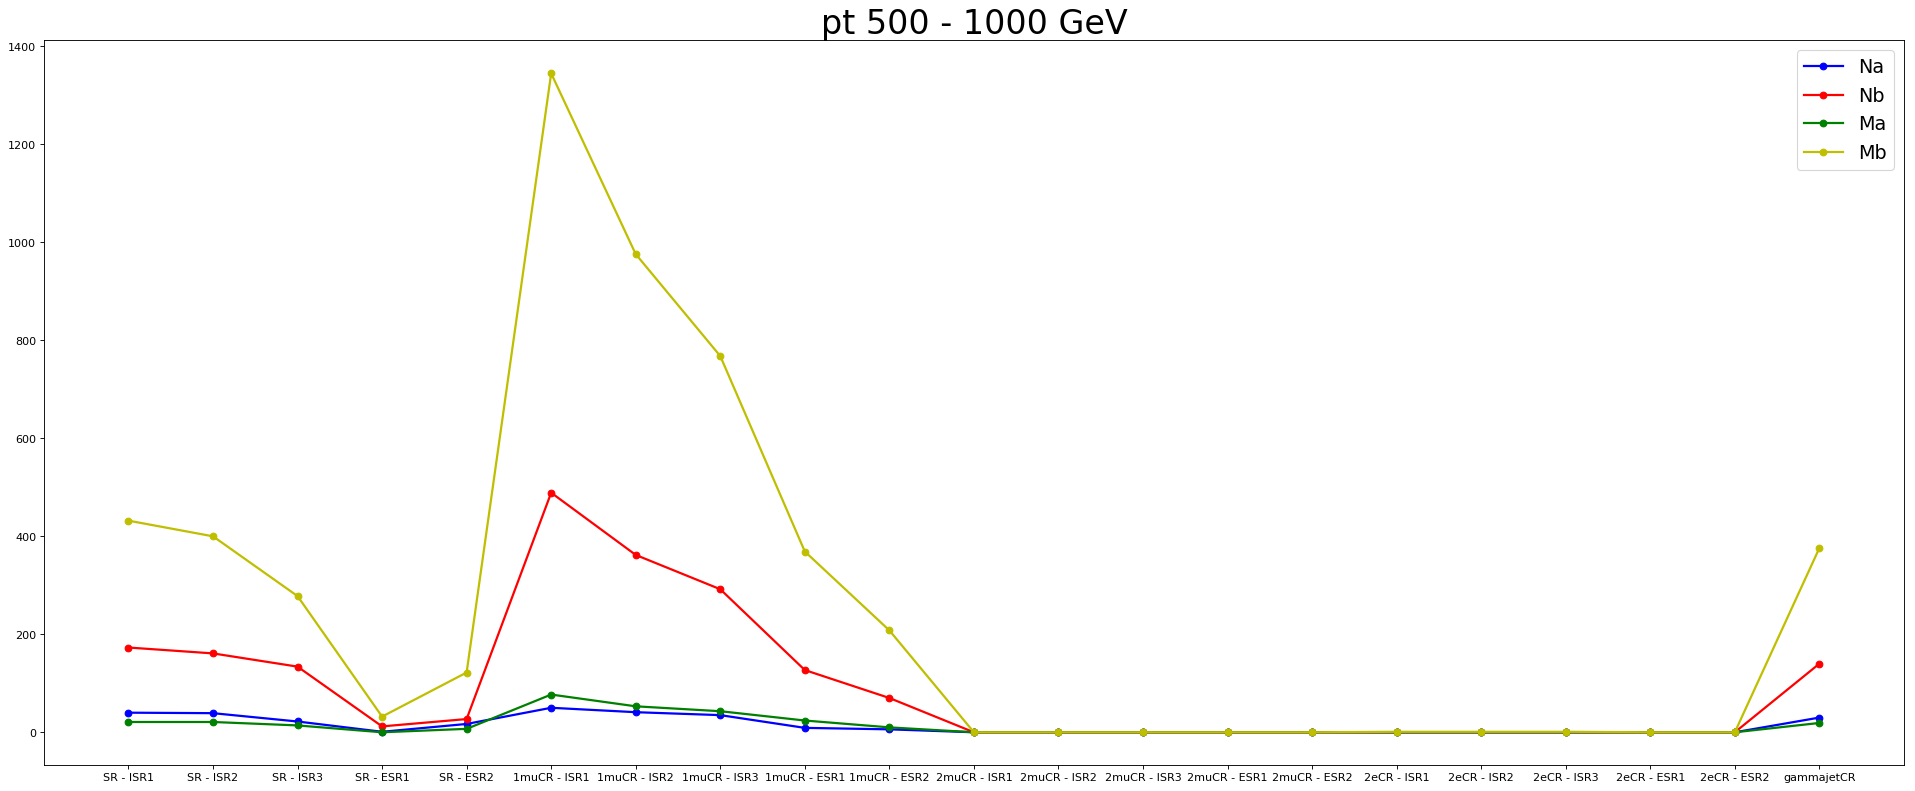

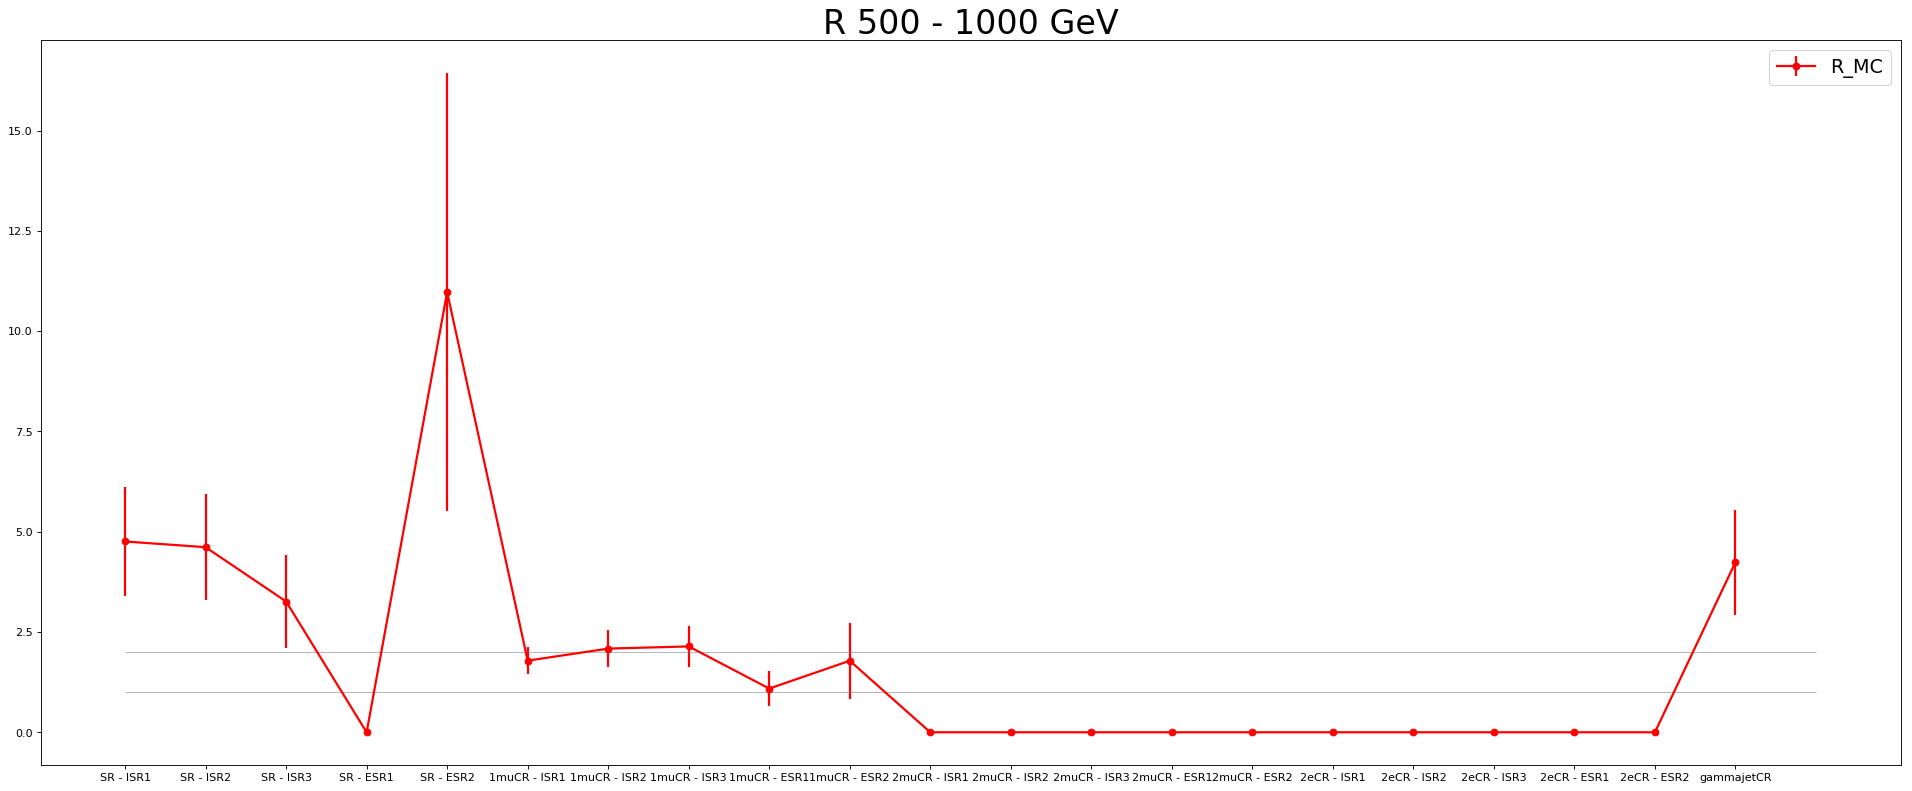

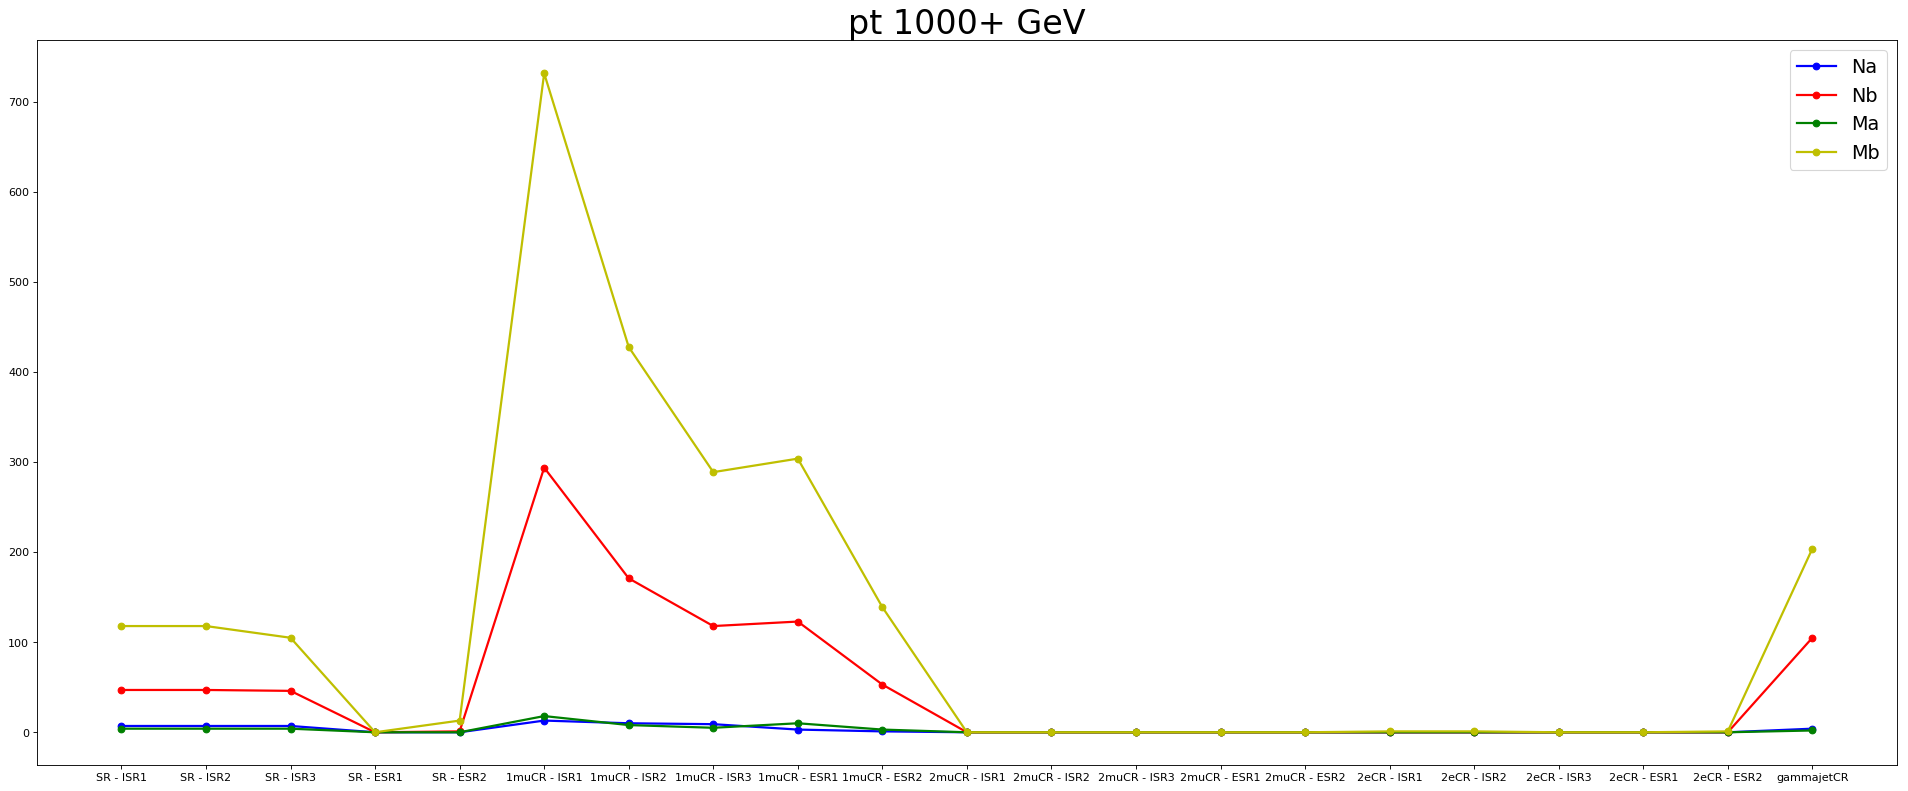

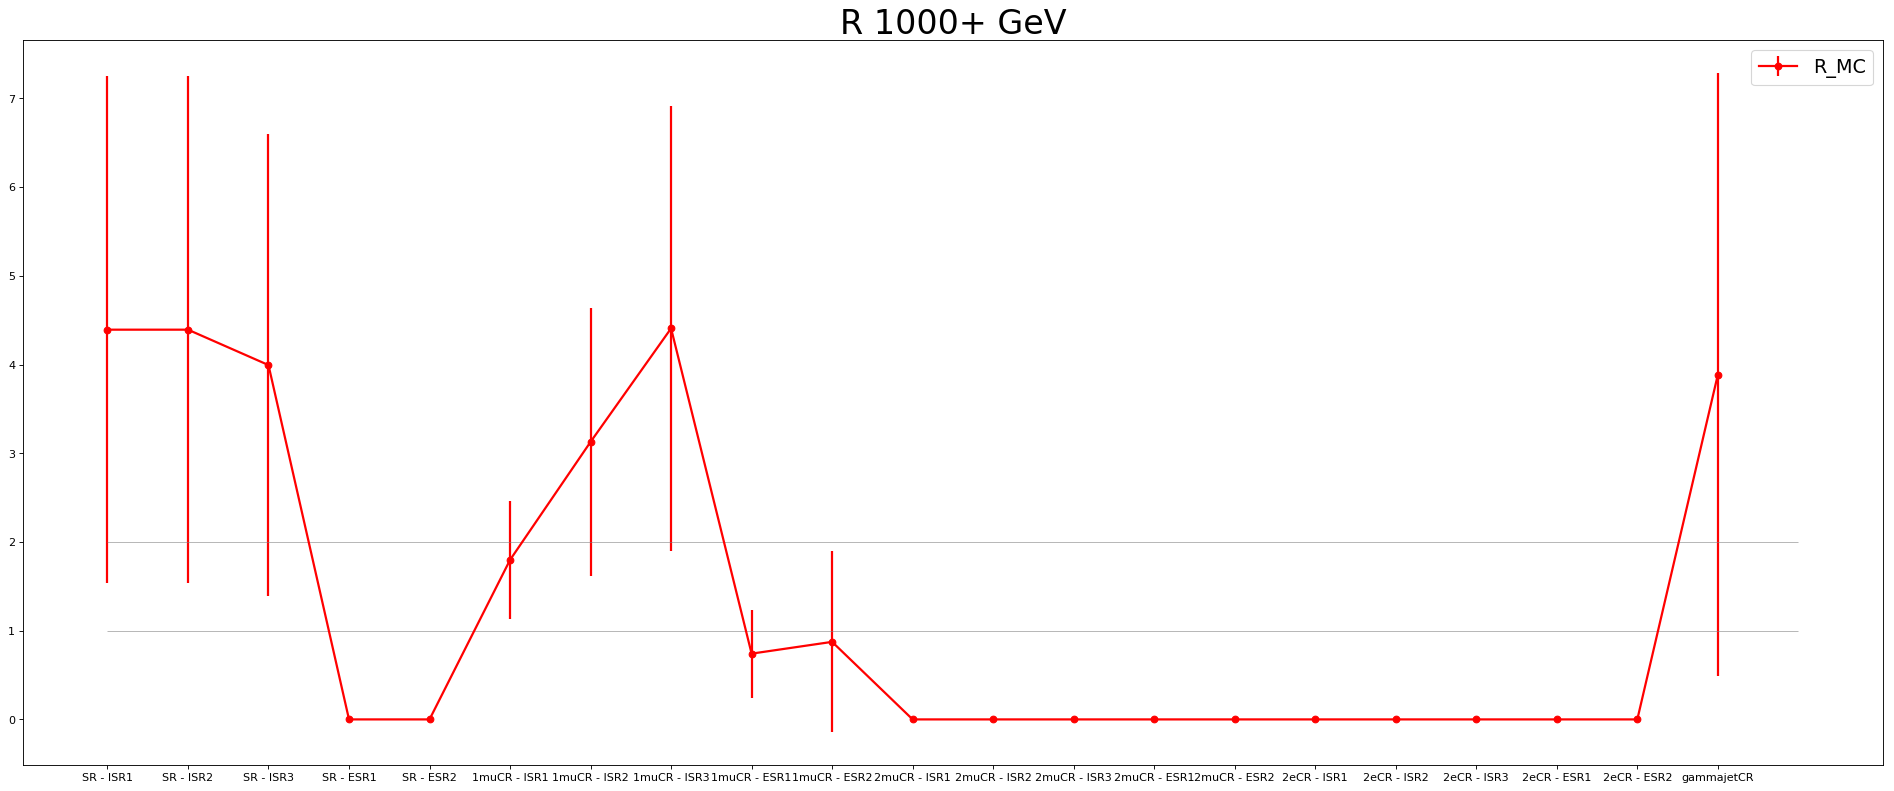

In [3]:

keys = sorted(listdir(PATH_Wjets_non_pesati))
for i in range(len(keys)):
    keys[i] = keys[i].split(".")[0]


values = []
for i in range(len(keys)):
    with open(PATH_Wjets_non_pesati+"/"+keys[i]+".txt", "r") as f:
        values.append(yaml.load(f, Loader=yaml.SafeLoader))


regions = list(values[0].keys())
data = dict(zip(keys, values))

x = [i for i in range(21)]

# CVetoBVeto + CFilterBVeto

Wjets_0_70     = ["364156", "364157", "364170", "364171", "364184", "364185"]
Wjets_70_140   = ["364159", "364160", "364173", "364174", "364187", "364188"]
Wjets_140_280  = ["364162", "364163", "364176", "364177", "364190", "364191"]
Wjets_280_500  = ["364165", "364166", "364179", "364180", "364193", "364194"]
Wjets_500_1000 = ["364168", "364182", "364196"]
Wjets_1000     = ["364169", "364183", "364197"]

Wjets = [Wjets_0_70, Wjets_70_140, Wjets_140_280, Wjets_280_500, Wjets_500_1000, Wjets_1000]
slices = ["0 - 70", "70 - 140", "140 - 280", "280 - 500", "500 - 1000", "1000+"]


for i in range(len(Wjets)):
    
    Na = [0 for _ in range(21)]
    Nb = [0 for _ in range(21)]
    Ma = [0 for _ in range(21)]
    Mb = [0 for _ in range(21)]
    
    for j in range(len(Wjets[i])):
        for k in range(21):
            Na[k] = Na[k] + data[Wjets[i][j]][regions[k]]["Na_b"]
            Nb[k] = Nb[k] + data[Wjets[i][j]][regions[k]]["Nb_b"]
            Ma[k] = Ma[k] + data[Wjets[i][j]][regions[k]]["Ma_b"]
            Mb[k] = Mb[k] + data[Wjets[i][j]][regions[k]]["Mb_b"]
        
    plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

    plt.plot(x, Na, label="Na", color="b", marker="o", linestyle="-", linewidth=2)
    plt.plot(x, Nb, label="Nb", color="r", marker="o", linestyle="-", linewidth=2)
    plt.plot(x, Ma, label="Ma", color="g", marker="o", linestyle="-", linewidth=2)
    plt.plot(x, Mb, label="Mb", color="y", marker="o", linestyle="-", linewidth=2)

    plt.xticks(range(len(regions)), regions)
    plt.legend(fontsize="xx-large")
    plt.title("pt " + slices[i] + " GeV", fontsize=30)


    # calcolo R
    R = [0 for i in range(21)]
    sigma_R = [0 for i in range(21)]

    for l in range(21):
        try:
            R[l] = (Na[l]*Mb[l])/(Nb[l]*Ma[l])
            sigma_R[l] = R[l] * math.sqrt((1/Na[l]) + (1/Nb[l]) + (1/Ma[l]) + (1/Mb[l])) 
        except (ZeroDivisionError, ValueError):
            R[l] = 0
            sigma_R[l] = 0

    plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

    plt.errorbar(x, R, yerr=sigma_R, fmt="or", linestyle="-", linewidth=2, label="R_MC") 

    plt.xticks(range(len(regions)), regions)
    plt.legend(fontsize="xx-large")
    plt.title("R " + slices[i] + " GeV", fontsize=30)

    plt.hlines(1, 0, 21, colors='gray', linestyles='solid', label='', linewidth=0.5)
    plt.hlines(2, 0, 21, colors='gray', linestyles='solid', label='', linewidth=0.5)

    if( slices[i] is ""):
        plt.axis([-1, 21, -0.5, 8])



## Pesati

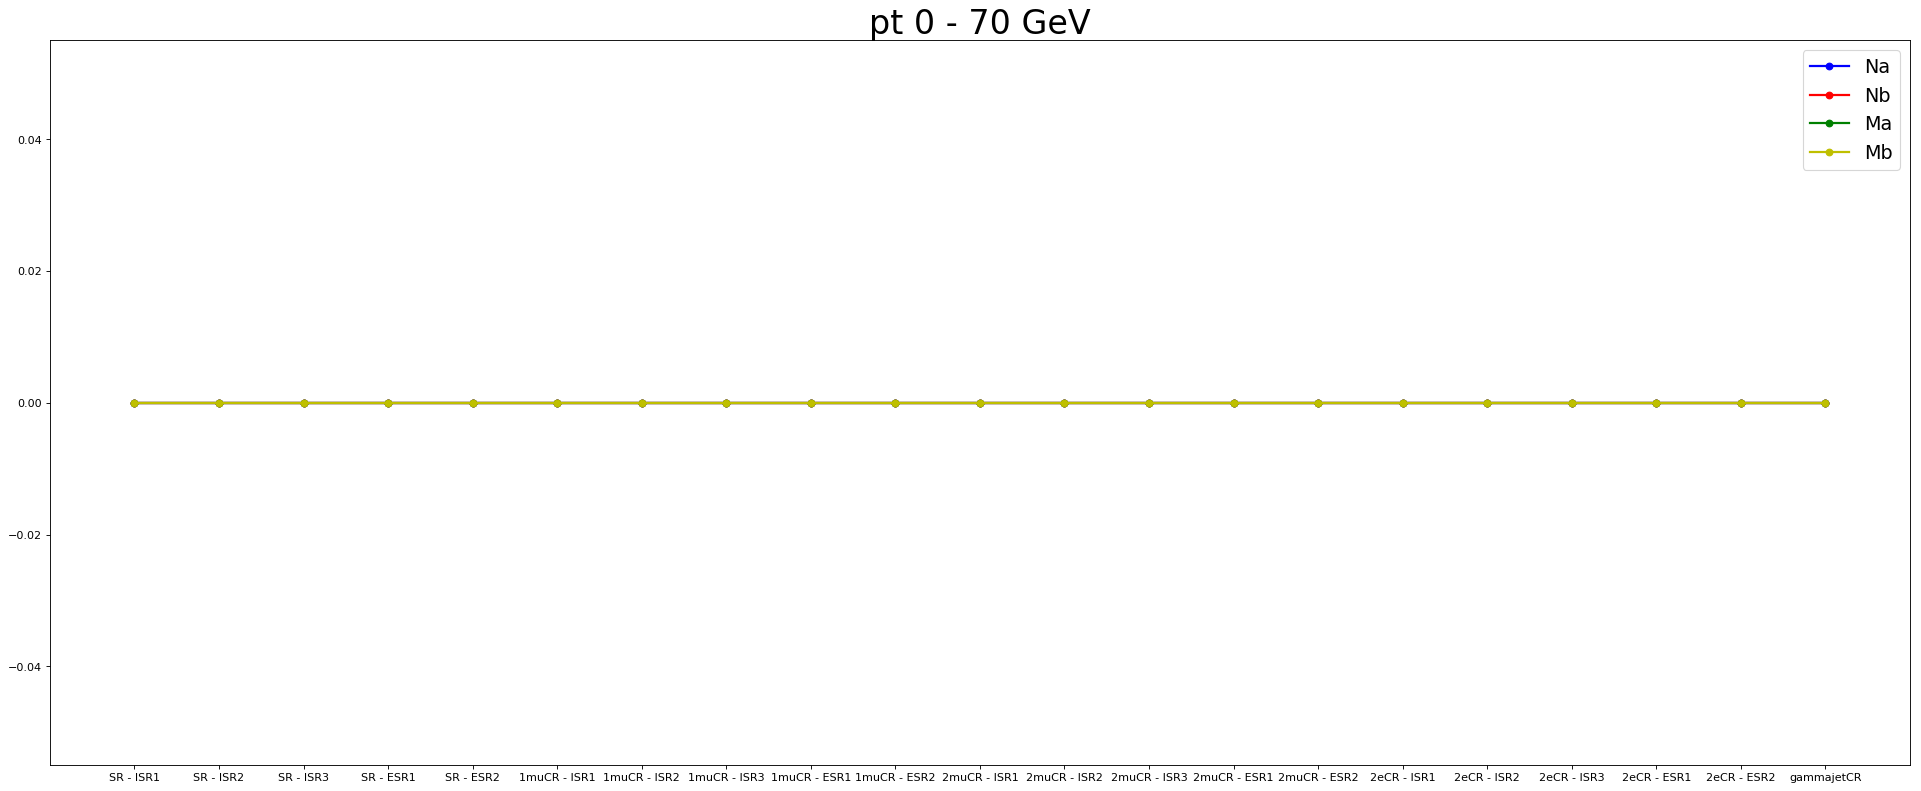

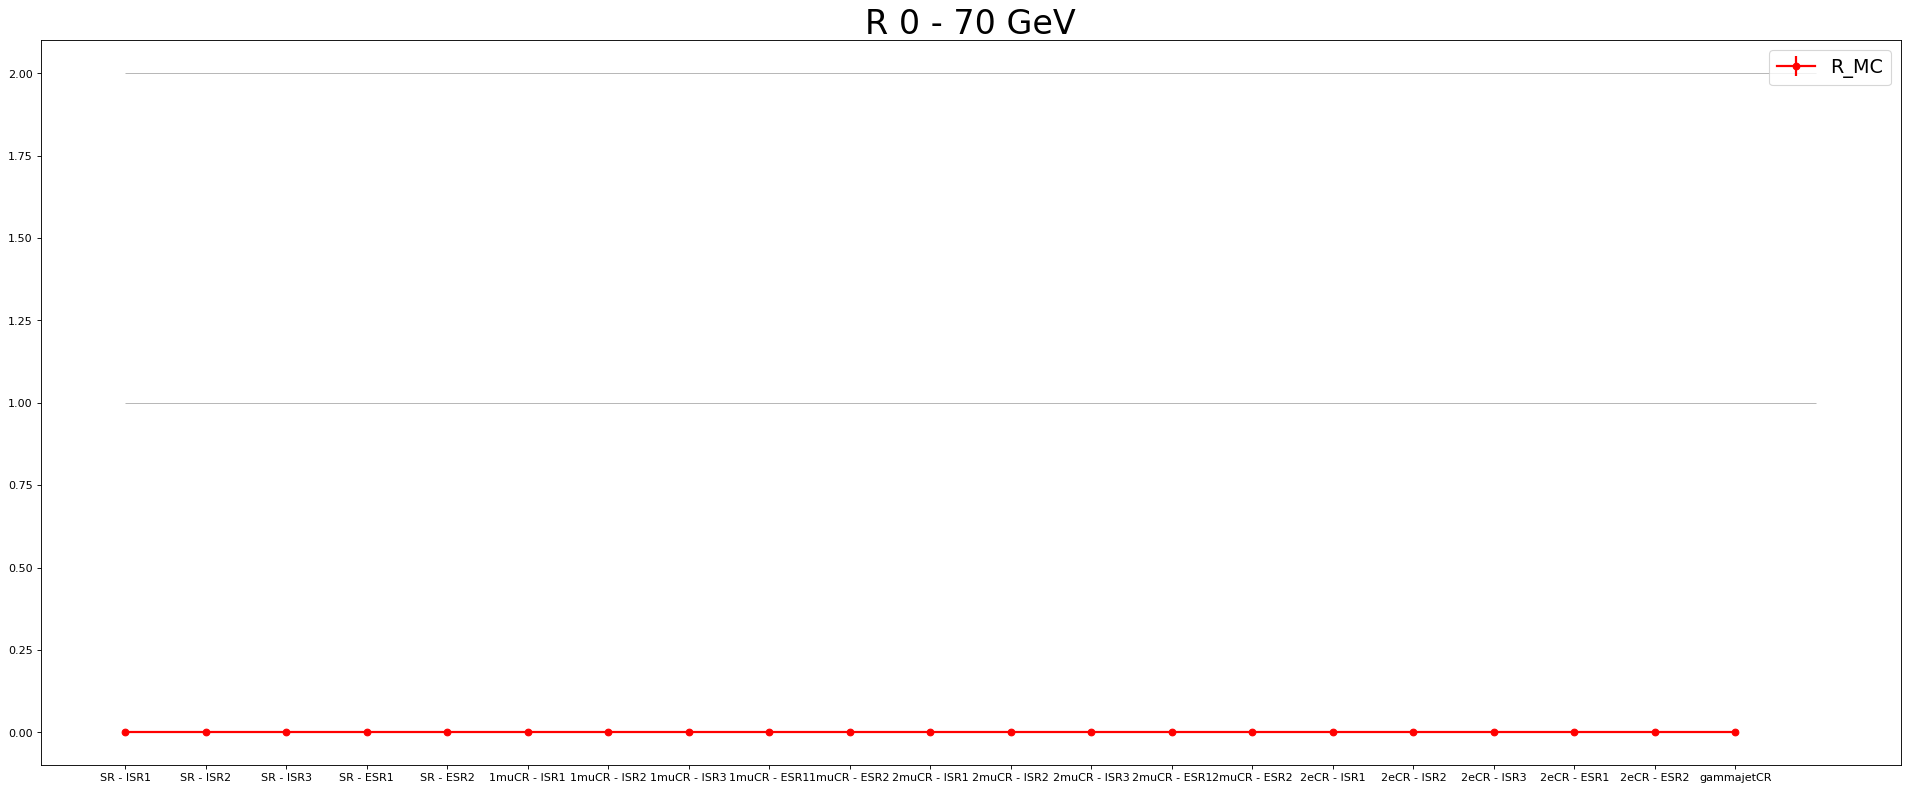

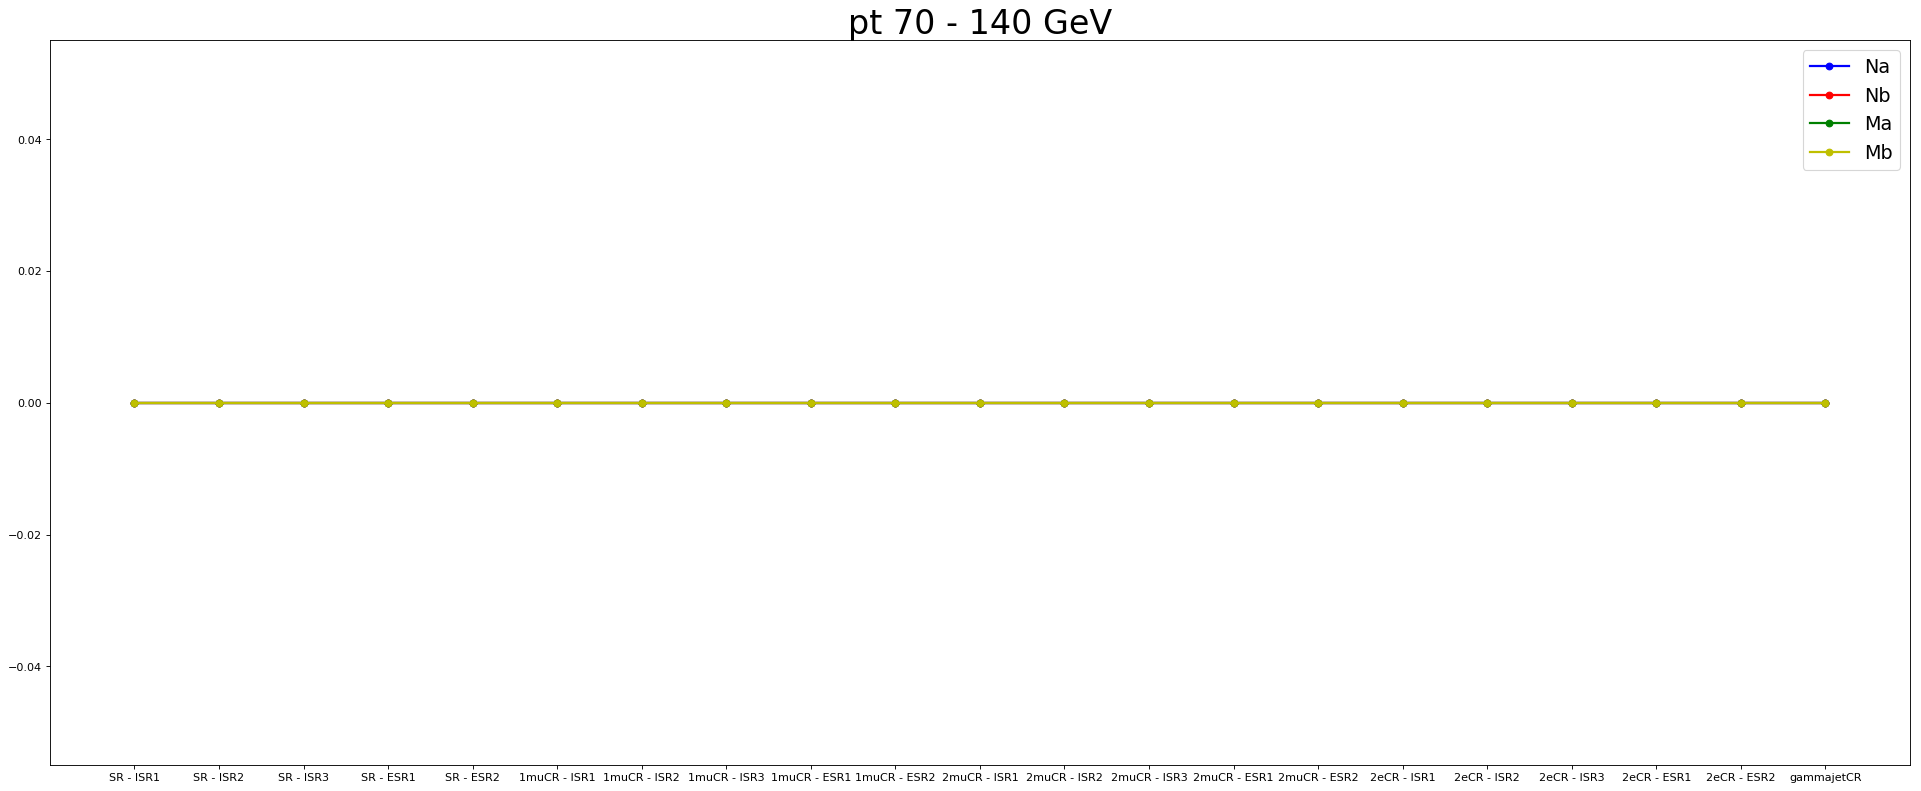

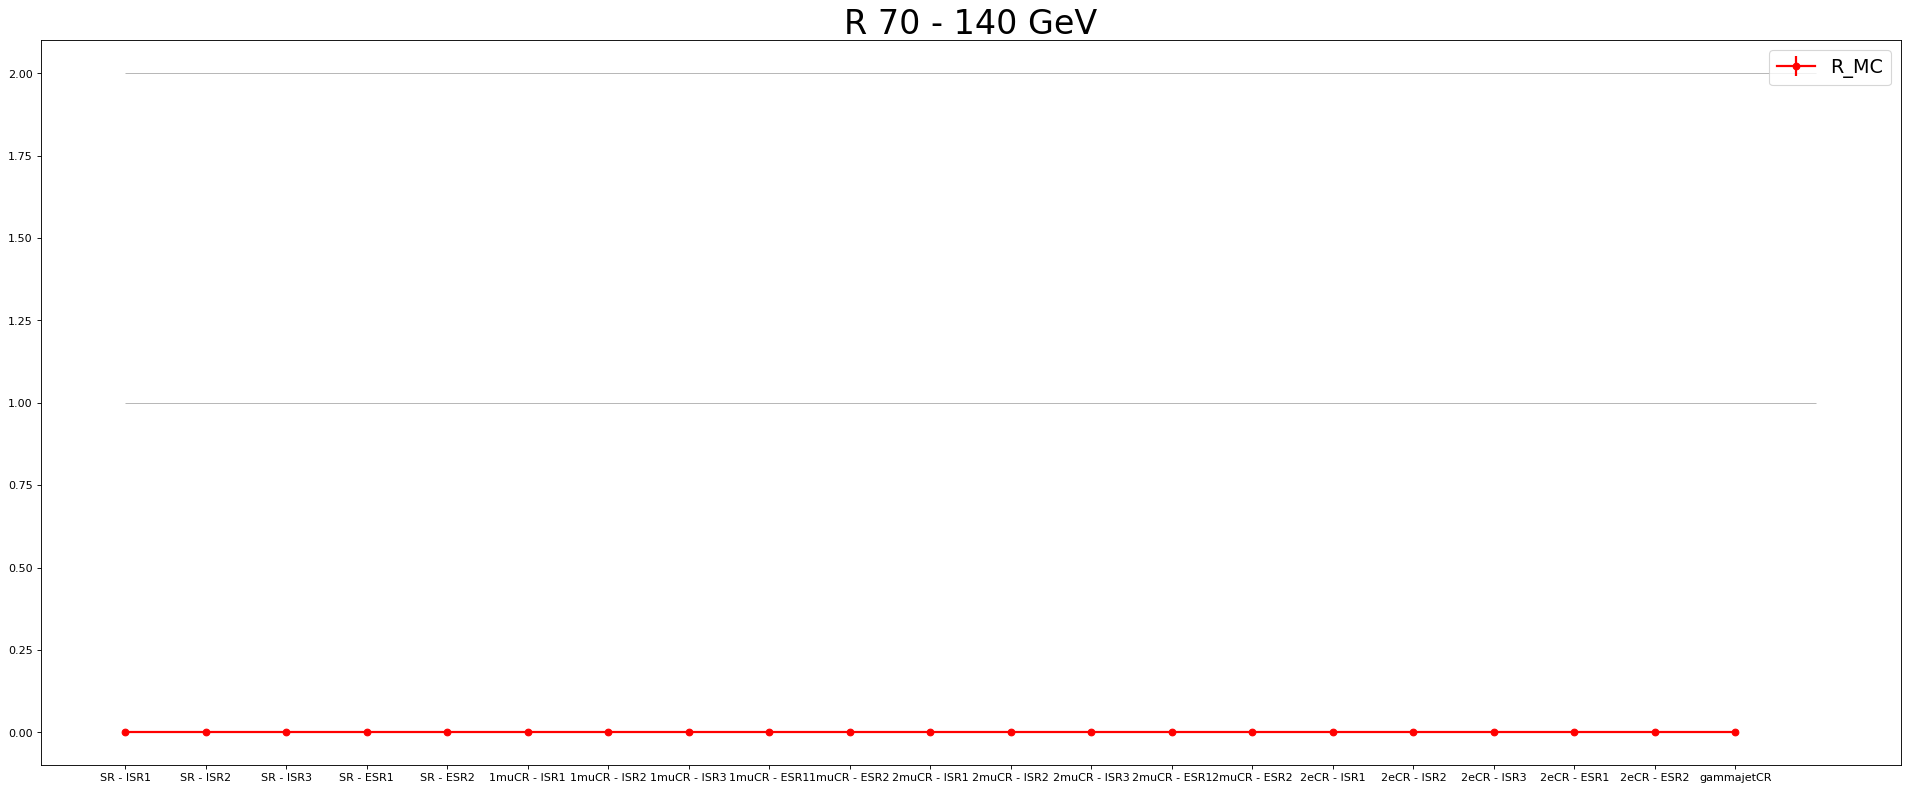

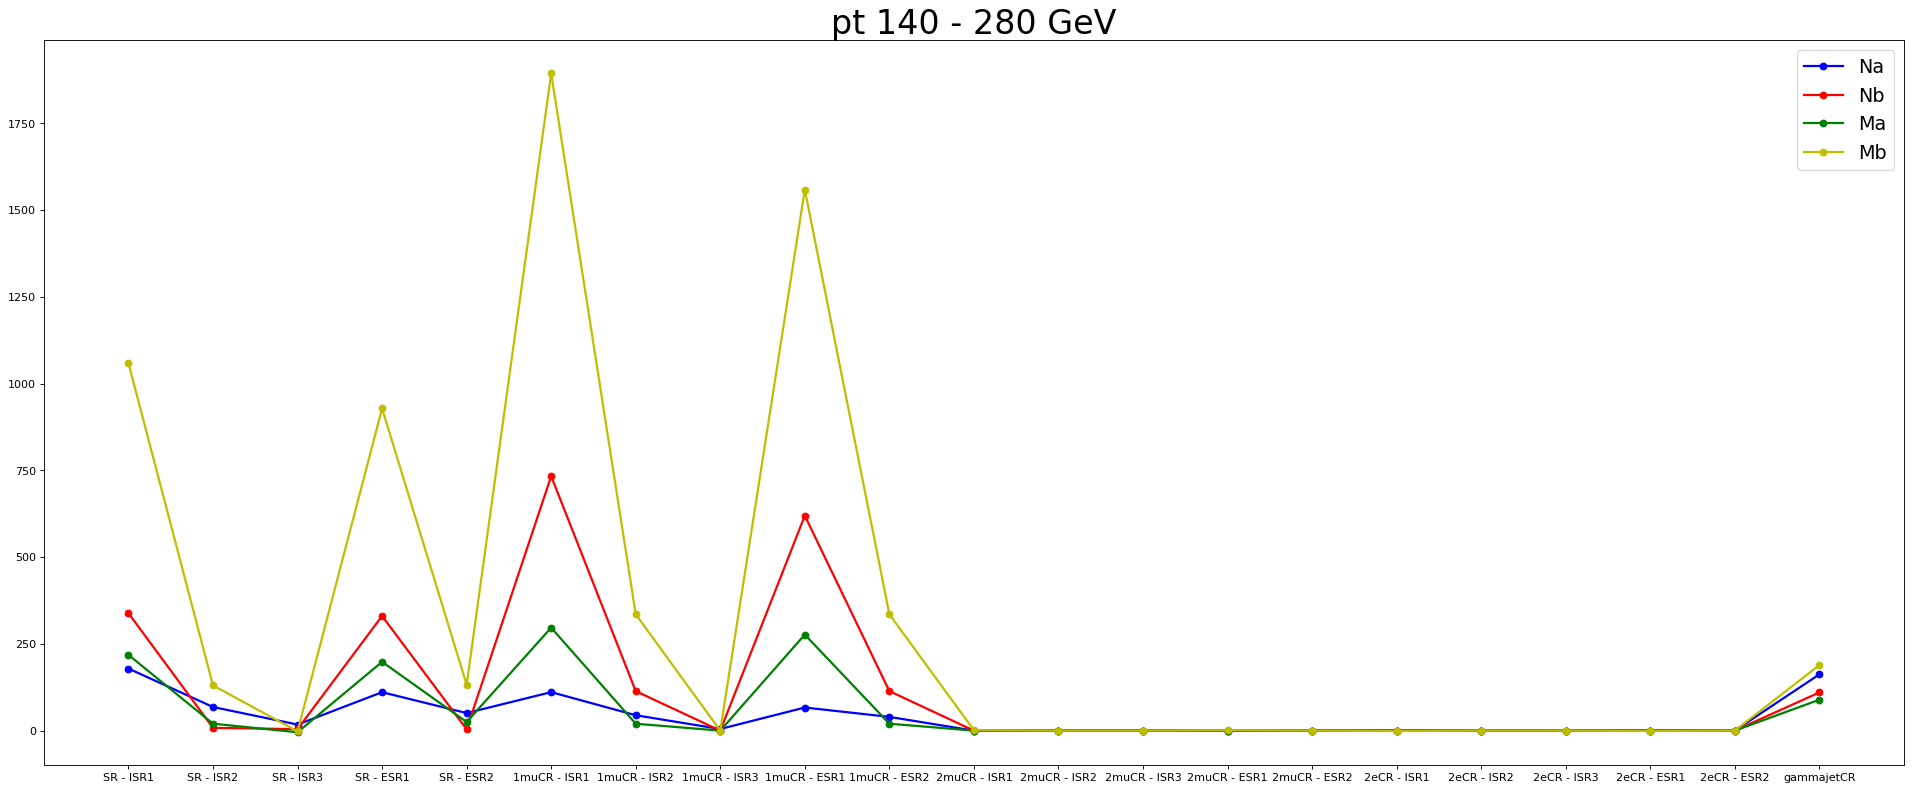

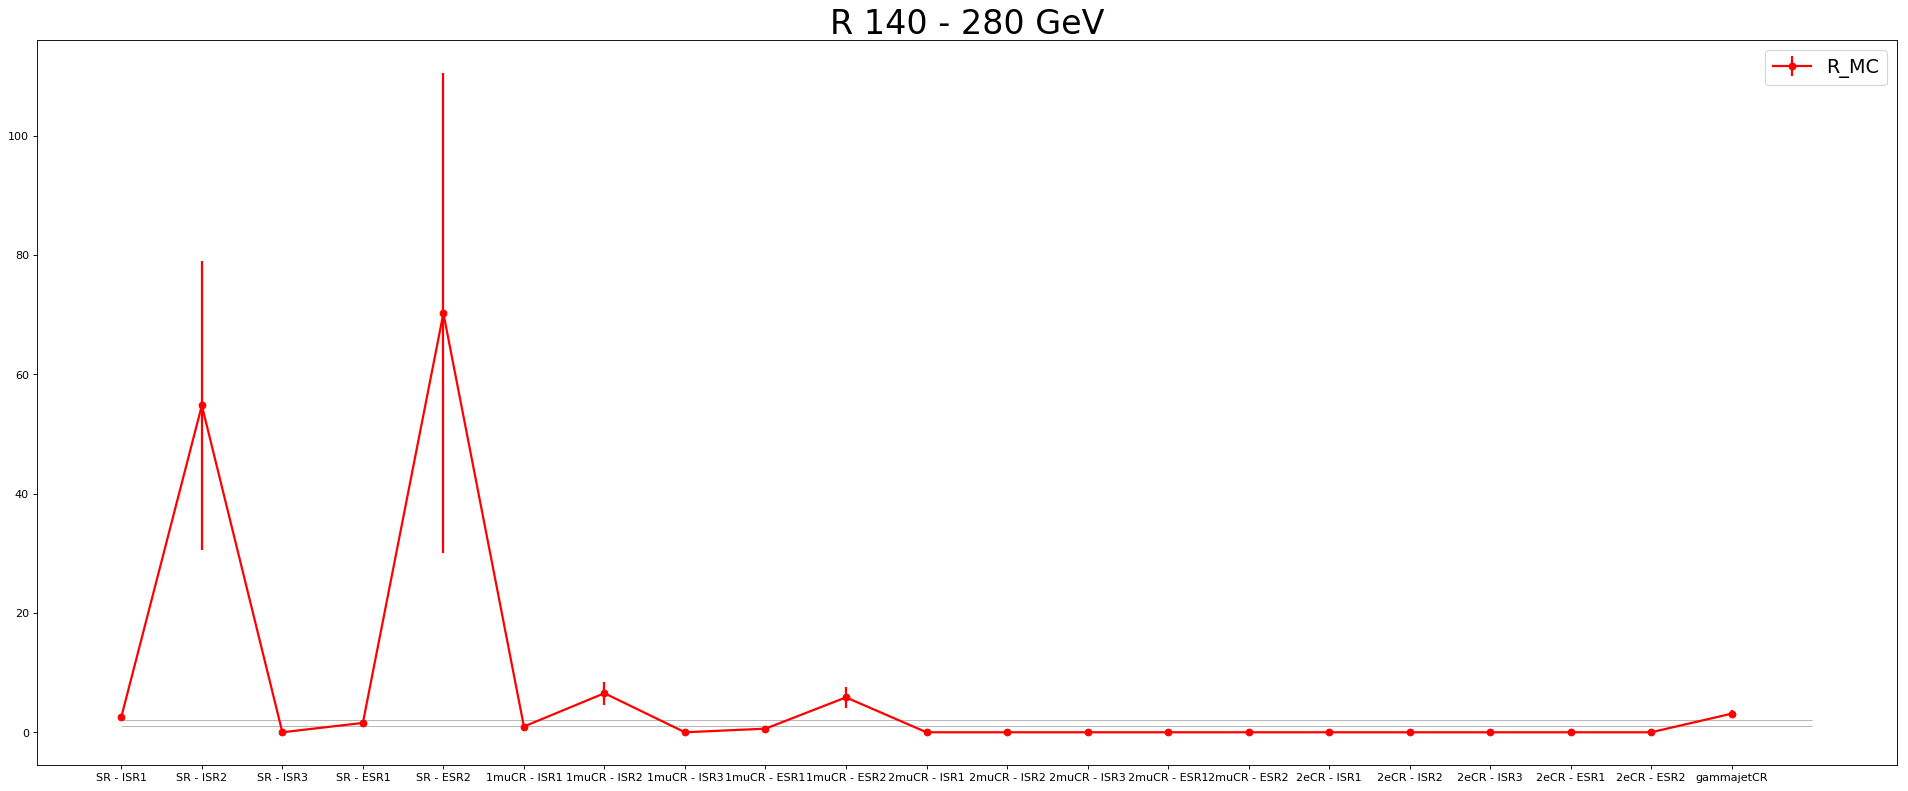

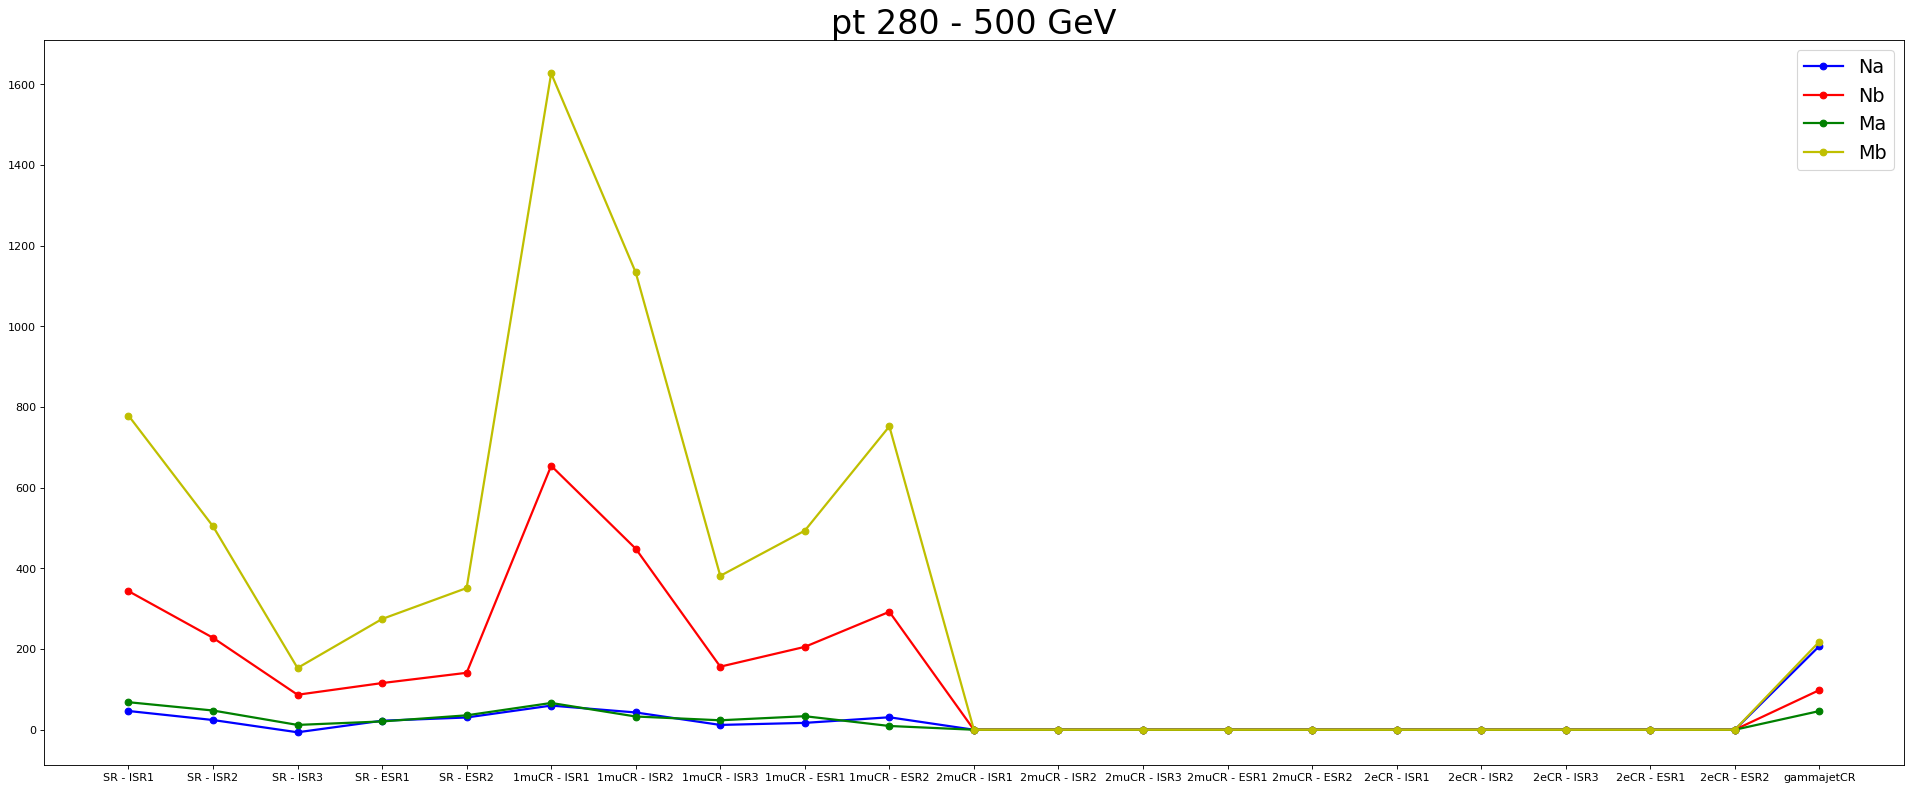

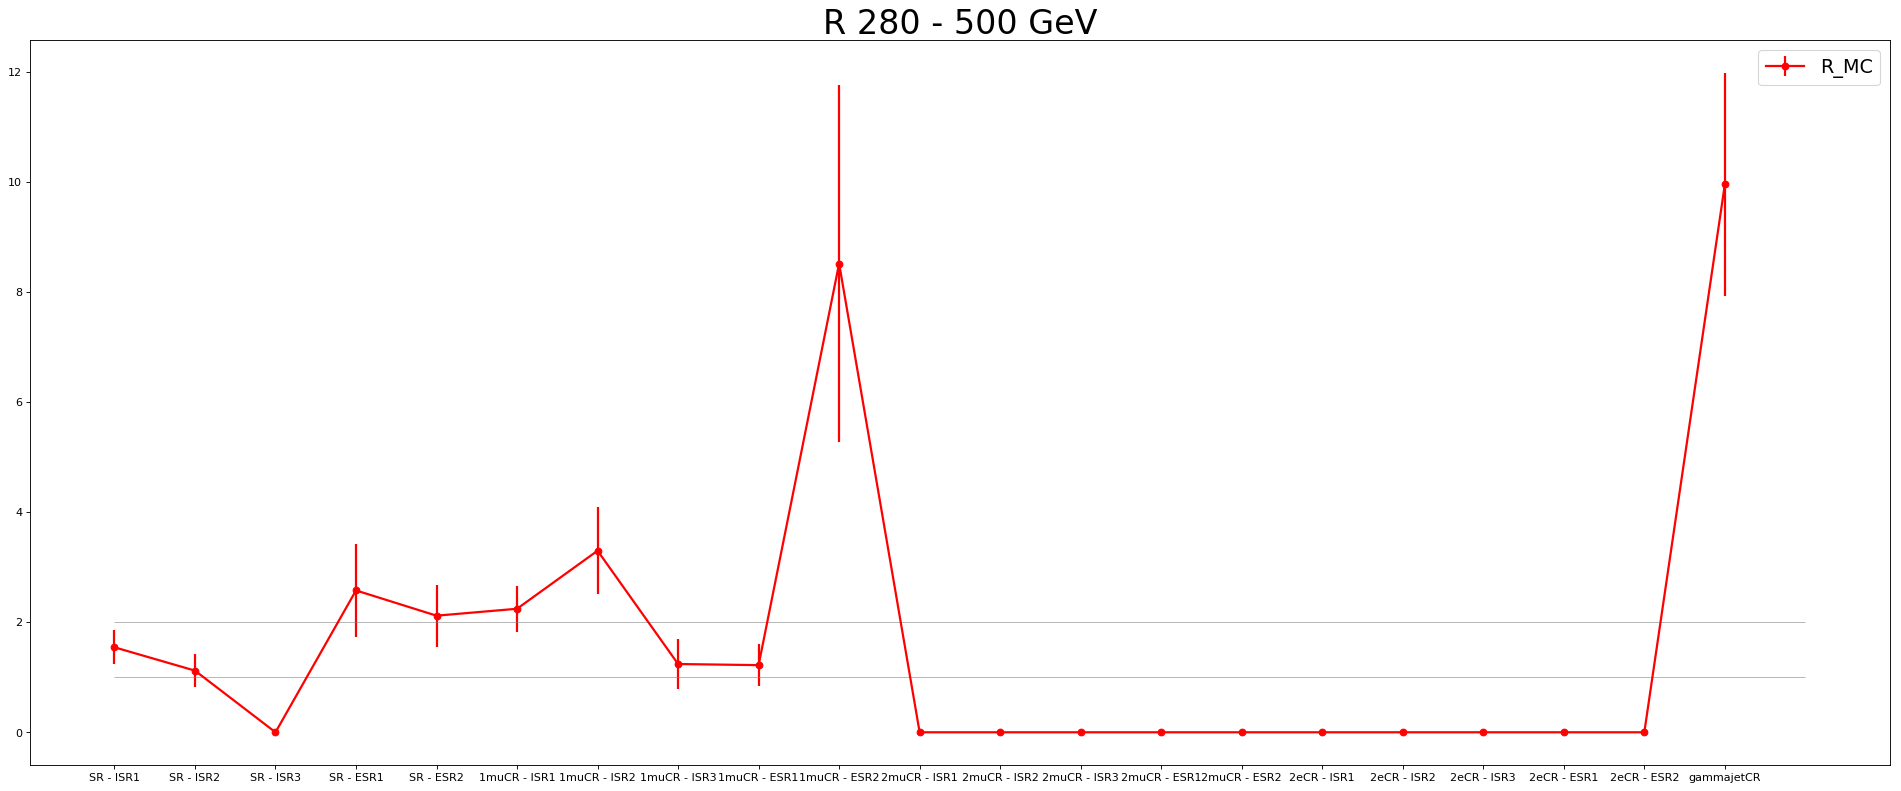

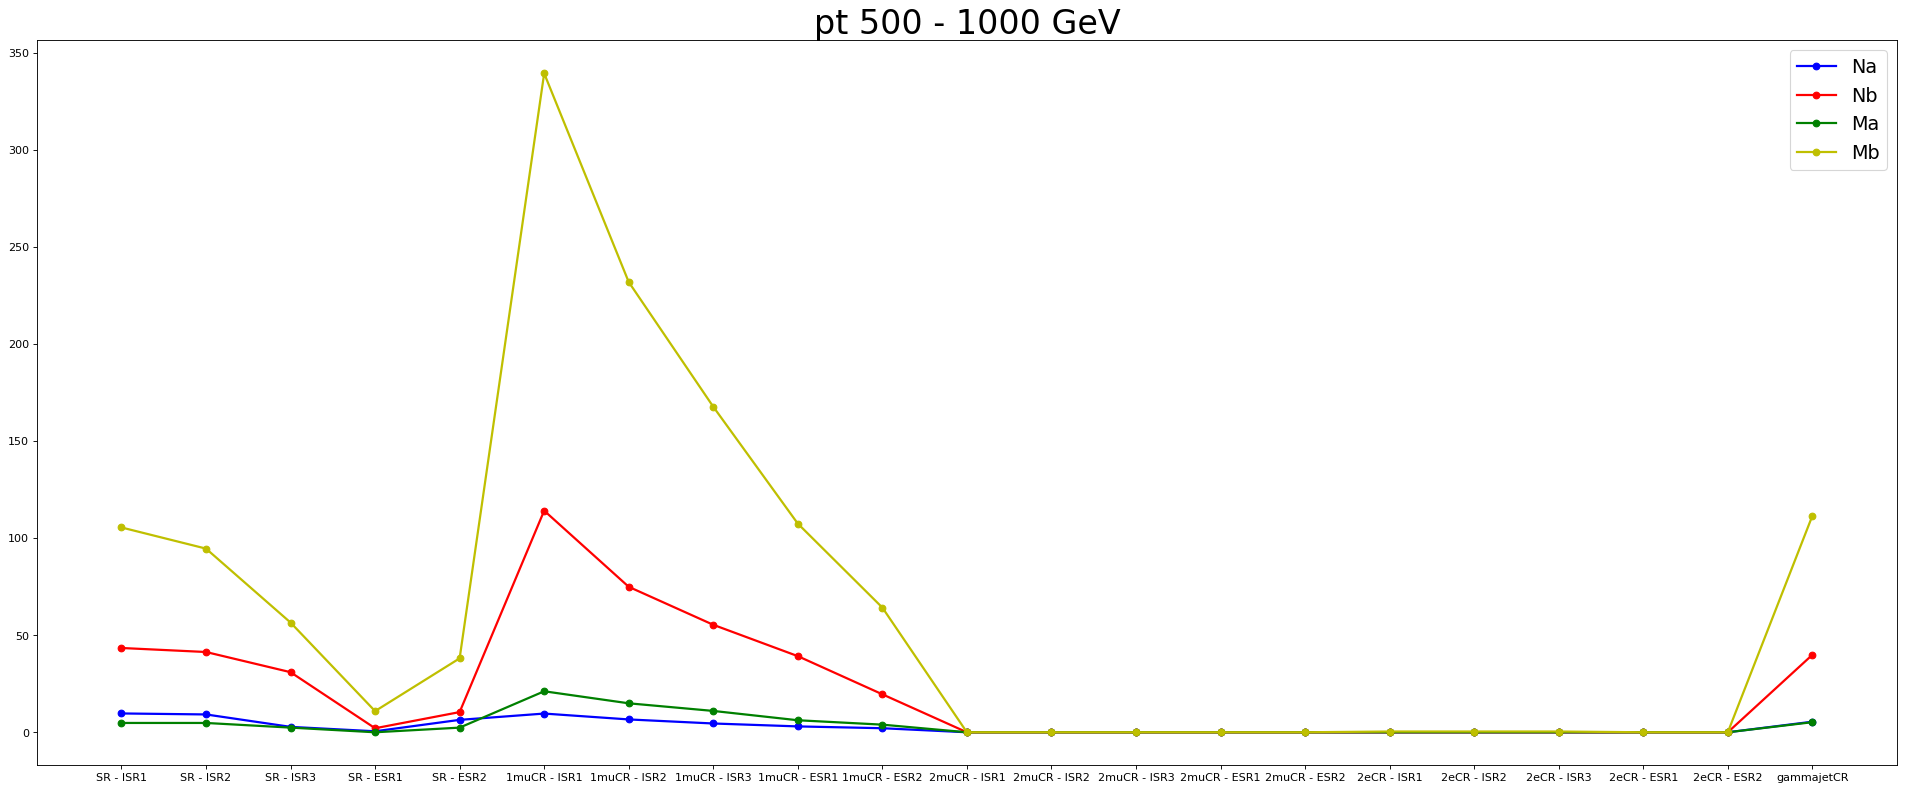

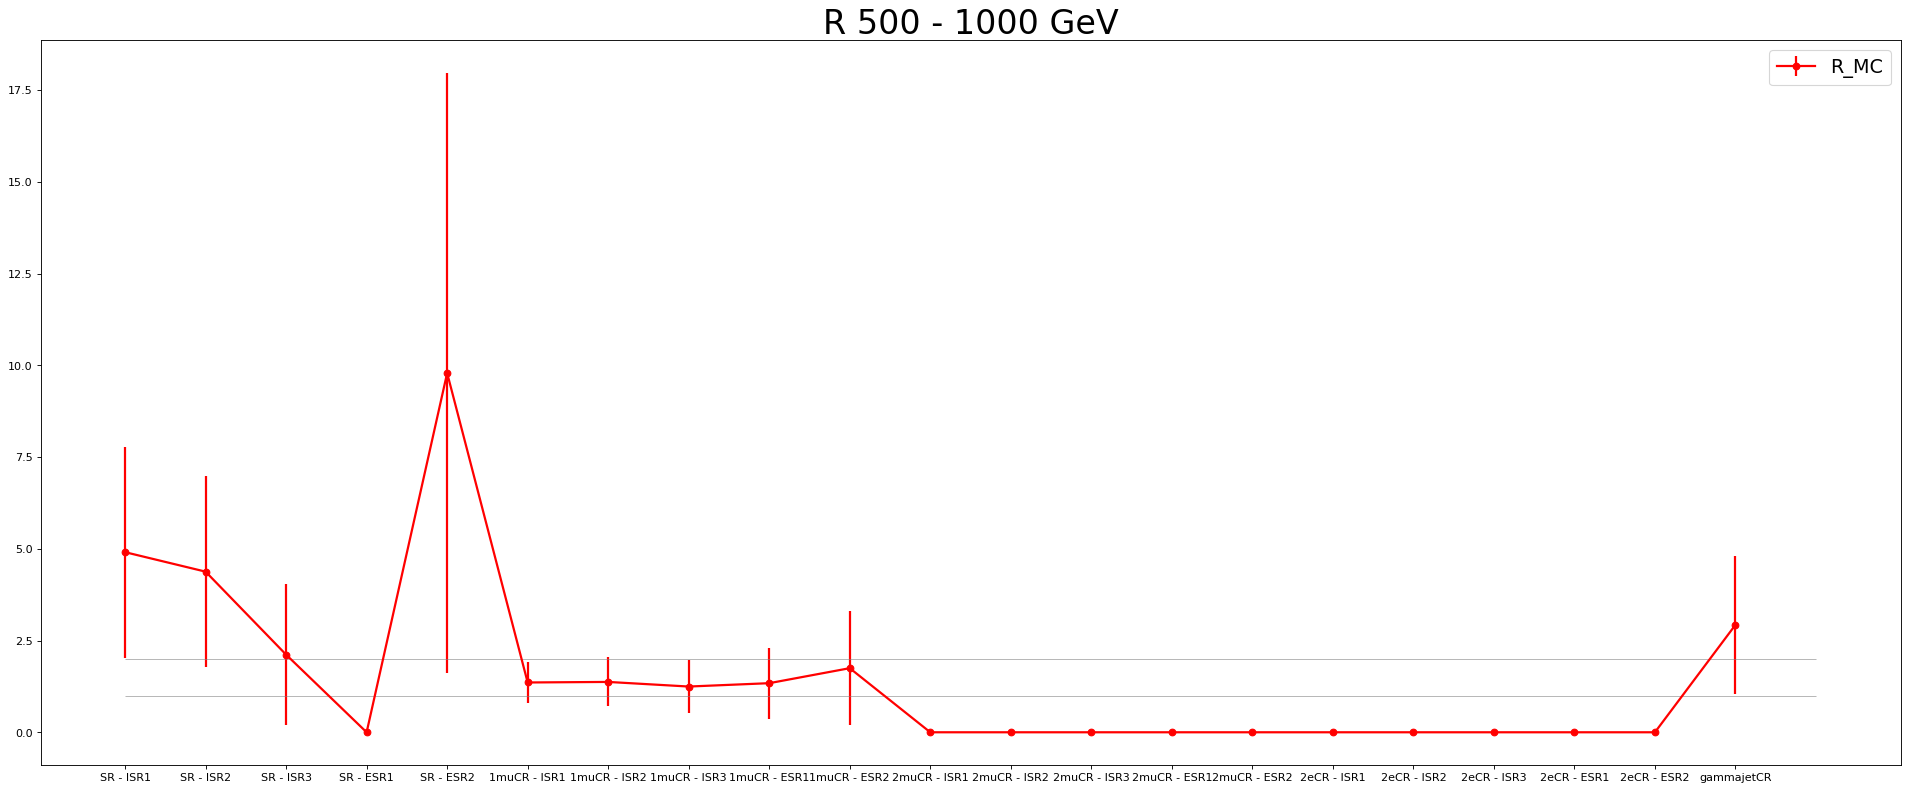

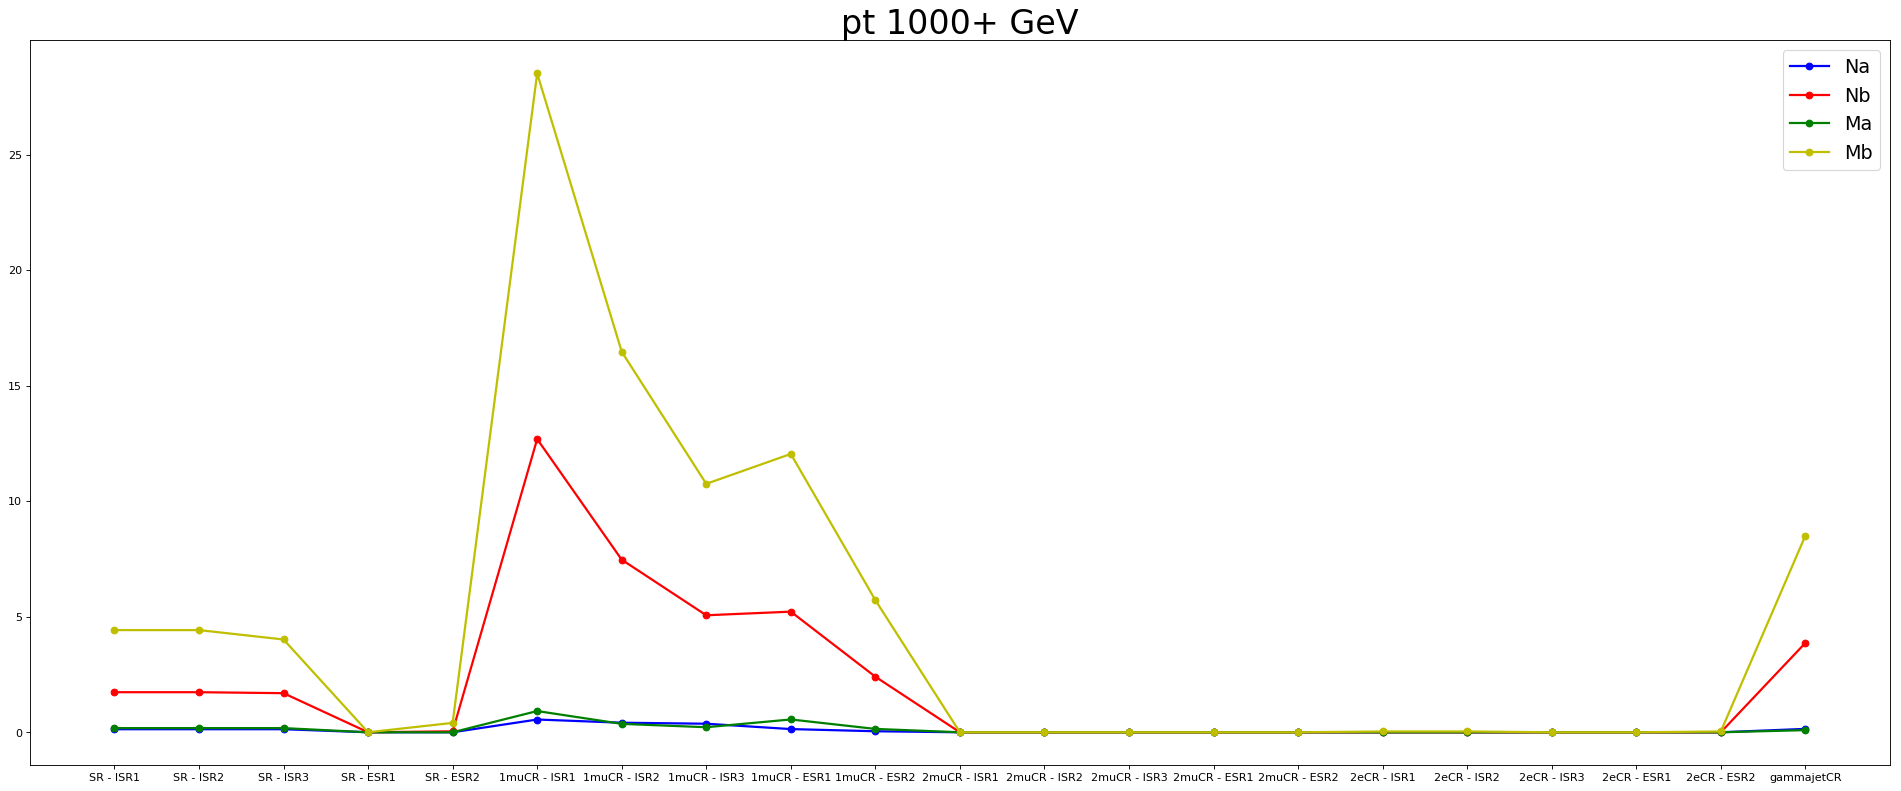

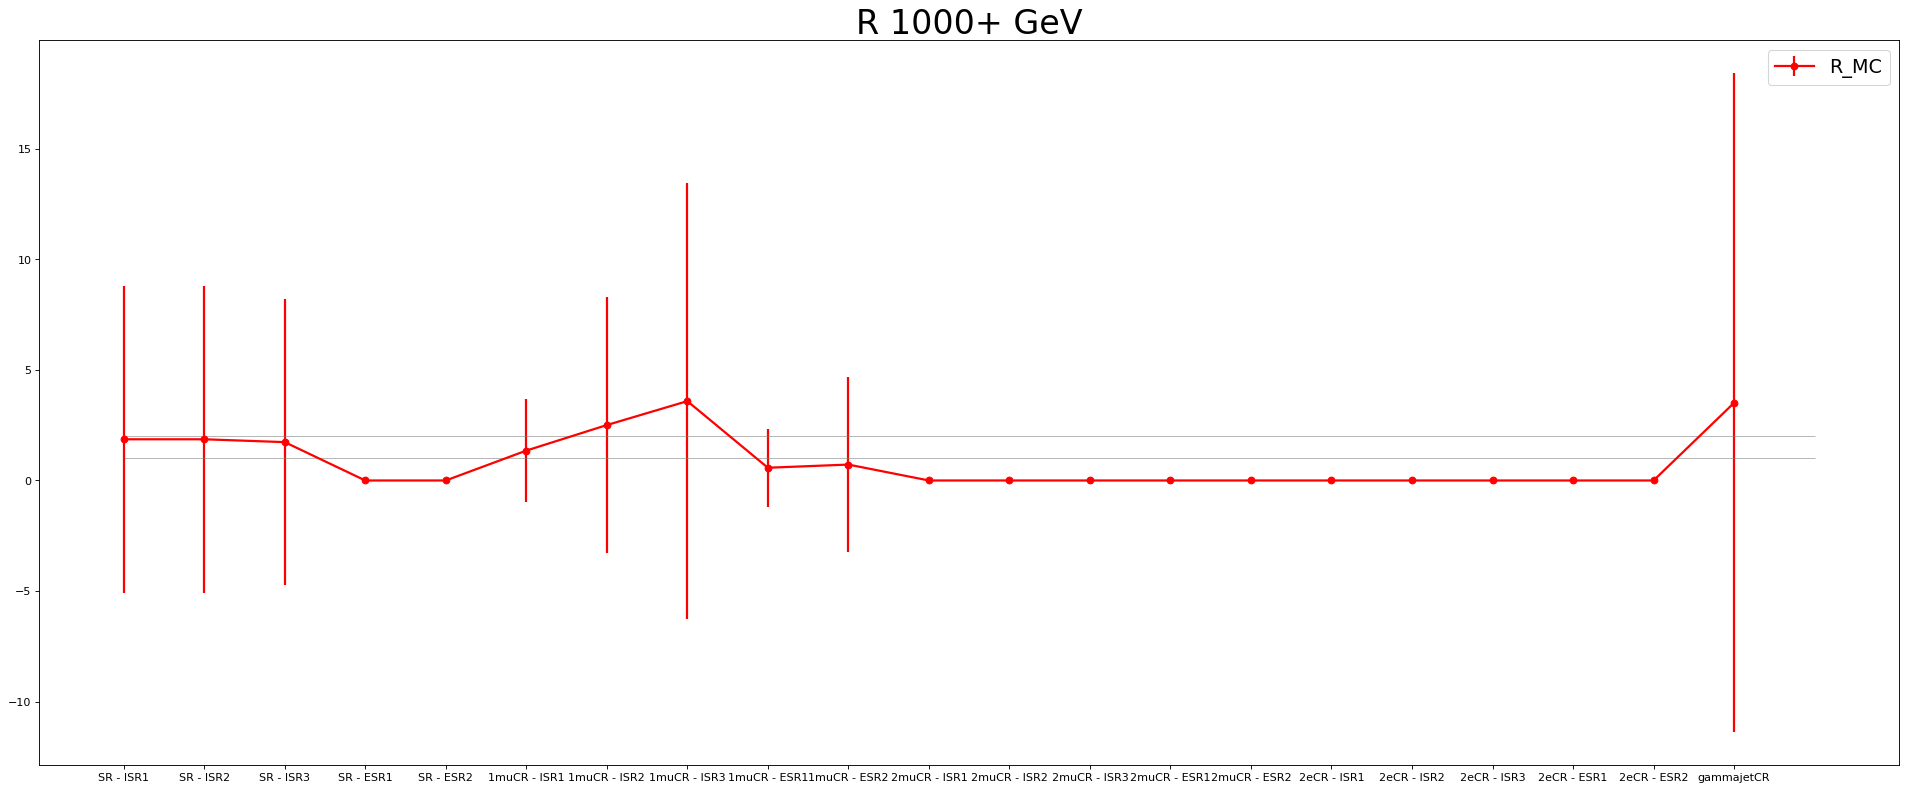

In [4]:

keys = sorted(listdir(PATH_Wjets_pesati))
for i in range(len(keys)):
    keys[i] = keys[i].split(".")[0]


values = []
for i in range(len(keys)):
    with open(PATH_Wjets_pesati+"/"+keys[i]+".txt", "r") as f:
        values.append(yaml.load(f, Loader=yaml.SafeLoader))


regions = list(values[0].keys())
data = dict(zip(keys, values))

x = [i for i in range(21)]

# CVetoBVeto + CFilterBVeto

Wjets_0_70     = ["364156", "364157", "364170", "364171", "364184", "364185"]
Wjets_70_140   = ["364159", "364160", "364173", "364174", "364187", "364188"]
Wjets_140_280  = ["364162", "364163", "364176", "364177", "364190", "364191"]
Wjets_280_500  = ["364165", "364166", "364179", "364180", "364193", "364194"]
Wjets_500_1000 = ["364168", "364182", "364196"]
Wjets_1000     = ["364169", "364183", "364197"]

Wjets = [Wjets_0_70, Wjets_70_140, Wjets_140_280, Wjets_280_500, Wjets_500_1000, Wjets_1000]
slices = ["0 - 70", "70 - 140", "140 - 280", "280 - 500", "500 - 1000", "1000+"]


for i in range(len(Wjets)):
    
    Na = [0 for _ in range(21)]
    Nb = [0 for _ in range(21)]
    Ma = [0 for _ in range(21)]
    Mb = [0 for _ in range(21)]
    
    for j in range(len(Wjets[i])):
        for k in range(21):
            Na[k] = Na[k] + data[Wjets[i][j]][regions[k]]["Na_b"]
            Nb[k] = Nb[k] + data[Wjets[i][j]][regions[k]]["Nb_b"]
            Ma[k] = Ma[k] + data[Wjets[i][j]][regions[k]]["Ma_b"]
            Mb[k] = Mb[k] + data[Wjets[i][j]][regions[k]]["Mb_b"]
        
    plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

    plt.plot(x, Na, label="Na", color="b", marker="o", linestyle="-", linewidth=2)
    plt.plot(x, Nb, label="Nb", color="r", marker="o", linestyle="-", linewidth=2)
    plt.plot(x, Ma, label="Ma", color="g", marker="o", linestyle="-", linewidth=2)
    plt.plot(x, Mb, label="Mb", color="y", marker="o", linestyle="-", linewidth=2)

    plt.xticks(range(len(regions)), regions)
    plt.legend(fontsize="xx-large")
    plt.title("pt " + slices[i] + " GeV", fontsize=30)


    # calcolo R
    R = [0 for i in range(21)]
    sigma_R = [0 for i in range(21)]

    for l in range(21):
        try:
            R[l] = (Na[l]*Mb[l])/(Nb[l]*Ma[l])
            sigma_R[l] = R[l] * math.sqrt((1/Na[l]) + (1/Nb[l]) + (1/Ma[l]) + (1/Mb[l])) 
        except (ZeroDivisionError, ValueError):
            R[l] = 0
            sigma_R[l] = 0

    plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

    plt.errorbar(x, R, yerr=sigma_R, fmt="or", linestyle="-", linewidth=2, label="R_MC") 

    plt.xticks(range(len(regions)), regions)
    plt.legend(fontsize="xx-large")
    plt.title("R " + slices[i] + " GeV", fontsize=30)

    plt.hlines(1, 0, 21, colors='gray', linestyles='solid', label='', linewidth=0.5)
    plt.hlines(2, 0, 21, colors='gray', linestyles='solid', label='', linewidth=0.5)

    if( slices[i] is ""):
        plt.axis([-1, 21, -0.5, 8])




# Zjets

## Non pesati

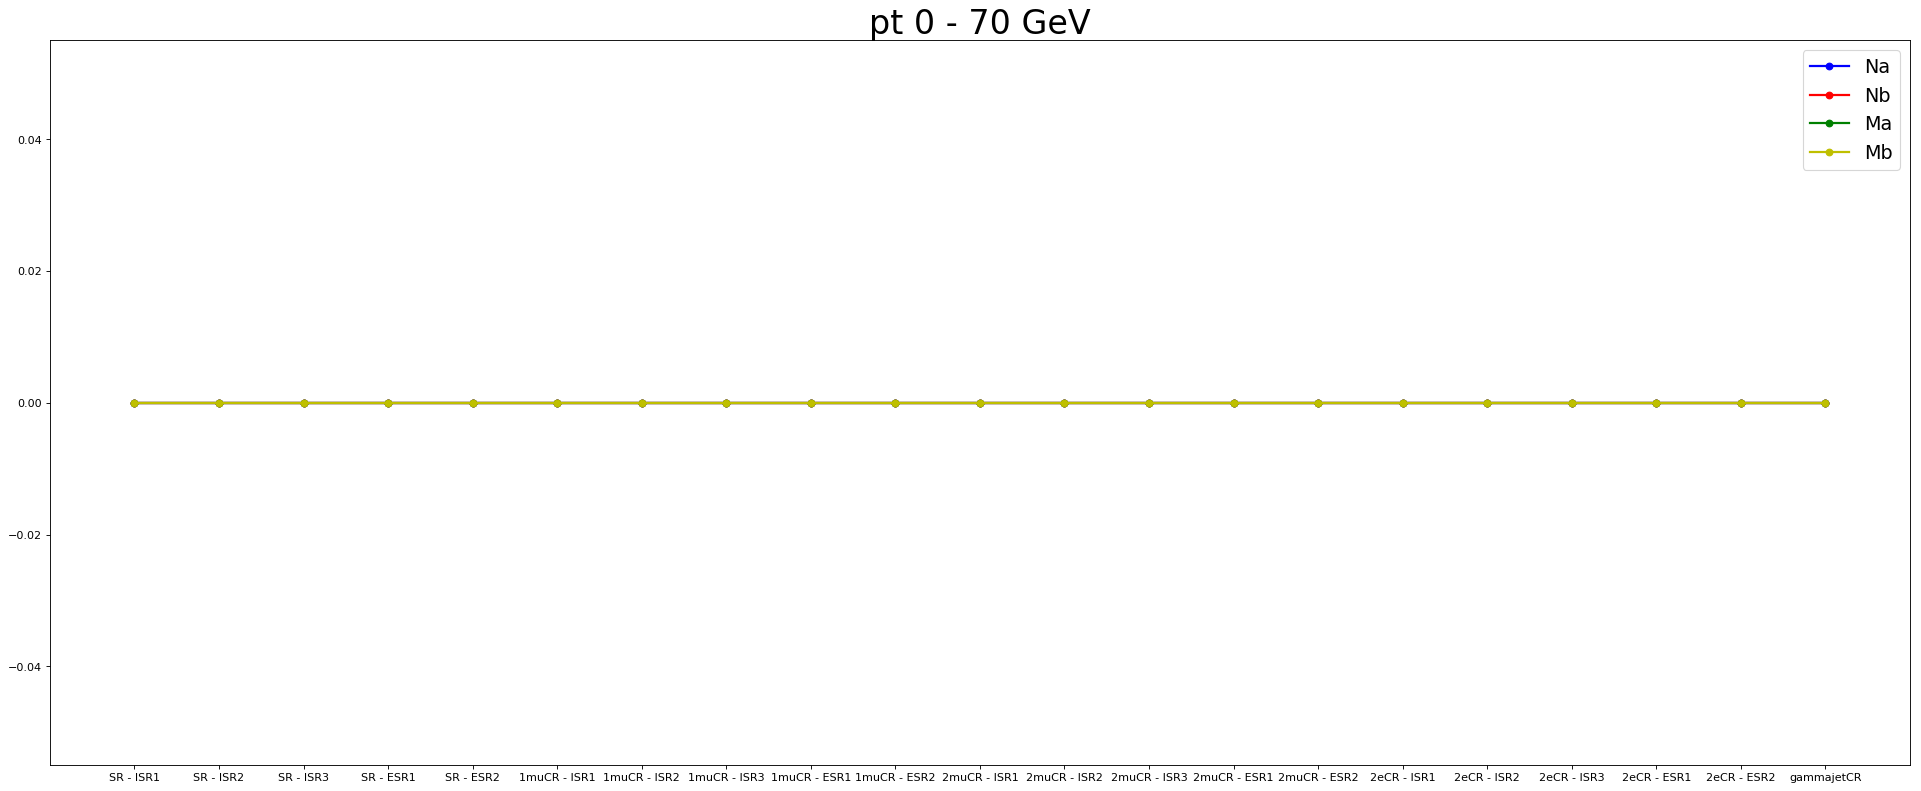

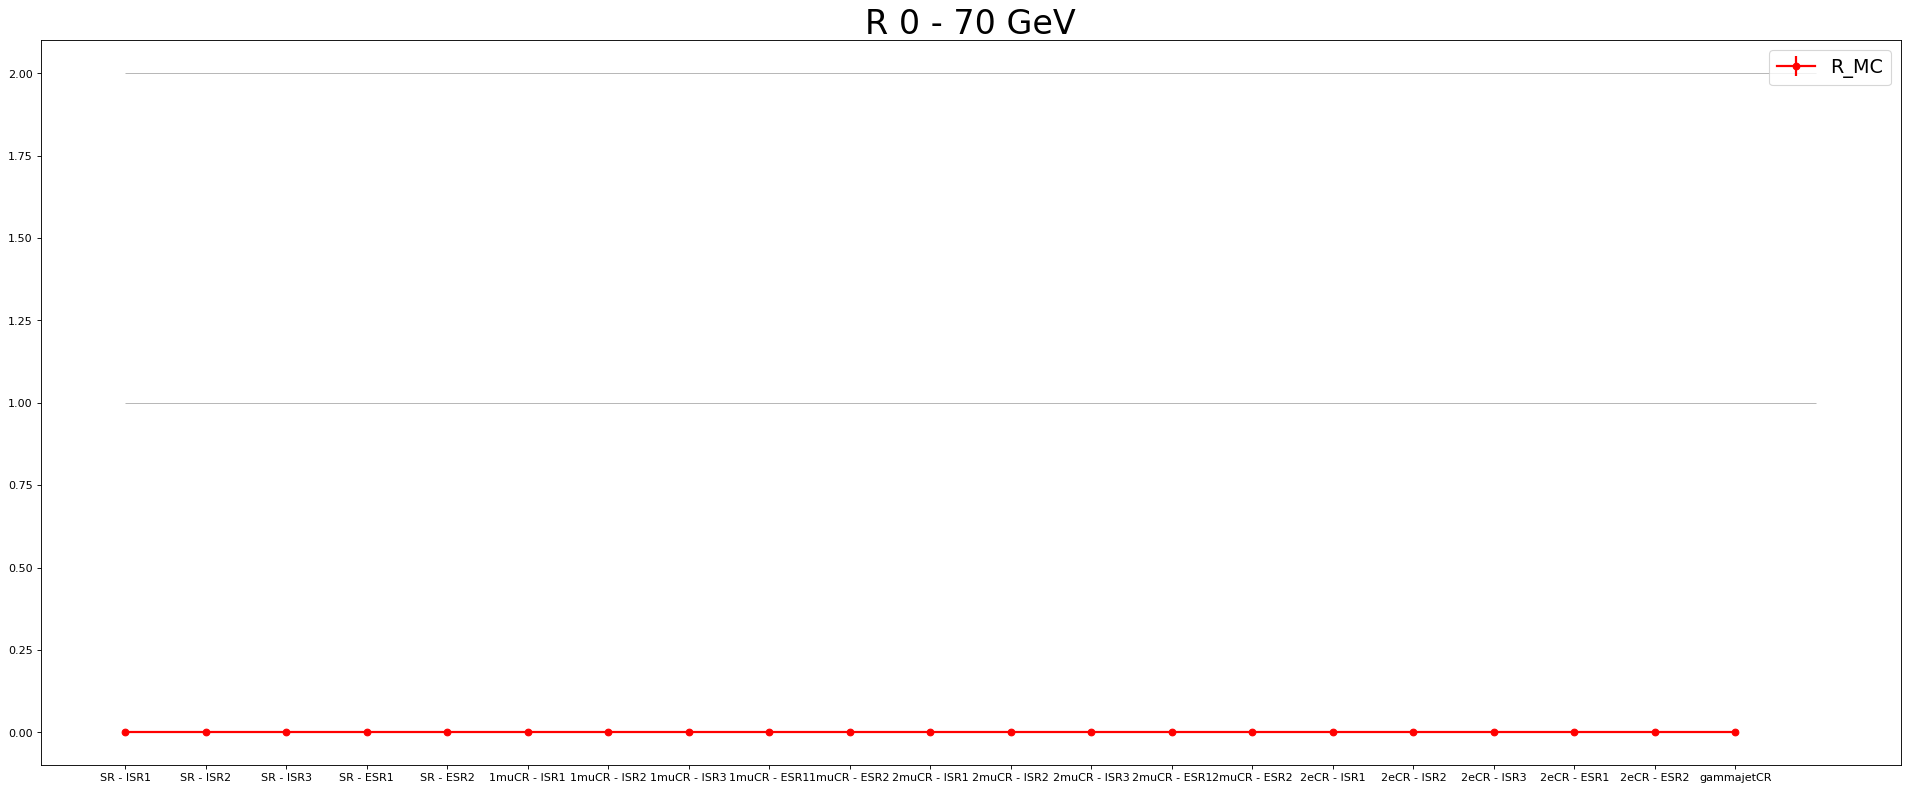

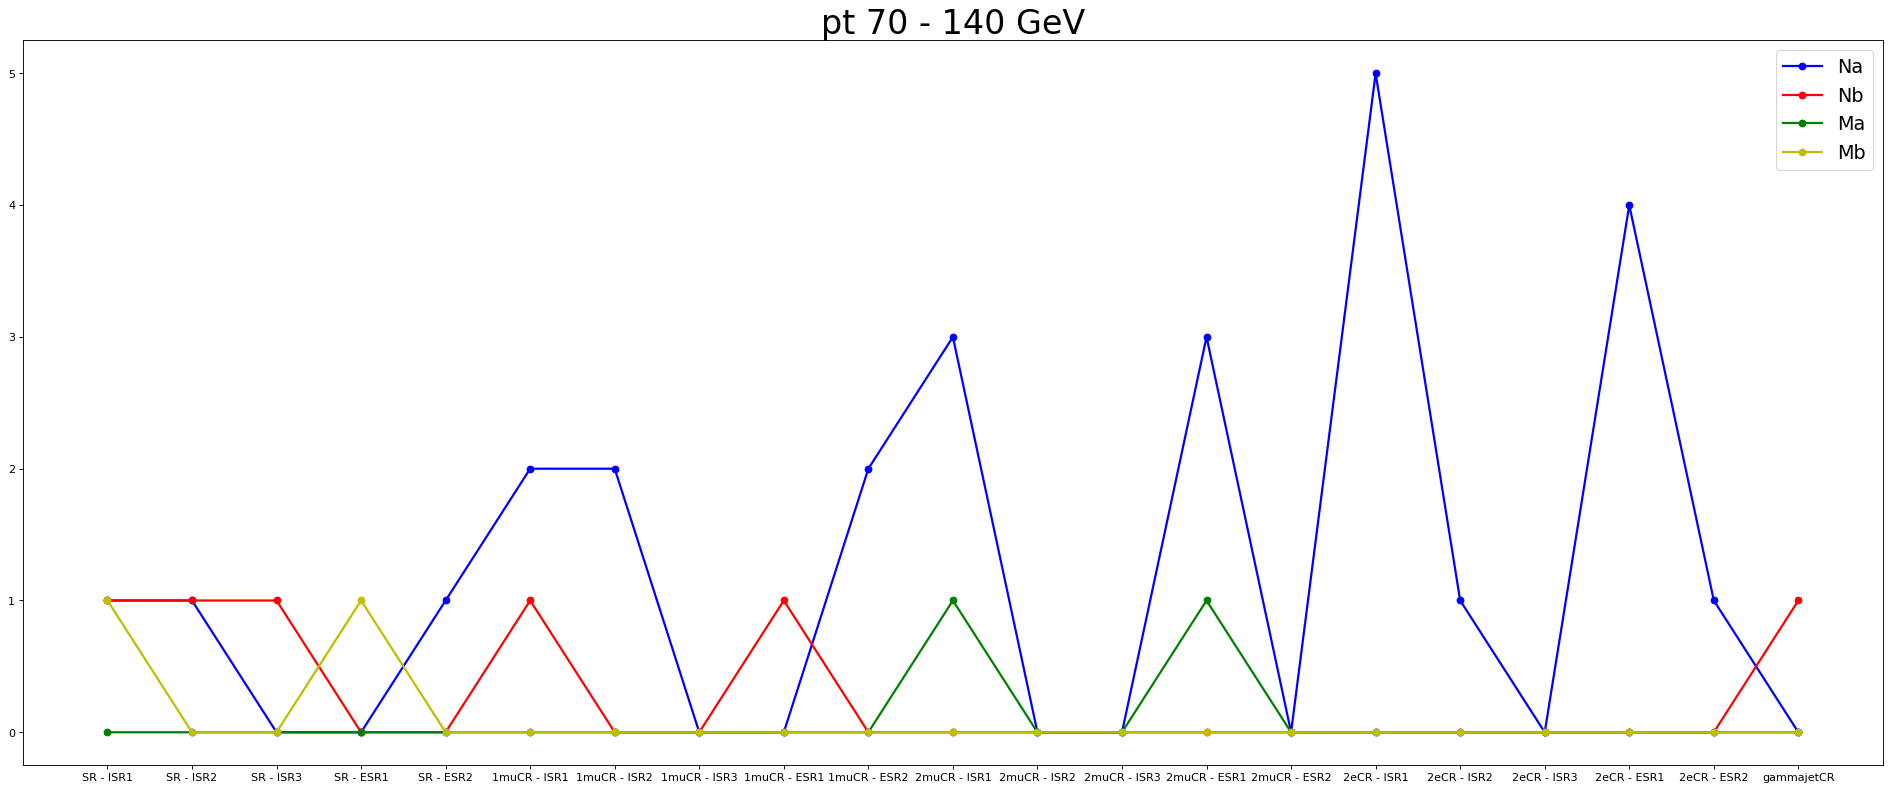

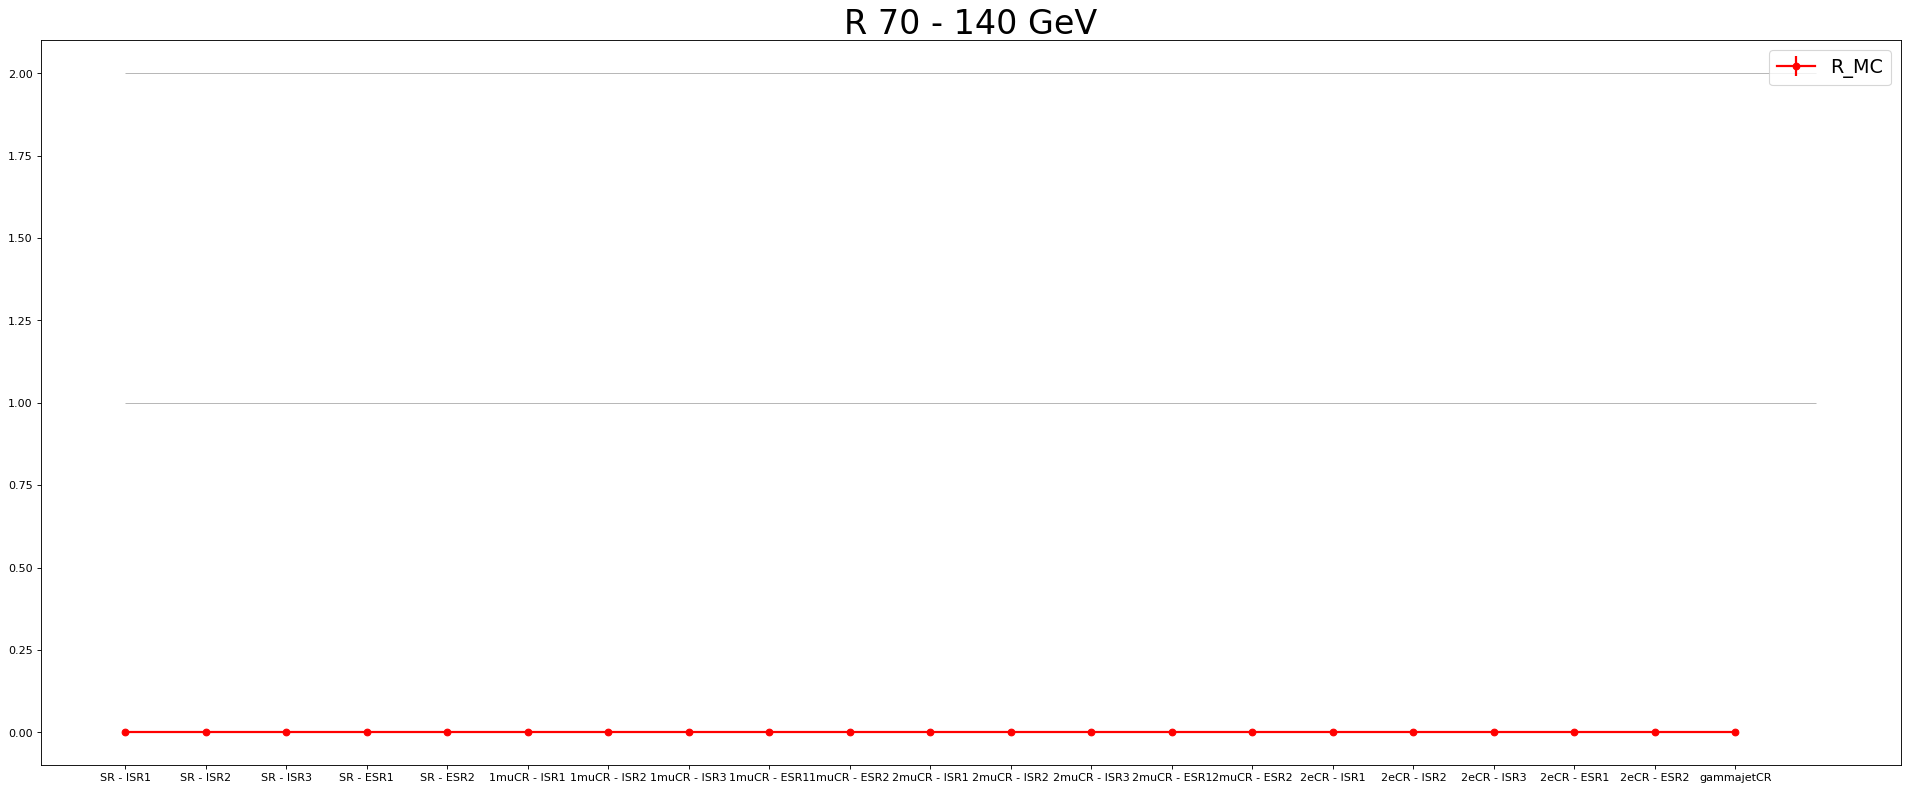

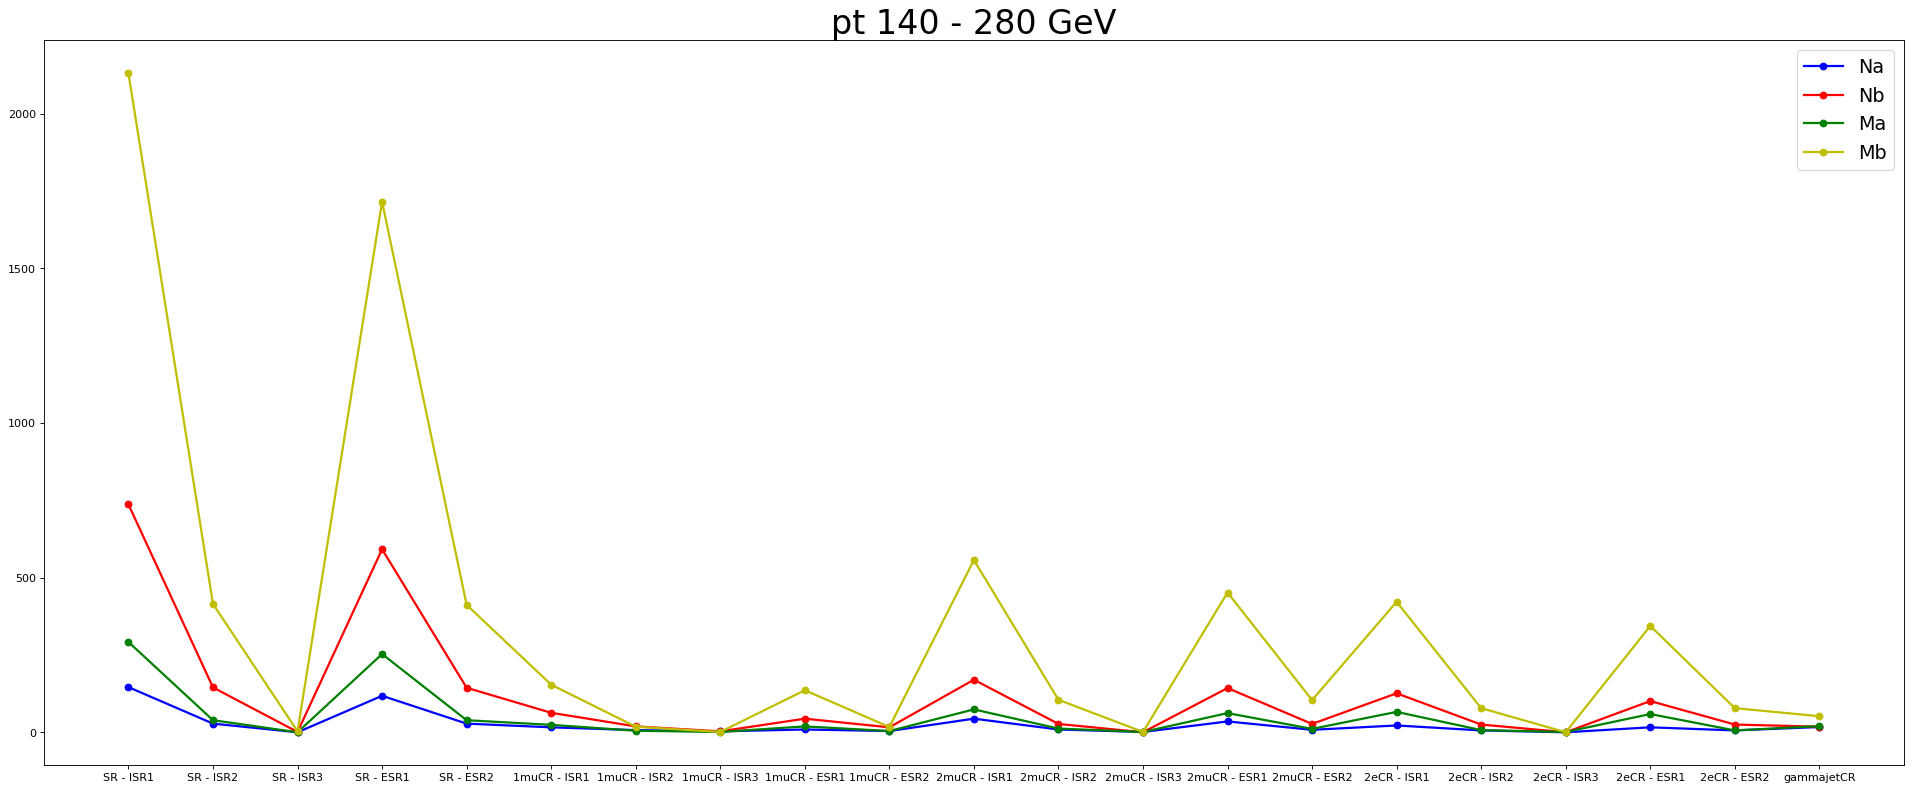

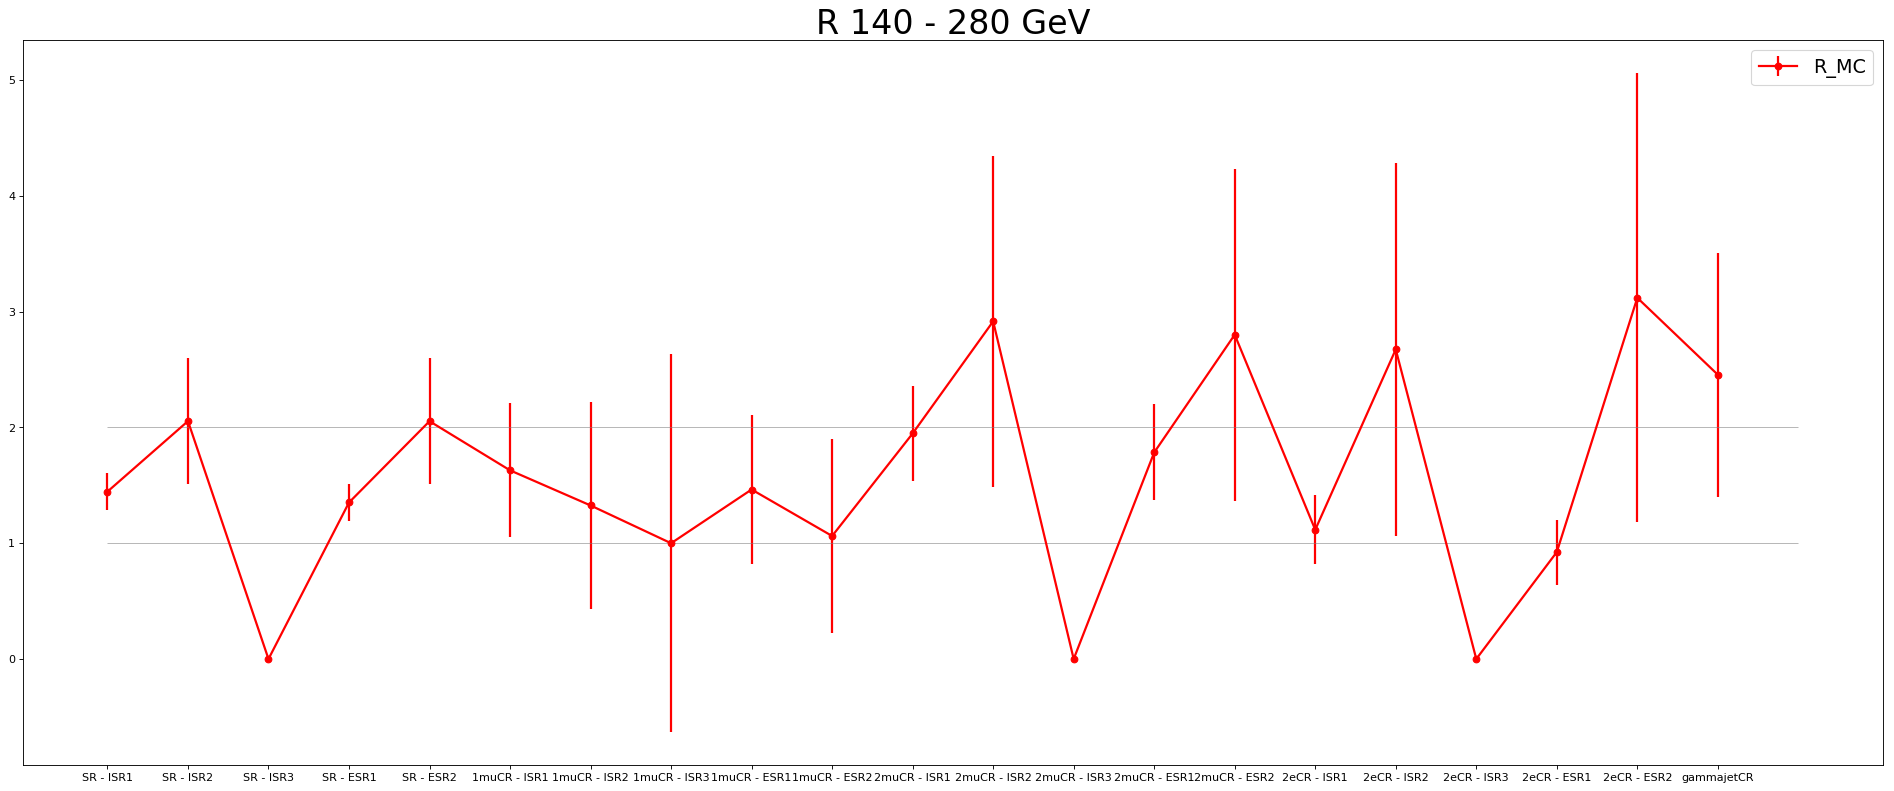

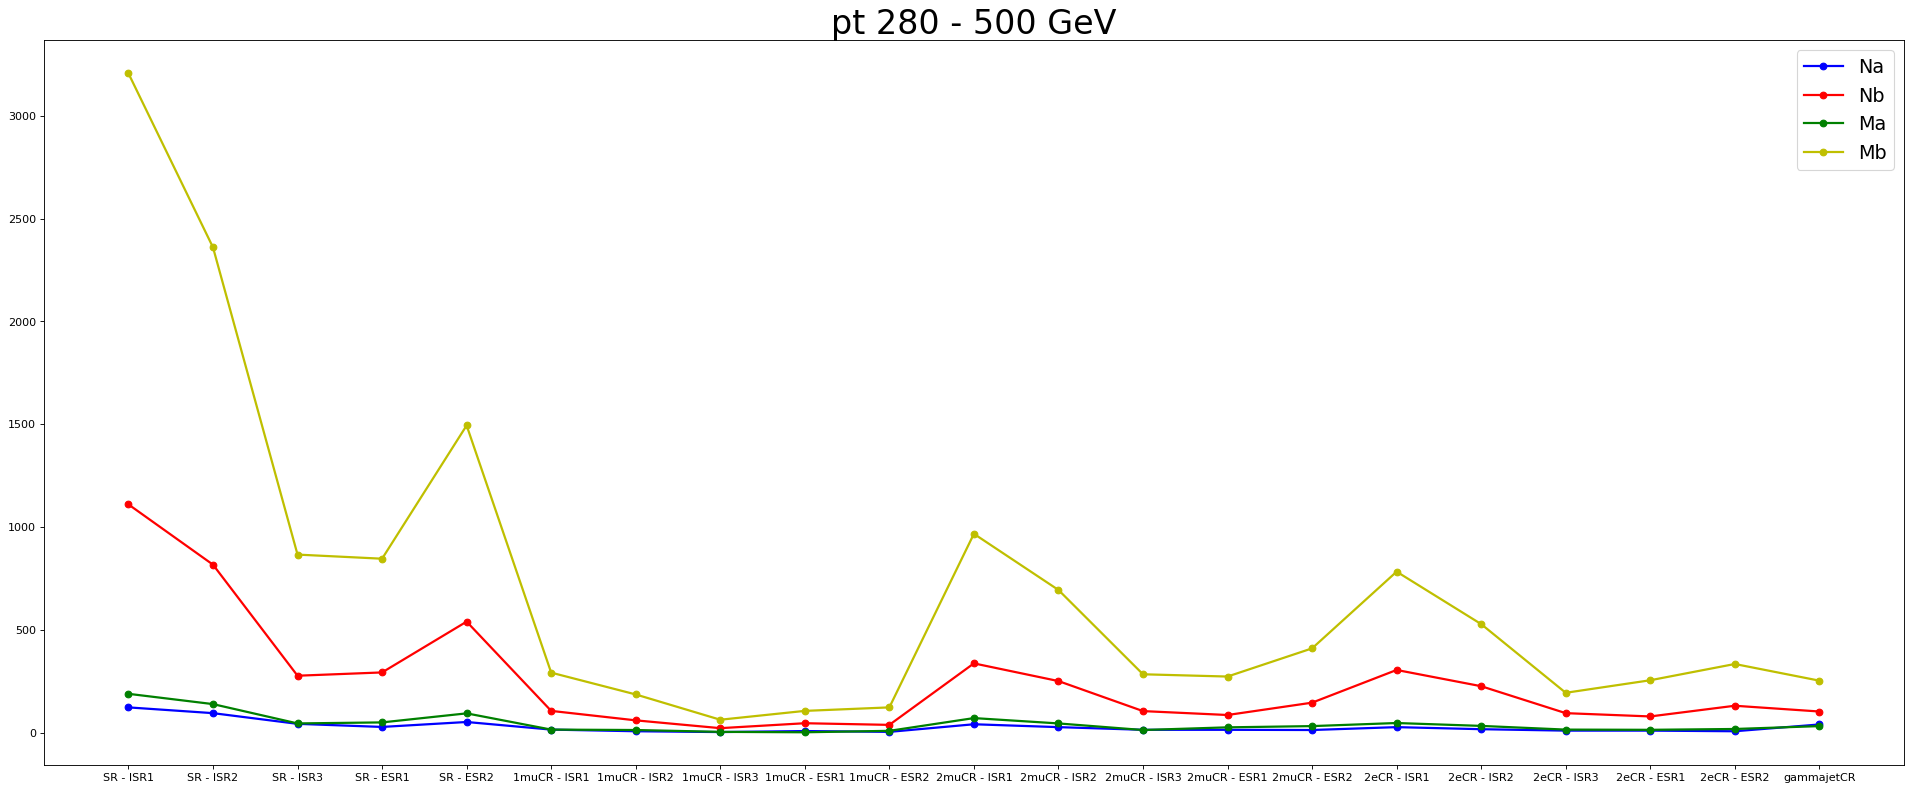

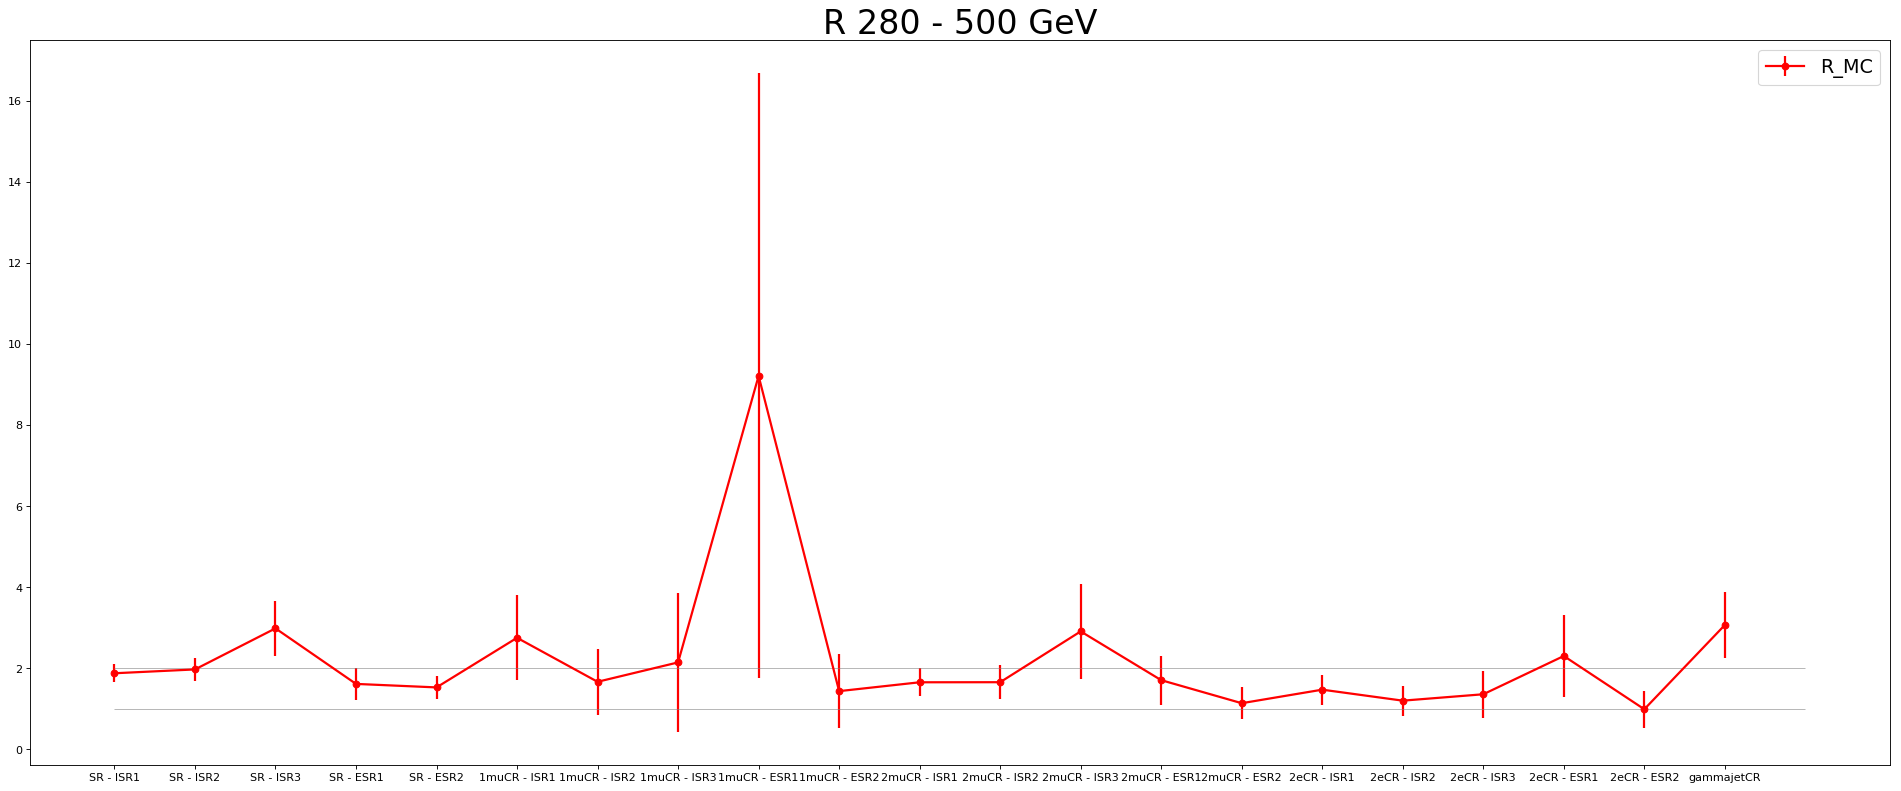

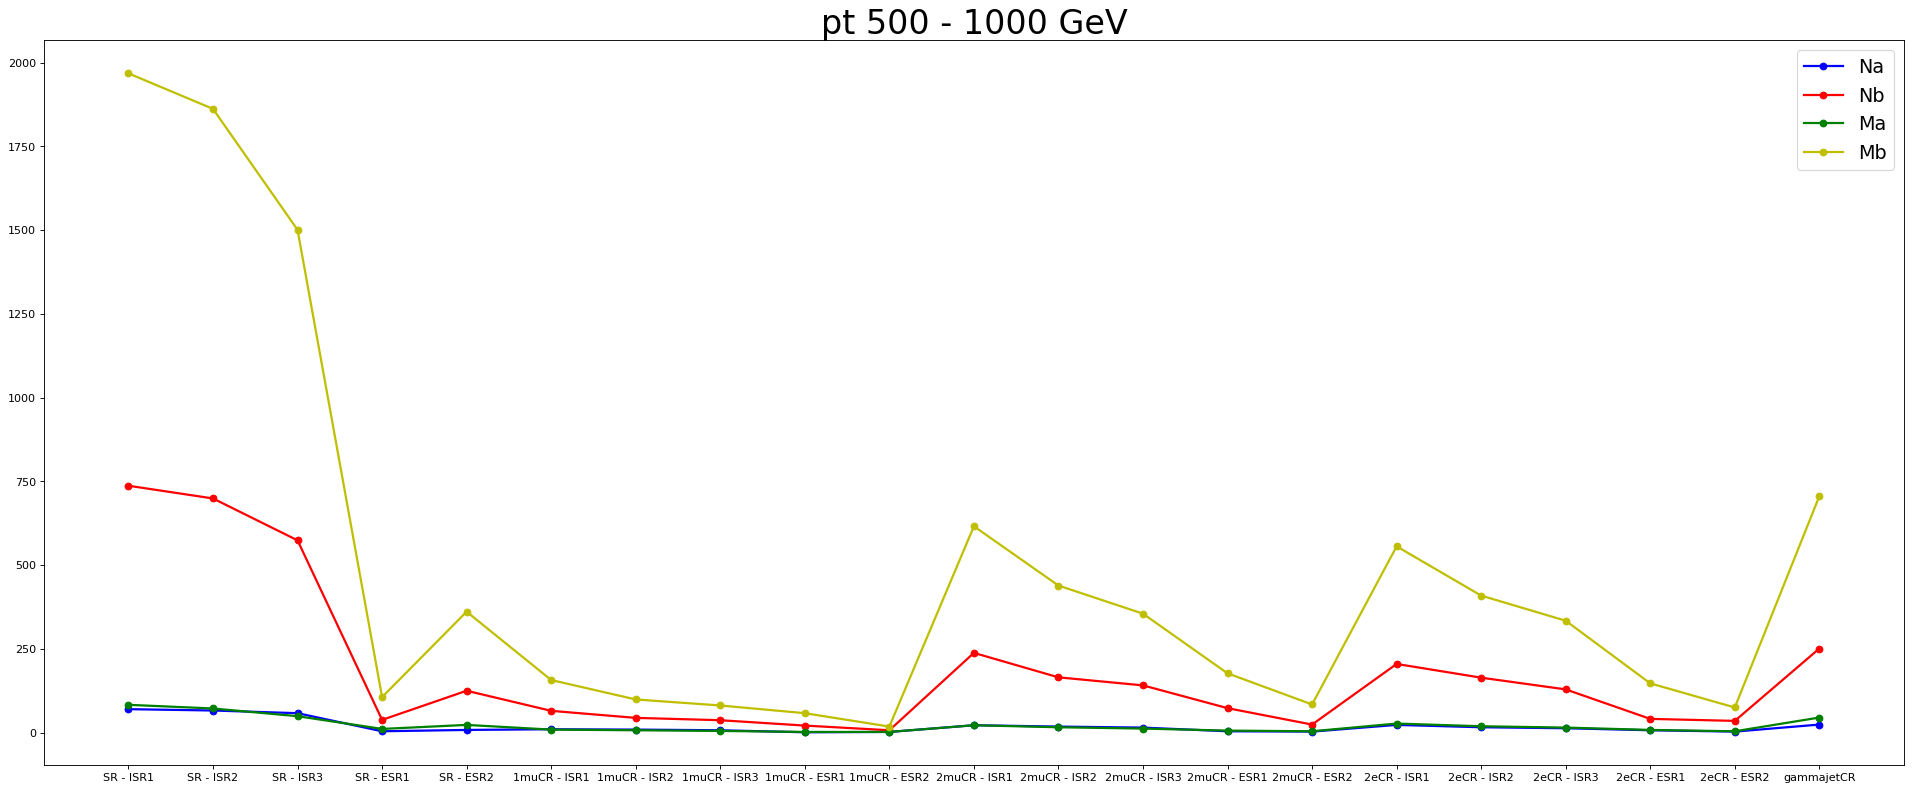

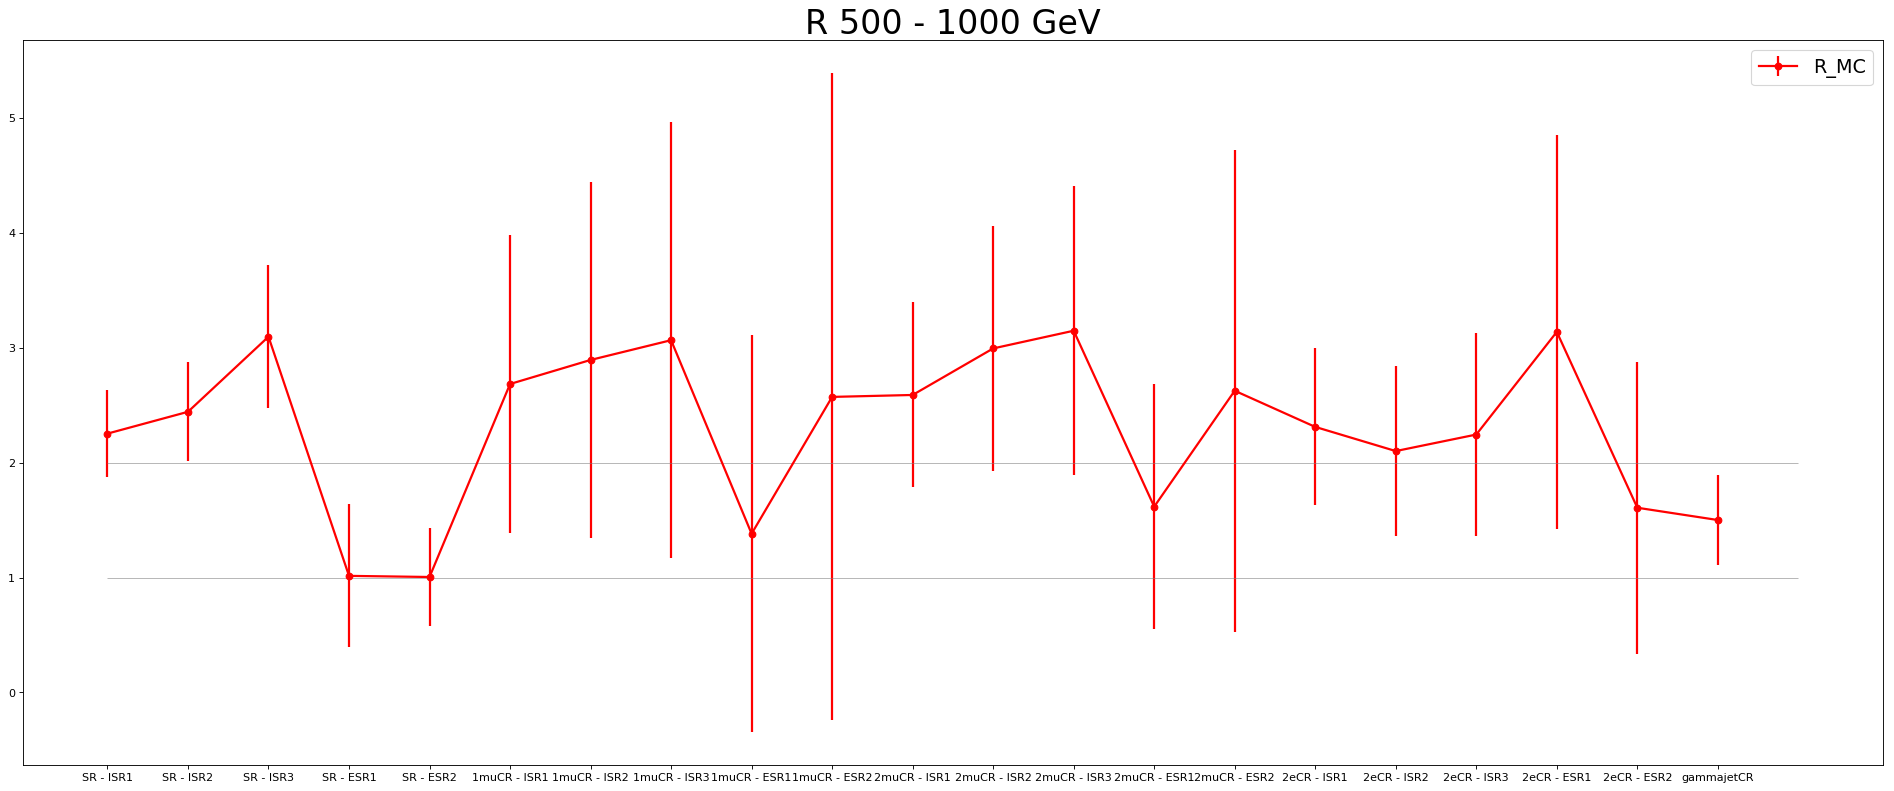

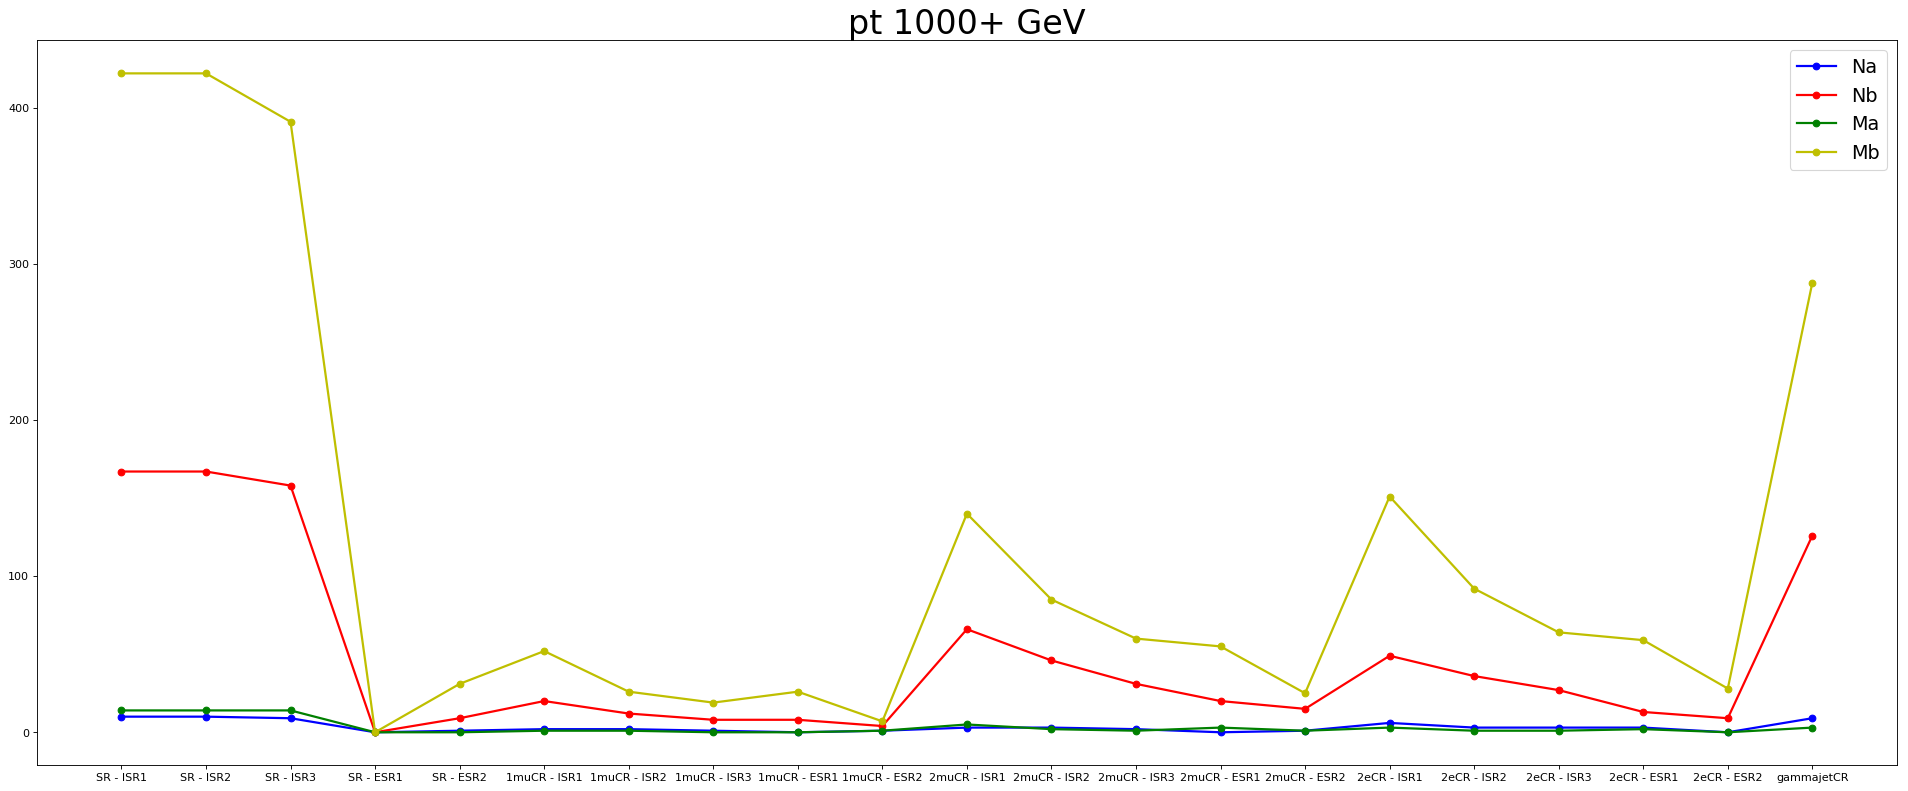

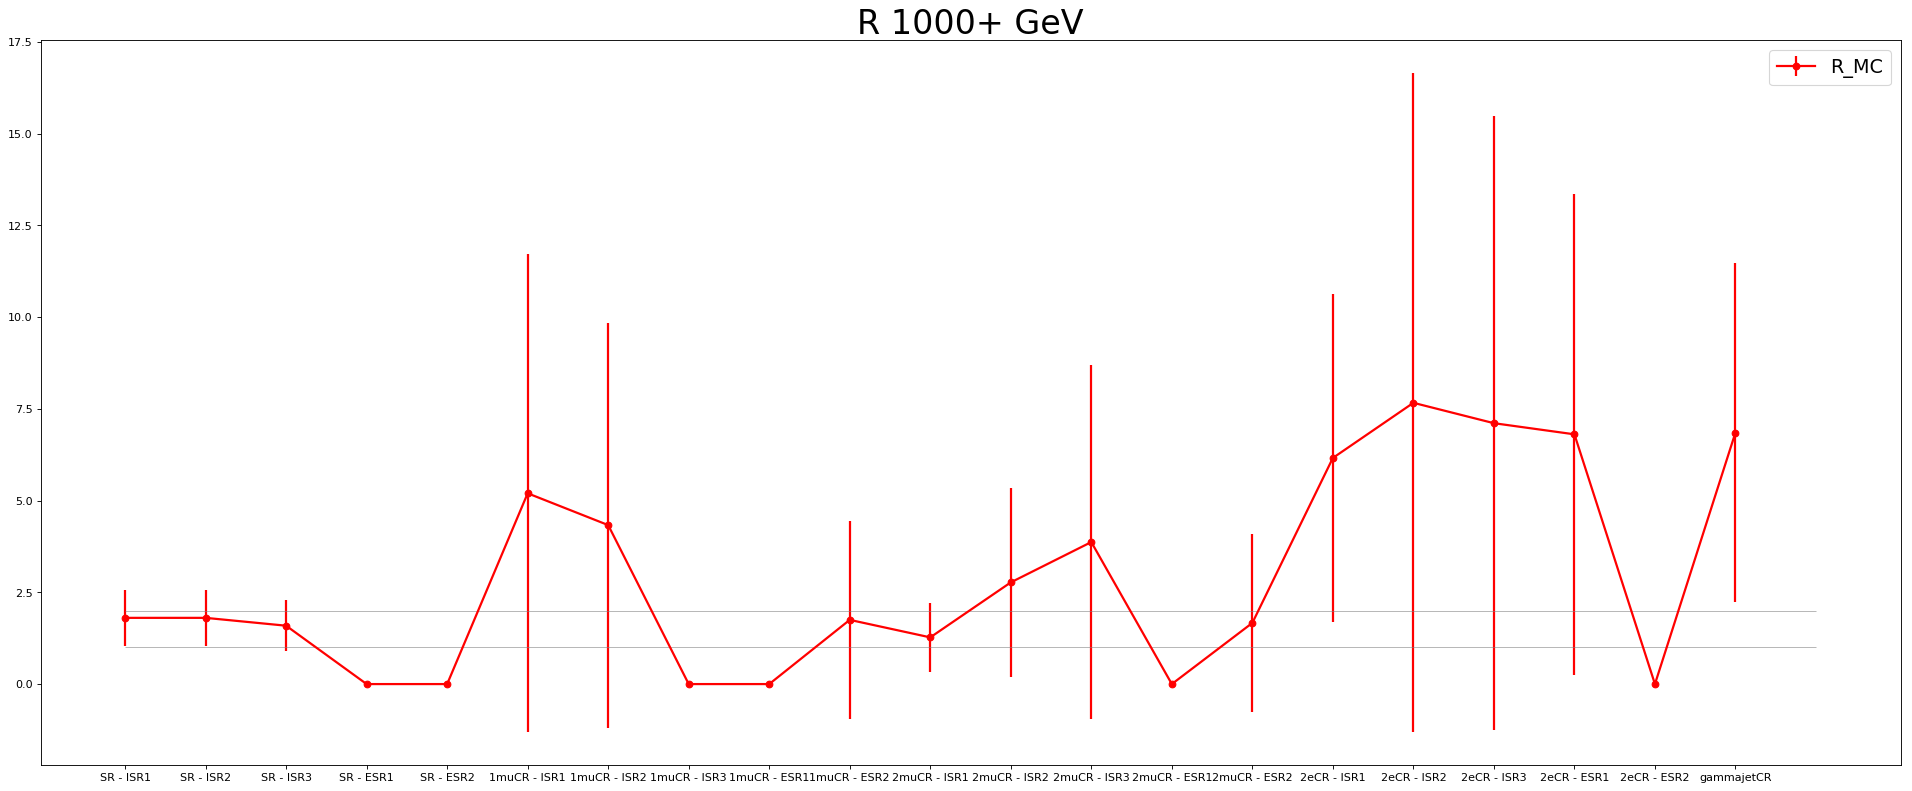

In [5]:

keys = sorted(listdir(PATH_Zjets_non_pesati))
for i in range(len(keys)):
    keys[i] = keys[i].split(".")[0]


values = []
for i in range(len(keys)):
    with open(PATH_Zjets_non_pesati+"/"+keys[i]+".txt", "r") as f:
        values.append(yaml.load(f, Loader=yaml.SafeLoader))


regions = list(values[0].keys())
data = dict(zip(keys, values))

x = [i for i in range(21)]

# CVetoBVeto + CFilterBVeto

Zjets_0_70     = ["364100", "364101", "364114", "364115", "364128", "364129"]
Zjets_70_140   = ["364103", "364104", "364117", "364118", "364131", "364132"]
Zjets_140_280  = ["364106", "364107", "364120", "364121", "364134", "364135", "364148", "364149"]
Zjets_280_500  = ["364109", "364110", "364123", "364124", "364137", "364138", "364151", "364152"]
Zjets_500_1000 = ["364112", "364126", "364140", "364154"]
Zjets_1000     = ["364113", "364127", "364141", "364155"]

Zjets = [Zjets_0_70, Zjets_70_140, Zjets_140_280, Zjets_280_500, Zjets_500_1000, Zjets_1000]
slices = ["0 - 70", "70 - 140", "140 - 280", "280 - 500", "500 - 1000", "1000+"]


for i in range(len(Zjets)):
    
    Na = [0 for _ in range(21)]
    Nb = [0 for _ in range(21)]
    Ma = [0 for _ in range(21)]
    Mb = [0 for _ in range(21)]
    
    for j in range(len(Zjets[i])):
        for k in range(21):
            Na[k] = Na[k] + data[Zjets[i][j]][regions[k]]["Na_b"]
            Nb[k] = Nb[k] + data[Zjets[i][j]][regions[k]]["Nb_b"]
            Ma[k] = Ma[k] + data[Zjets[i][j]][regions[k]]["Ma_b"]
            Mb[k] = Mb[k] + data[Zjets[i][j]][regions[k]]["Mb_b"]
        
    plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

    plt.plot(x, Na, label="Na", color="b", marker="o", linestyle="-", linewidth=2)
    plt.plot(x, Nb, label="Nb", color="r", marker="o", linestyle="-", linewidth=2)
    plt.plot(x, Ma, label="Ma", color="g", marker="o", linestyle="-", linewidth=2)
    plt.plot(x, Mb, label="Mb", color="y", marker="o", linestyle="-", linewidth=2)

    plt.xticks(range(len(regions)), regions)
    plt.legend(fontsize="xx-large")
    plt.title("pt " + slices[i] + " GeV", fontsize=30)


    # calcolo R
    R = [0 for i in range(21)]
    sigma_R = [0 for i in range(21)]

    for l in range(21):
        try:
            R[l] = (Na[l]*Mb[l])/(Nb[l]*Ma[l])
            sigma_R[l] = R[l] * math.sqrt((1/Na[l]) + (1/Nb[l]) + (1/Ma[l]) + (1/Mb[l])) 
        except (ZeroDivisionError, ValueError):
            R[l] = 0
            sigma_R[l] = 0

    plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

    plt.errorbar(x, R, yerr=sigma_R, fmt="or", linestyle="-", linewidth=2, label="R_MC") 

    plt.xticks(range(len(regions)), regions)
    plt.legend(fontsize="xx-large")
    plt.title("R " + slices[i] + " GeV", fontsize=30)

    plt.hlines(1, 0, 21, colors='gray', linestyles='solid', label='', linewidth=0.5)
    plt.hlines(2, 0, 21, colors='gray', linestyles='solid', label='', linewidth=0.5)

    if( slices[i] is ""):
        plt.axis([-1, 21, -0.5, 8])




## Pesati

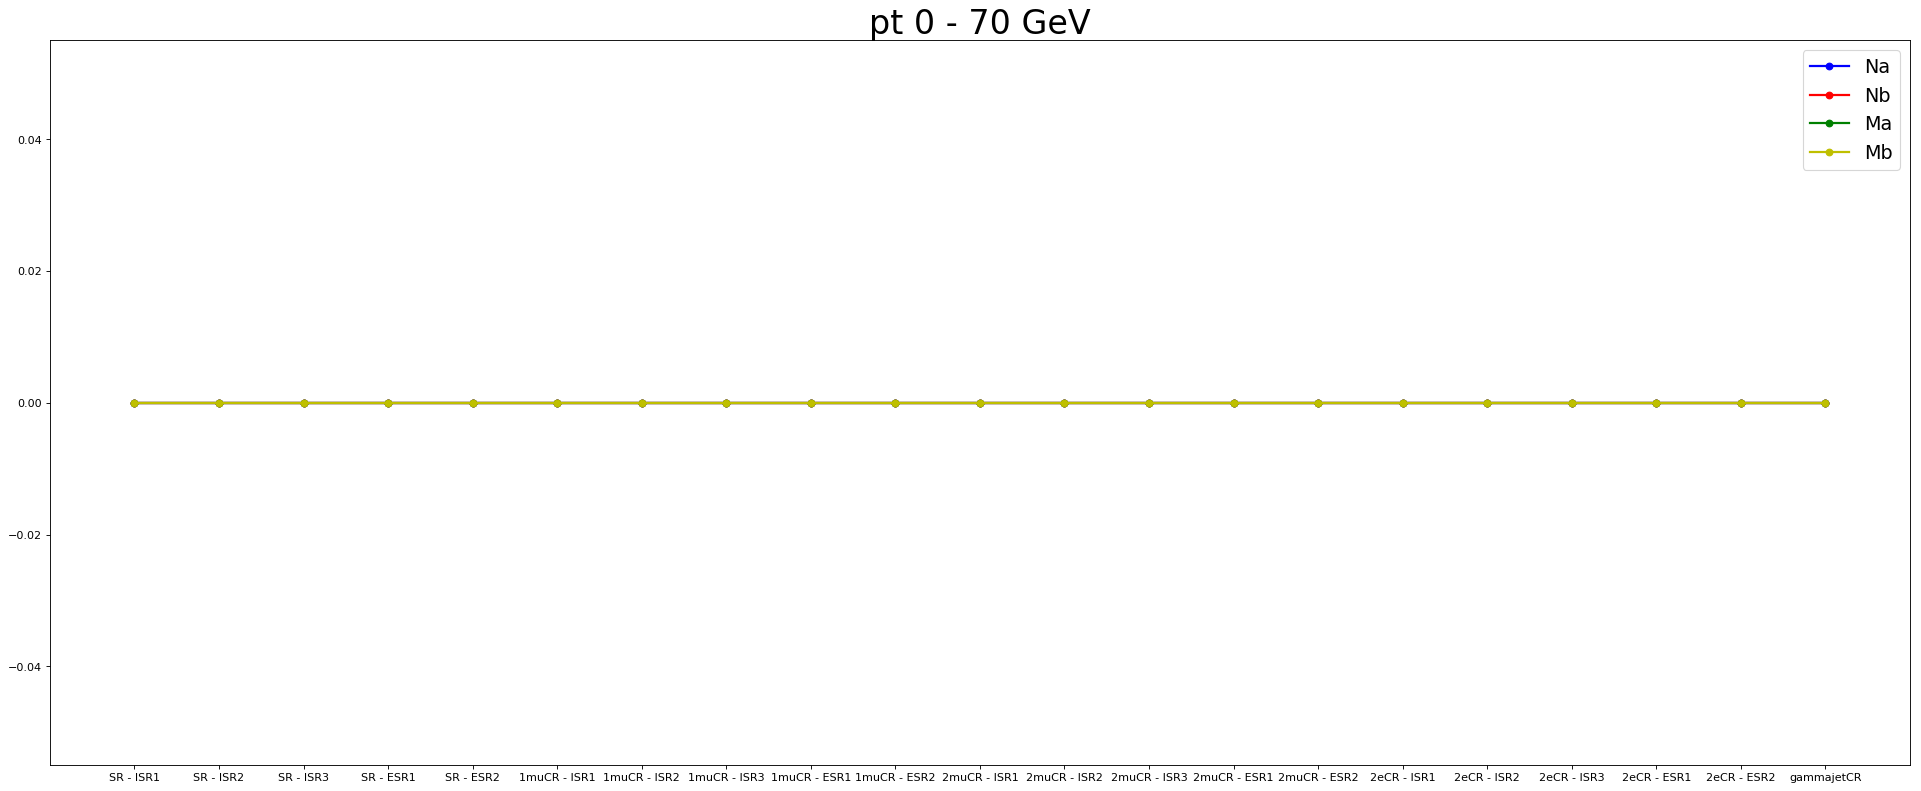

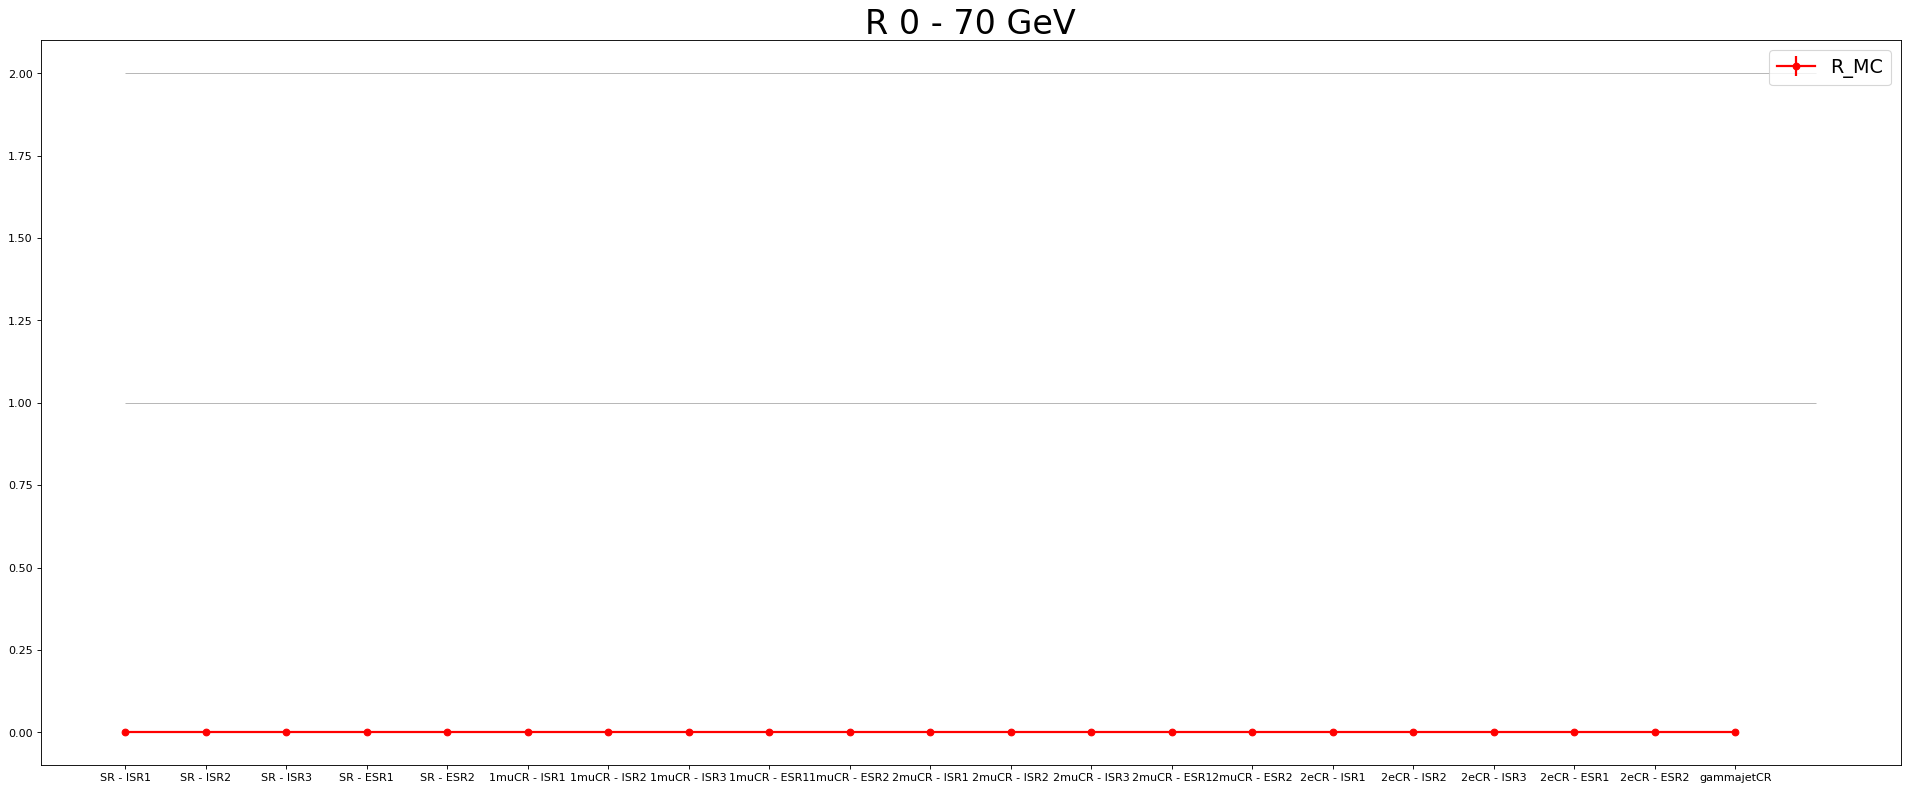

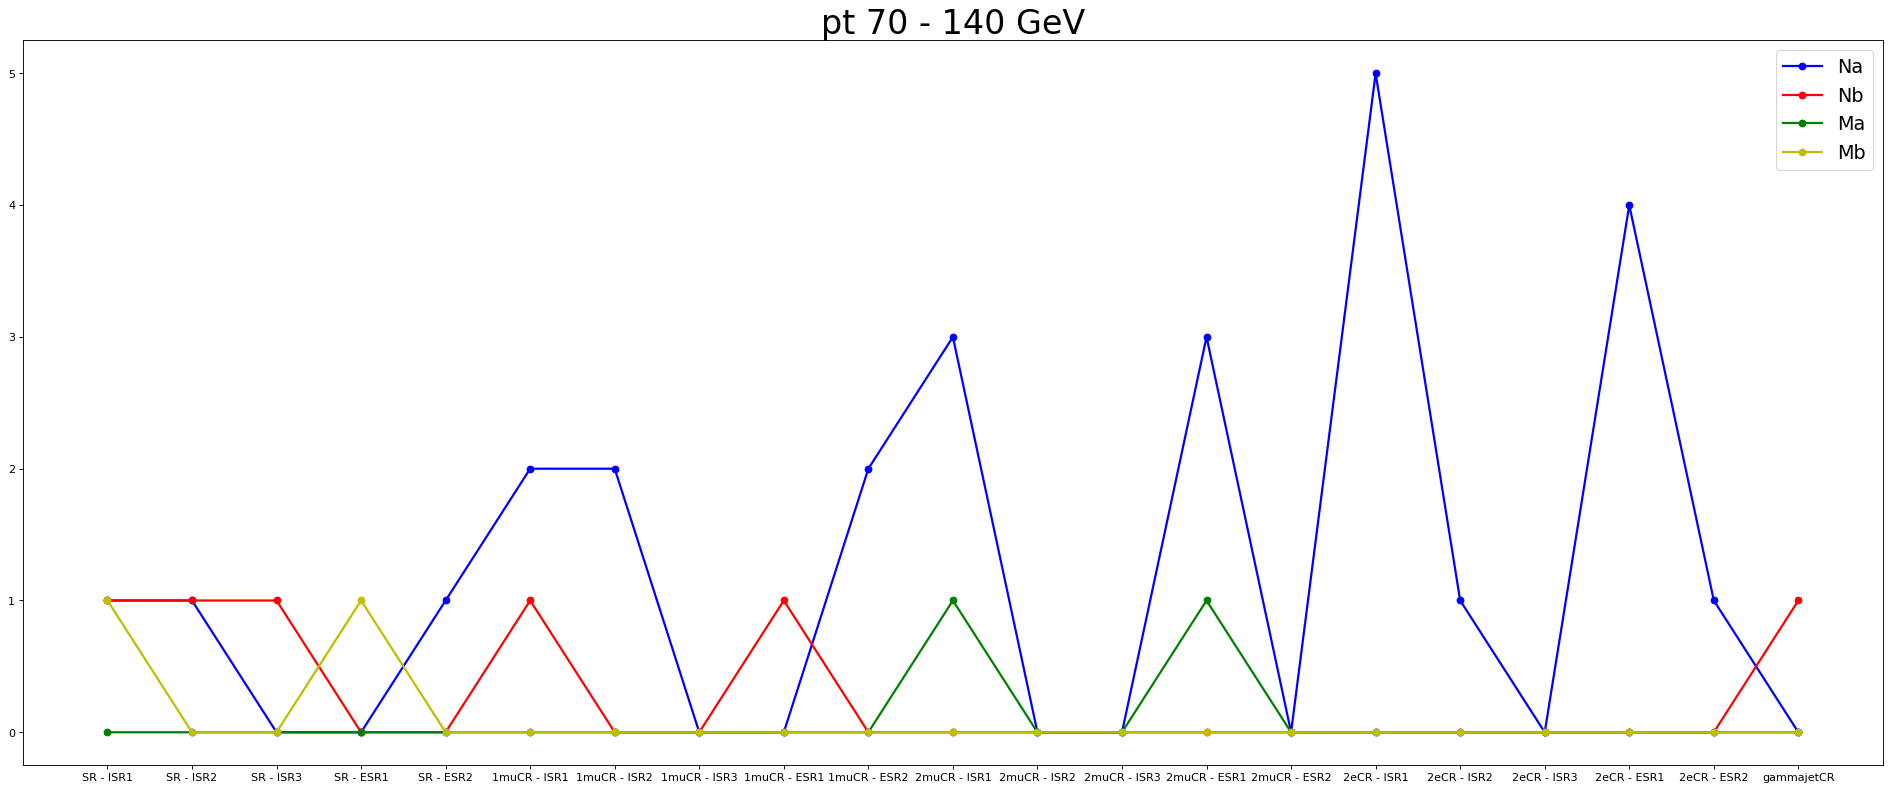

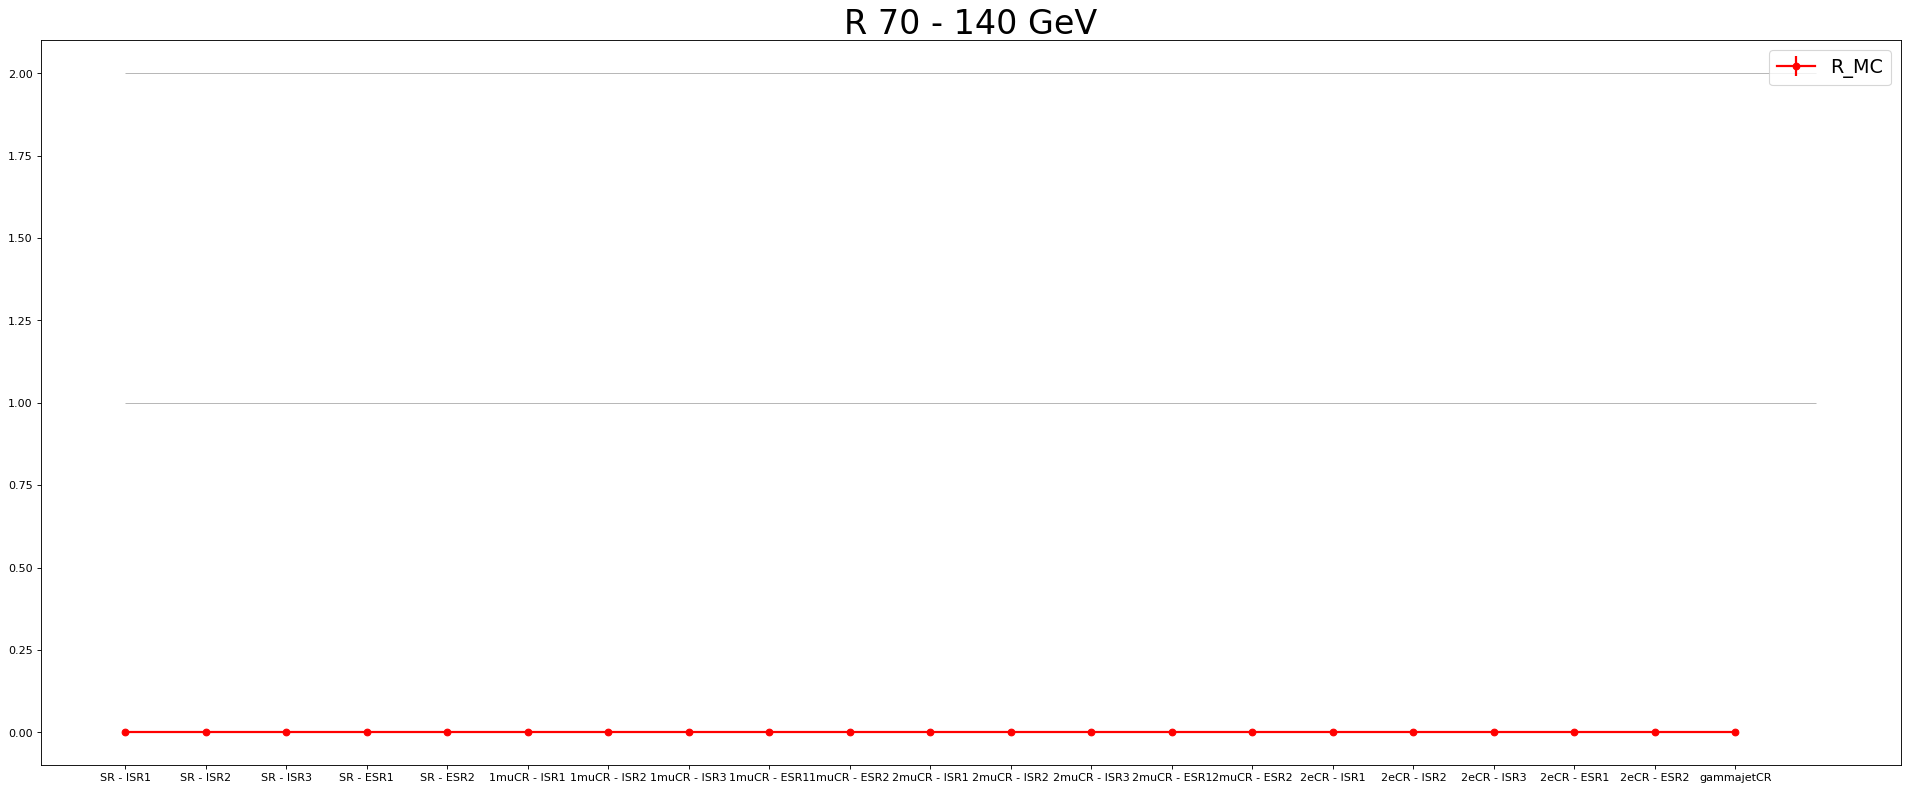

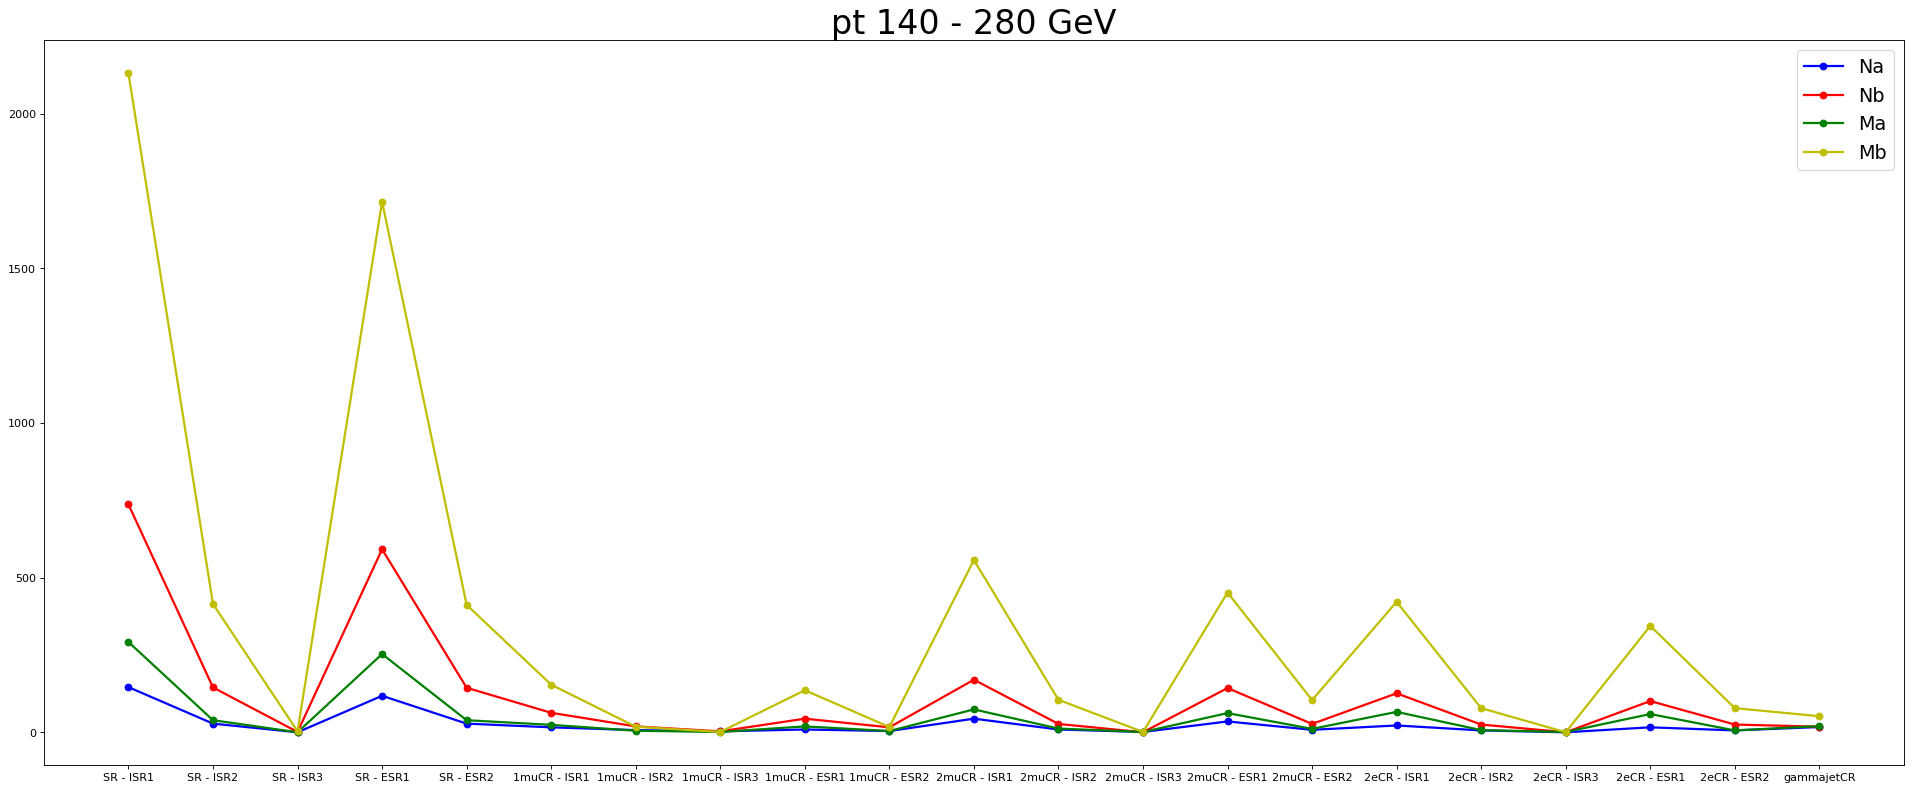

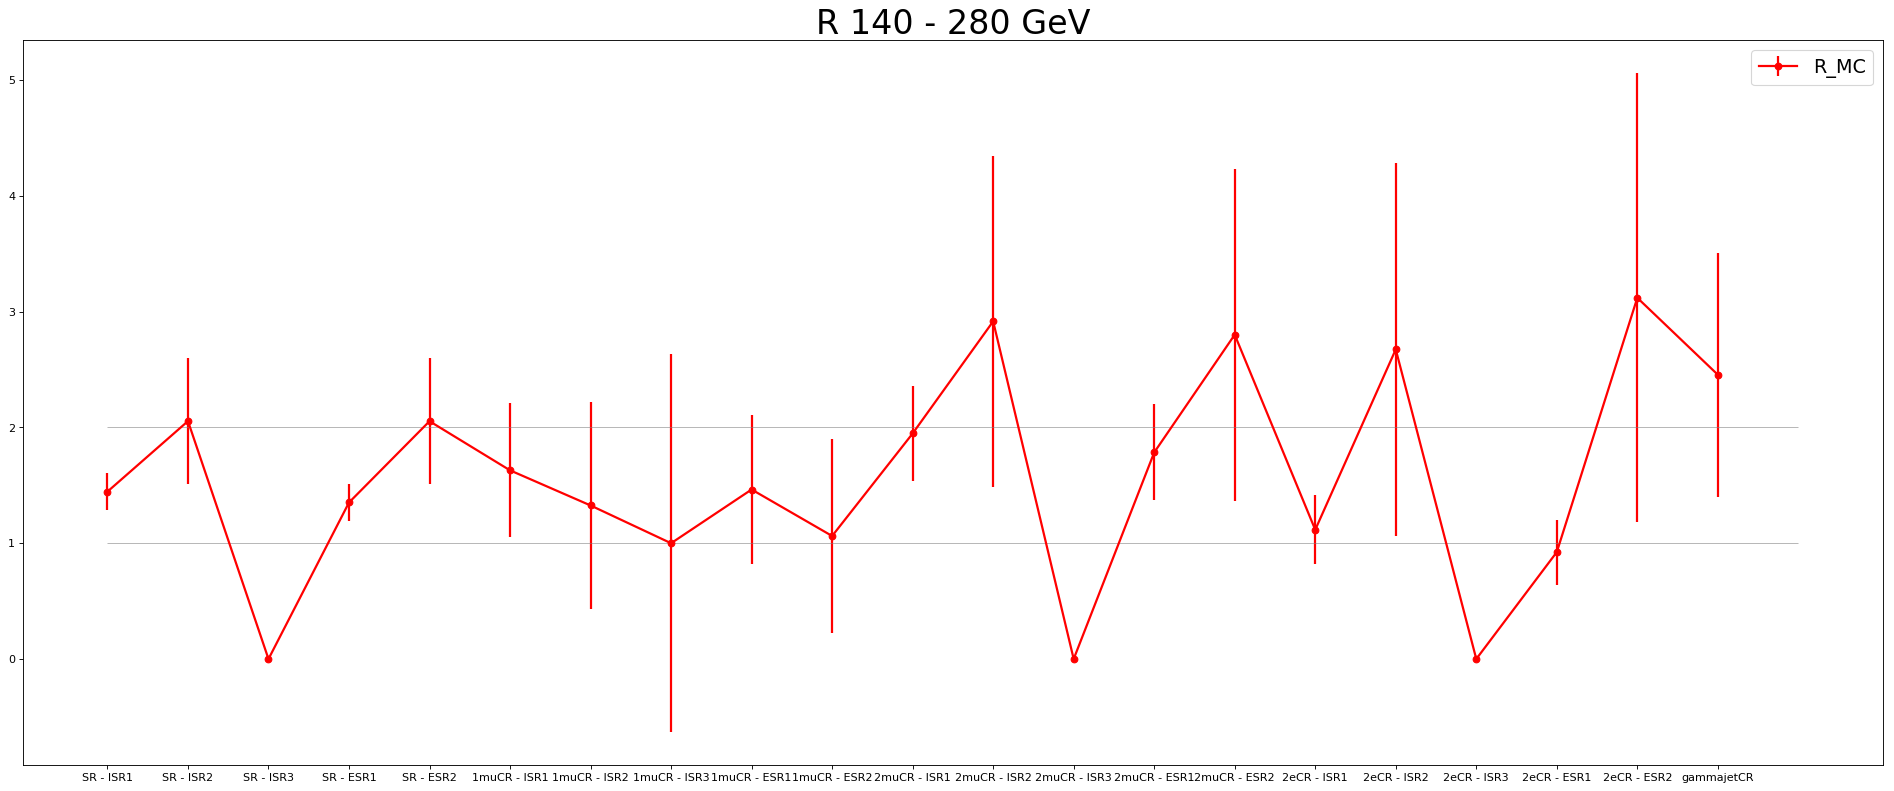

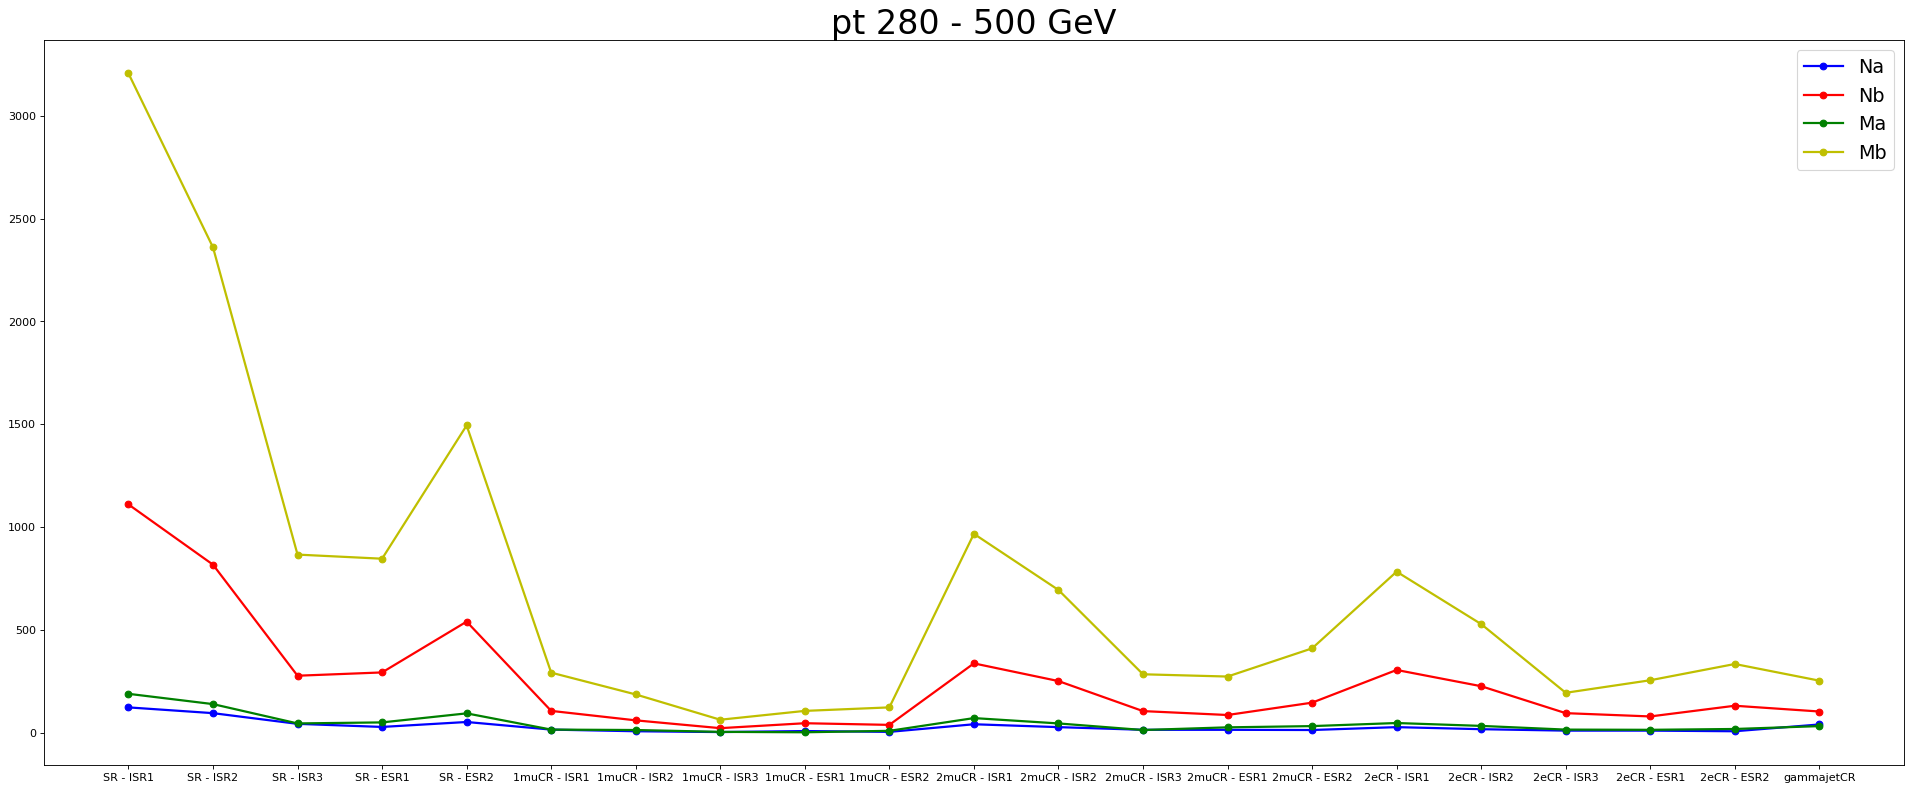

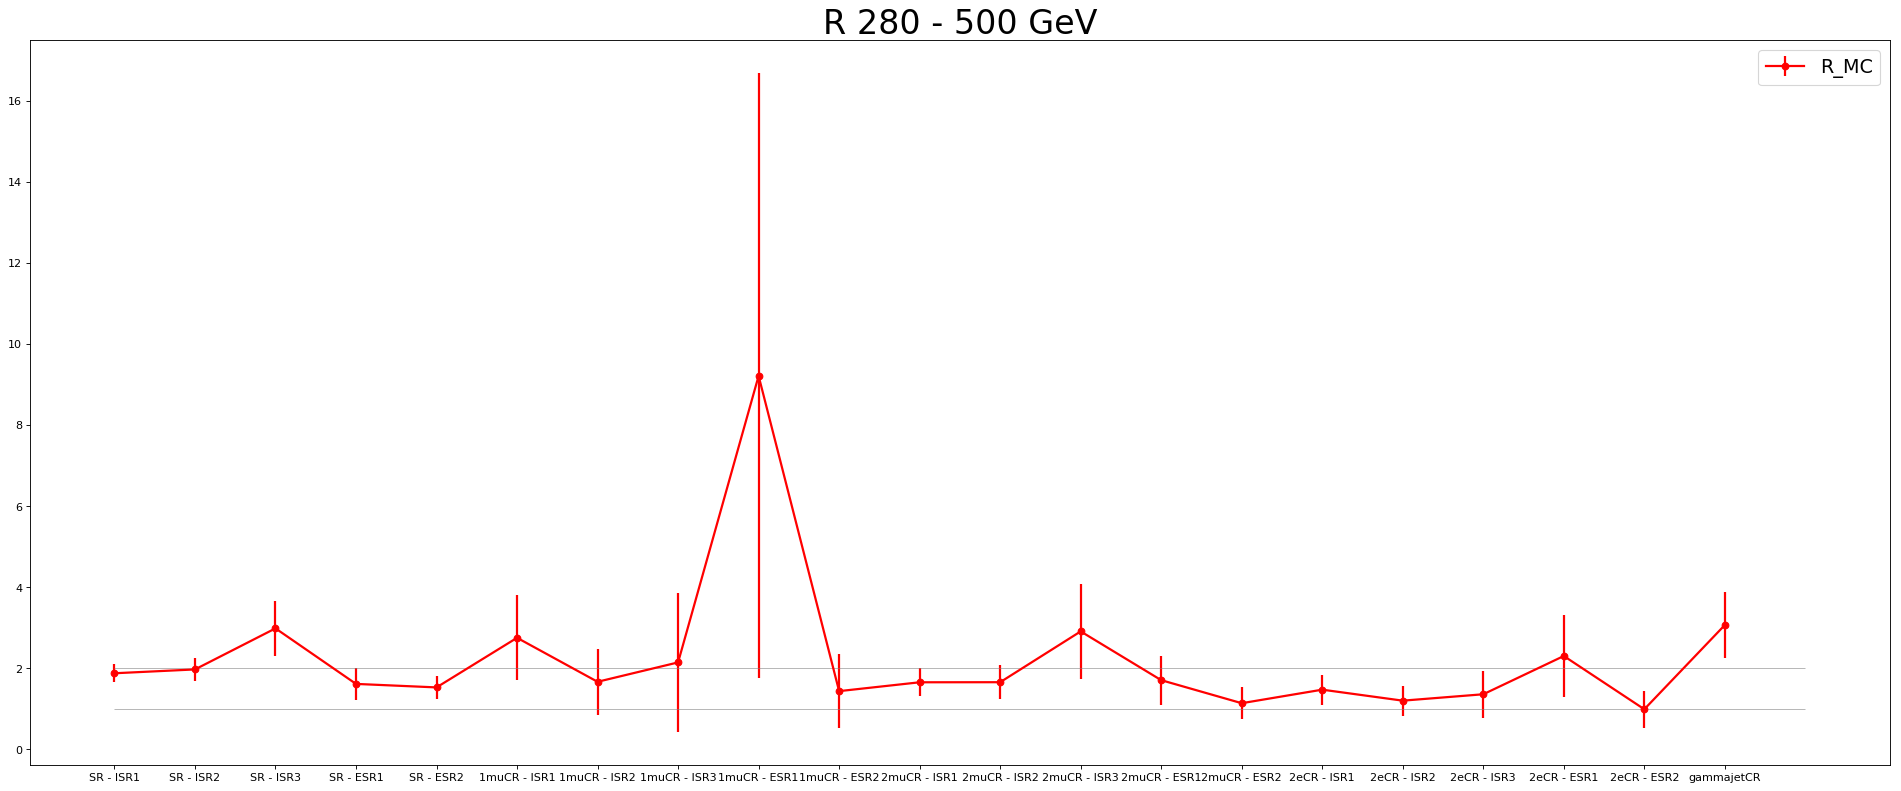

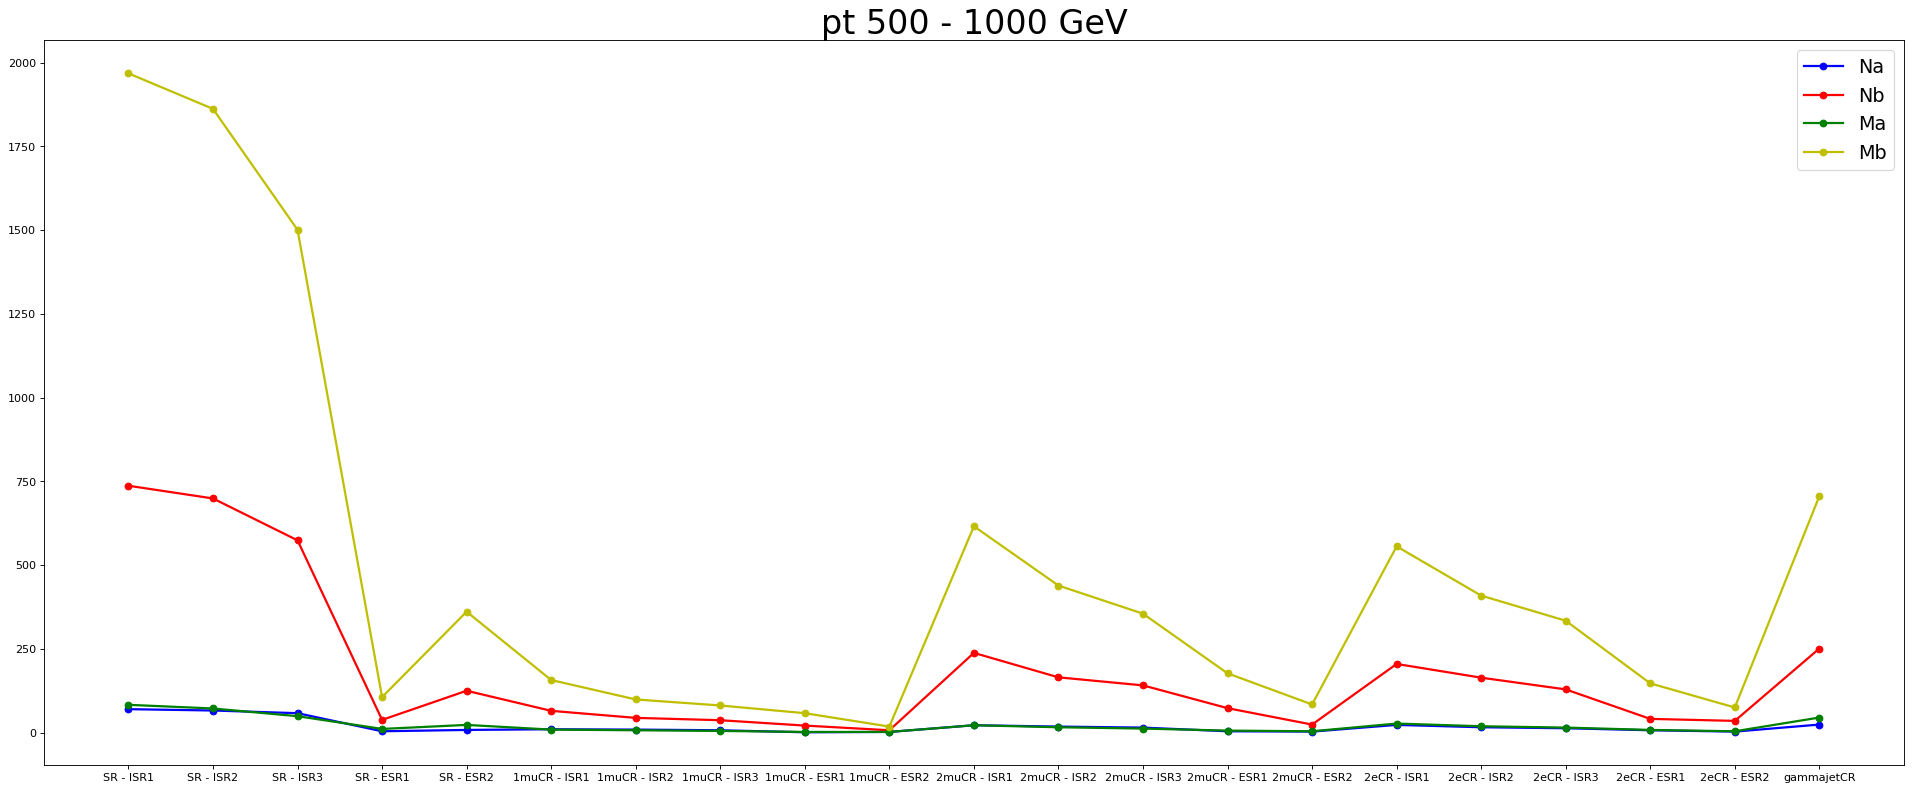

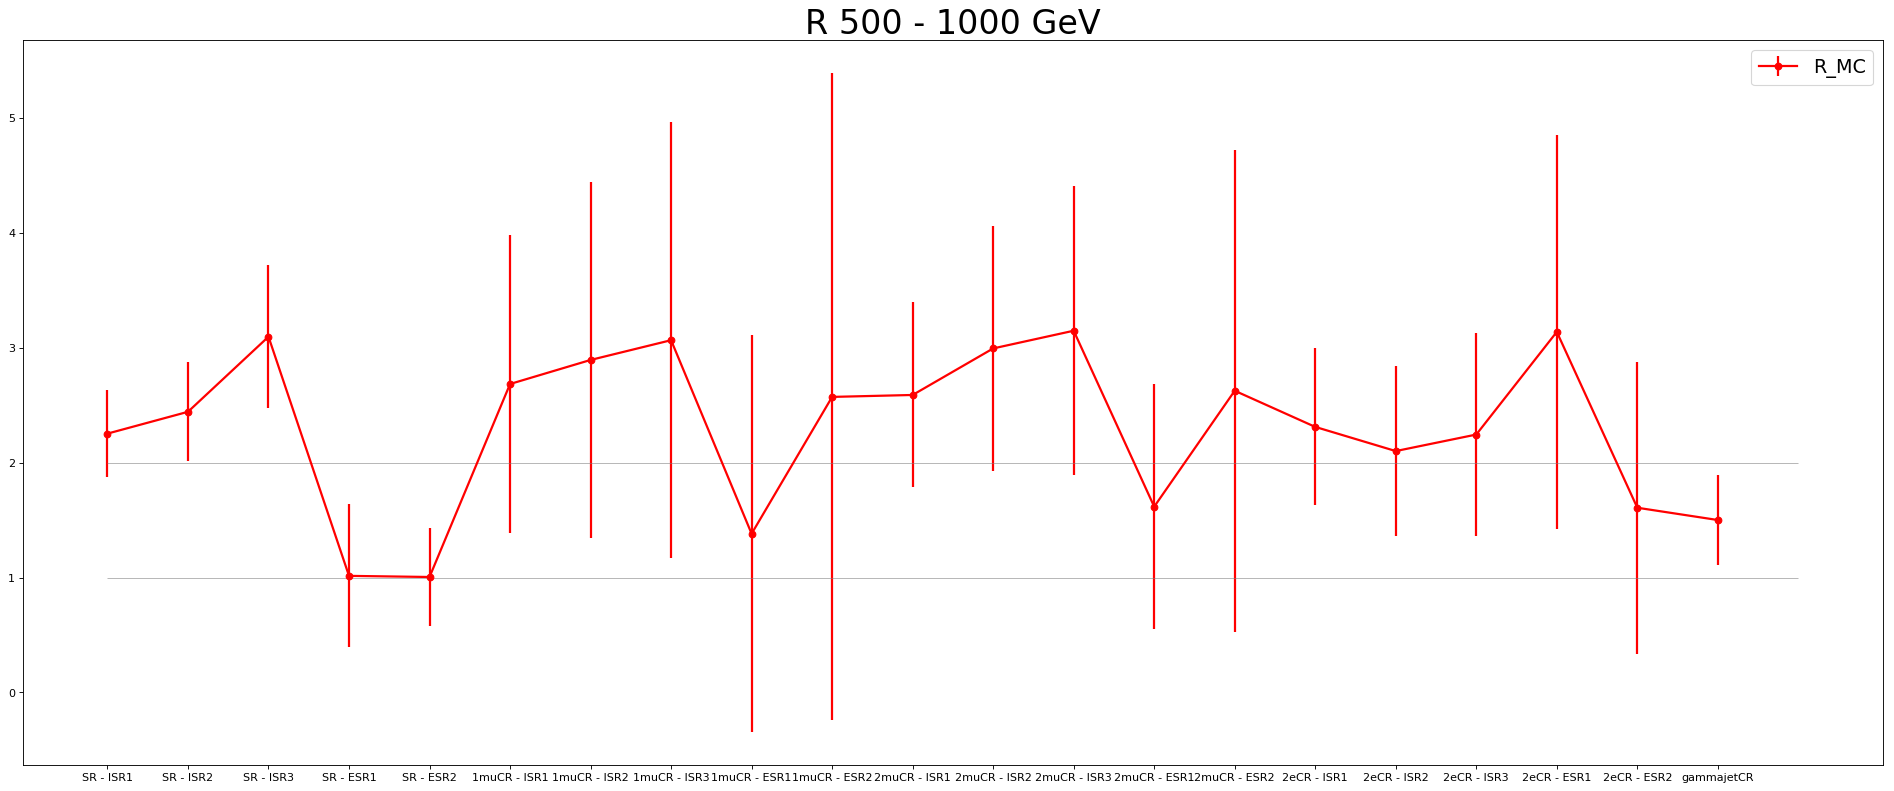

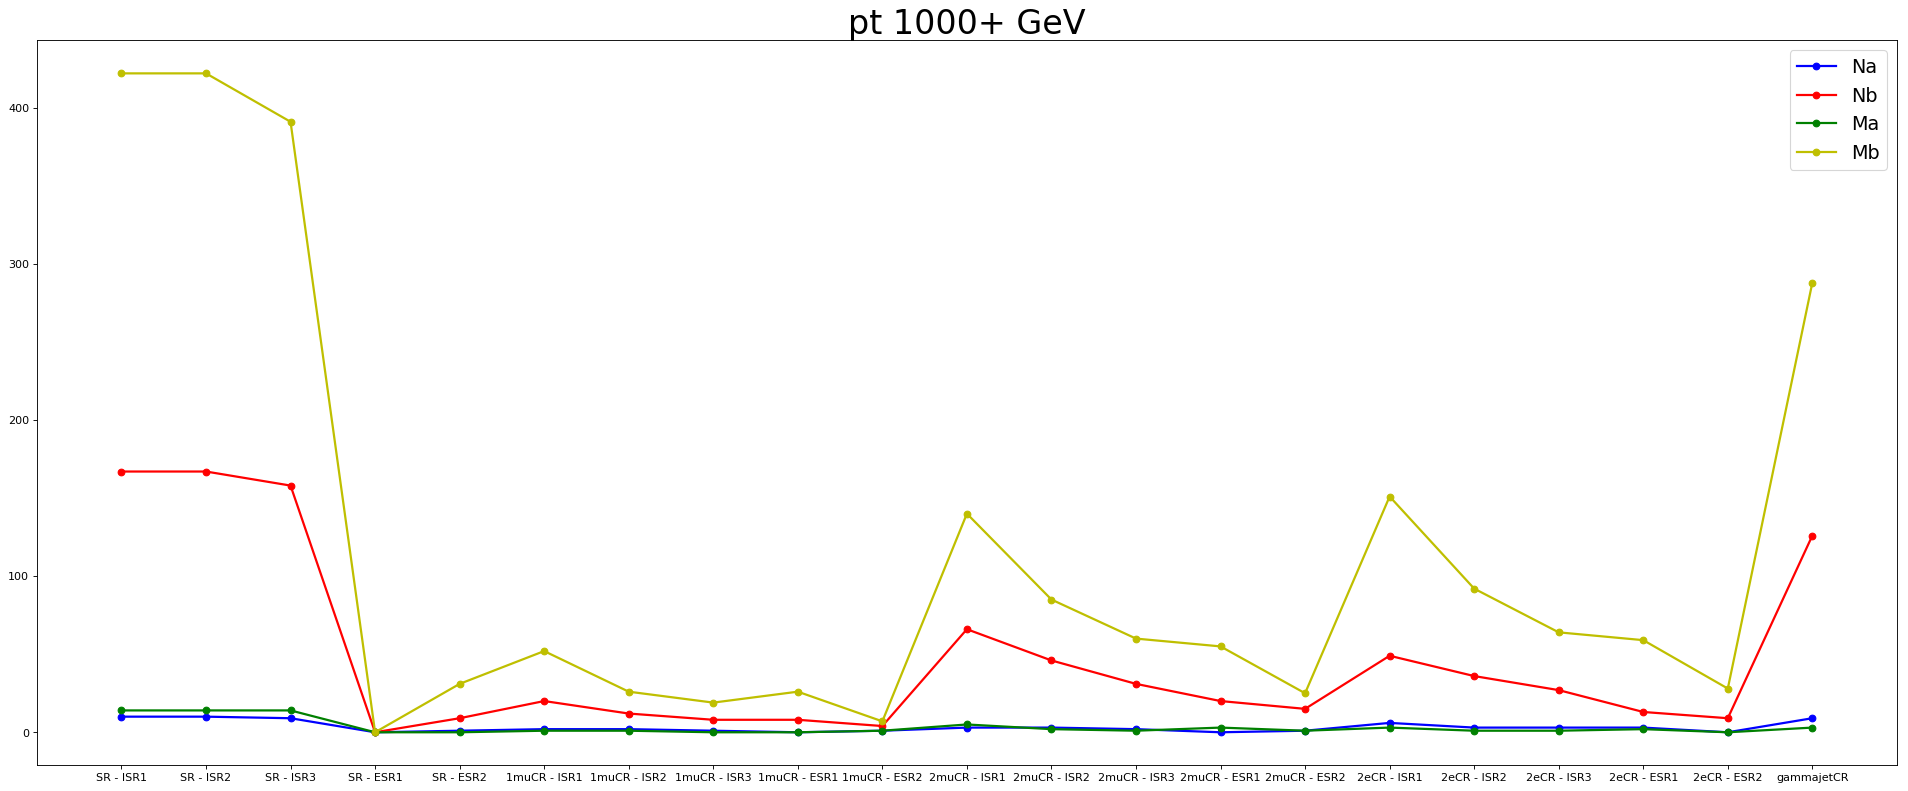

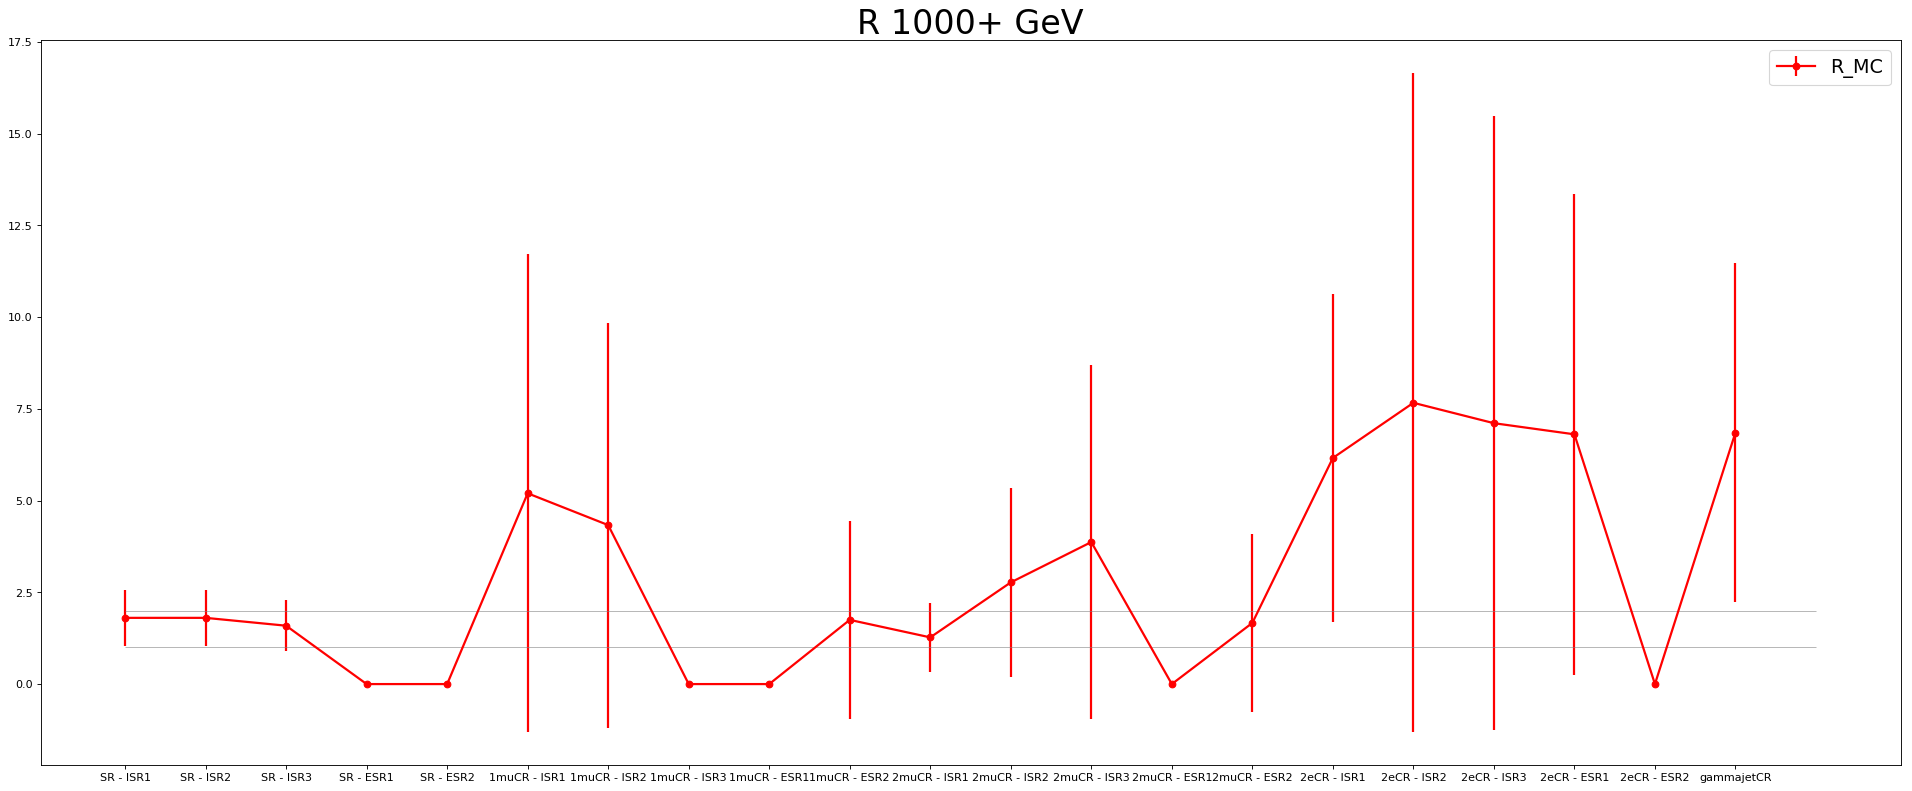

In [6]:

keys = sorted(listdir(PATH_Zjets_non_pesati))
for i in range(len(keys)):
    keys[i] = keys[i].split(".")[0]


values = []
for i in range(len(keys)):
    with open(PATH_Zjets_non_pesati+"/"+keys[i]+".txt", "r") as f:
        values.append(yaml.load(f, Loader=yaml.SafeLoader))


regions = list(values[0].keys())
data = dict(zip(keys, values))

x = [i for i in range(21)]

# CVetoBVeto + CFilterBVeto

Zjets_0_70     = ["364100", "364101", "364114", "364115", "364128", "364129"]
Zjets_70_140   = ["364103", "364104", "364117", "364118", "364131", "364132"]
Zjets_140_280  = ["364106", "364107", "364120", "364121", "364134", "364135", "364148", "364149"]
Zjets_280_500  = ["364109", "364110", "364123", "364124", "364137", "364138", "364151", "364152"]
Zjets_500_1000 = ["364112", "364126", "364140", "364154"]
Zjets_1000     = ["364113", "364127", "364141", "364155"]

Zjets = [Zjets_0_70, Zjets_70_140, Zjets_140_280, Zjets_280_500, Zjets_500_1000, Zjets_1000]
slices = ["0 - 70", "70 - 140", "140 - 280", "280 - 500", "500 - 1000", "1000+"]


for i in range(len(Zjets)):
    
    Na = [0 for _ in range(21)]
    Nb = [0 for _ in range(21)]
    Ma = [0 for _ in range(21)]
    Mb = [0 for _ in range(21)]
    
    for j in range(len(Zjets[i])):
        for k in range(21):
            Na[k] = Na[k] + data[Zjets[i][j]][regions[k]]["Na_b"]
            Nb[k] = Nb[k] + data[Zjets[i][j]][regions[k]]["Nb_b"]
            Ma[k] = Ma[k] + data[Zjets[i][j]][regions[k]]["Ma_b"]
            Mb[k] = Mb[k] + data[Zjets[i][j]][regions[k]]["Mb_b"]
        
    plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

    plt.plot(x, Na, label="Na", color="b", marker="o", linestyle="-", linewidth=2)
    plt.plot(x, Nb, label="Nb", color="r", marker="o", linestyle="-", linewidth=2)
    plt.plot(x, Ma, label="Ma", color="g", marker="o", linestyle="-", linewidth=2)
    plt.plot(x, Mb, label="Mb", color="y", marker="o", linestyle="-", linewidth=2)

    plt.xticks(range(len(regions)), regions)
    plt.legend(fontsize="xx-large")
    plt.title("pt " + slices[i] + " GeV", fontsize=30)


    # calcolo R
    R = [0 for i in range(21)]
    sigma_R = [0 for i in range(21)]

    for l in range(21):
        try:
            R[l] = (Na[l]*Mb[l])/(Nb[l]*Ma[l])
            sigma_R[l] = R[l] * math.sqrt((1/Na[l]) + (1/Nb[l]) + (1/Ma[l]) + (1/Mb[l])) 
        except (ZeroDivisionError, ValueError):
            R[l] = 0
            sigma_R[l] = 0

    plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

    plt.errorbar(x, R, yerr=sigma_R, fmt="or", linestyle="-", linewidth=2, label="R_MC") 

    plt.xticks(range(len(regions)), regions)
    plt.legend(fontsize="xx-large")
    plt.title("R " + slices[i] + " GeV", fontsize=30)

    plt.hlines(1, 0, 21, colors='gray', linestyles='solid', label='', linewidth=0.5)
    plt.hlines(2, 0, 21, colors='gray', linestyles='solid', label='', linewidth=0.5)

    if( slices[i] is ""):
        plt.axis([-1, 21, -0.5, 8])




# Merging

## Non pesati

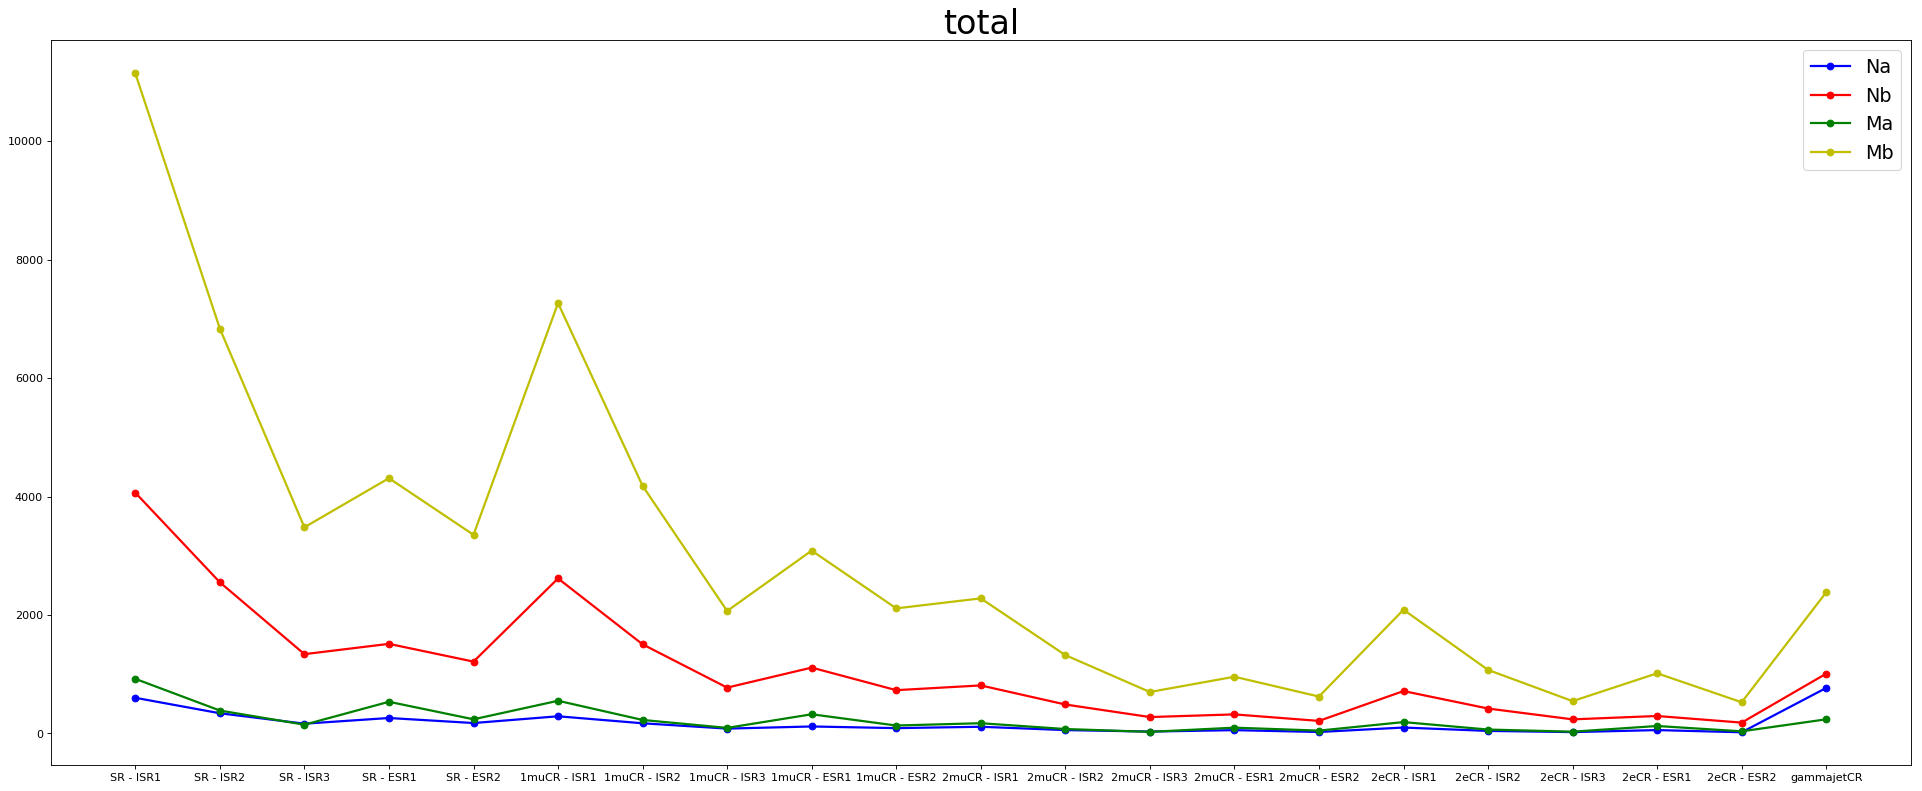

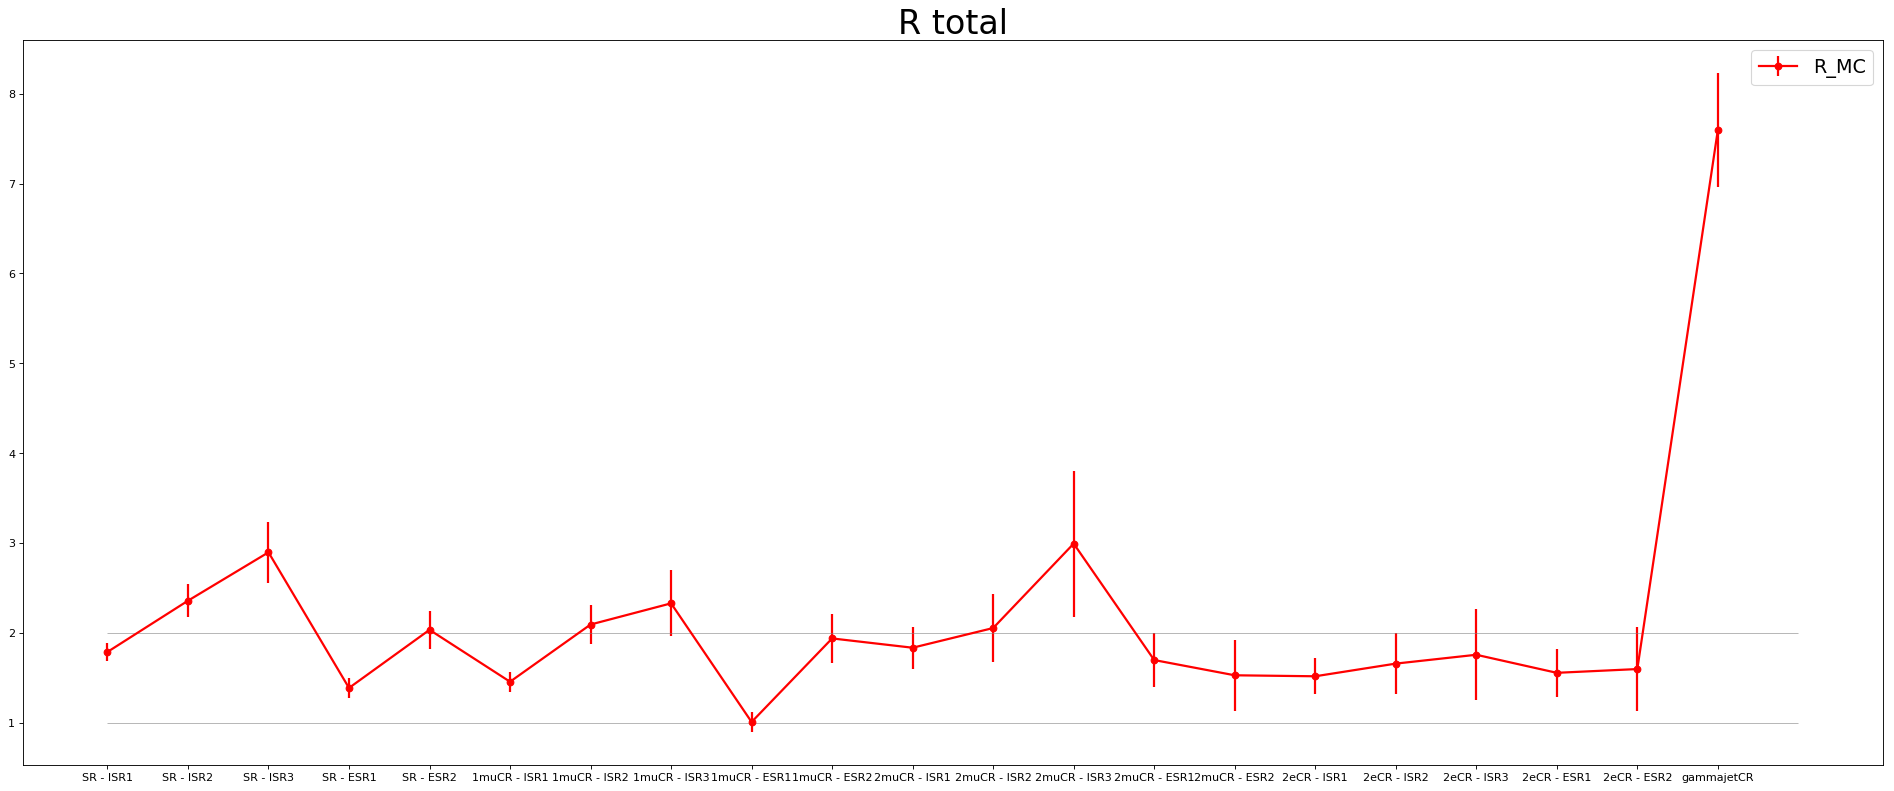

In [7]:
# Zjets
keys = sorted(listdir(PATH_Zjets_non_pesati))
for i in range(len(keys)):
    keys[i] = keys[i].split(".")[0]


values = []
for i in range(len(keys)):
    with open(PATH_Zjets_non_pesati+"/"+keys[i]+".txt", "r") as f:
        values.append(yaml.load(f, Loader=yaml.SafeLoader))


regions = list(values[0].keys())
data_Z = dict(zip(keys, values))


# Wjets
keys = sorted(listdir(PATH_Wjets_non_pesati))
for i in range(len(keys)):
    keys[i] = keys[i].split(".")[0]


values = []
for i in range(len(keys)):
    with open(PATH_Wjets_non_pesati+"/"+keys[i]+".txt", "r") as f:
        values.append(yaml.load(f, Loader=yaml.SafeLoader))


regions = list(values[0].keys())
data_W = dict(zip(keys, values))

x = [i for i in range(21)]

# CVetoBVeto + CFilterBVeto

Zjets_0_70     = ["364100", "364101", "364114", "364115", "364128", "364129"]
Zjets_70_140   = ["364103", "364104", "364117", "364118", "364131", "364132"]
Zjets_140_280  = ["364106", "364107", "364120", "364121", "364134", "364135", "364148", "364149"]
Zjets_280_500  = ["364109", "364110", "364122", "364123", "364137", "364138", "364151", "364152"]
Zjets_500_1000 = ["364112", "364126", "364140", "364154"]
Zjets_1000     = ["364113", "364127", "364141", "364155"]

Zjets = [Zjets_0_70, Zjets_70_140, Zjets_140_280, Zjets_280_500, Zjets_500_1000, Zjets_1000]

Wjets_0_70     = ["364156", "364157", "364170", "364171", "364184", "364185"]
Wjets_70_140   = ["364159", "364160", "364173", "364174", "364187", "364188"]
Wjets_140_280  = ["364162", "364163", "364176", "364177", "364190", "364191"]
Wjets_280_500  = ["364165", "364166", "364179", "364180", "364193", "364194"]
Wjets_500_1000 = ["364168", "364182", "364196"]
Wjets_1000     = ["364169", "364183", "364197"]

Wjets = [Wjets_0_70, Wjets_70_140, Wjets_140_280, Wjets_280_500, Wjets_500_1000, Wjets_1000]

slices = ["0 - 70", "70 - 140", "140 - 280", "280 - 500", "500 - 1000", "1000+"]

Na = [0 for _ in range(21)]
Nb = [0 for _ in range(21)]
Ma = [0 for _ in range(21)]
Mb = [0 for _ in range(21)]

for i in range(len(Wjets)):
    
    for j in range(len(Wjets[i])):
        for k in range(21):
            Na[k] = Na[k] + data_W[Wjets[i][j]][regions[k]]["Na_b"] 
            Nb[k] = Nb[k] + data_W[Wjets[i][j]][regions[k]]["Nb_b"] 
            Ma[k] = Ma[k] + data_W[Wjets[i][j]][regions[k]]["Ma_b"] 
            Mb[k] = Mb[k] + data_W[Wjets[i][j]][regions[k]]["Mb_b"] 
    
    for j in range(len(Zjets[i])):
        for k in range(21):
            Na[k] = Na[k] + data_Z[Zjets[i][j]][regions[k]]["Na_b"]
            Nb[k] = Nb[k] + data_Z[Zjets[i][j]][regions[k]]["Nb_b"]
            Ma[k] = Ma[k] + data_Z[Zjets[i][j]][regions[k]]["Ma_b"]
            Mb[k] = Mb[k] + data_Z[Zjets[i][j]][regions[k]]["Mb_b"]
        
plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x, Na, label="Na", color="b", marker="o", linestyle="-", linewidth=2)
plt.plot(x, Nb, label="Nb", color="r", marker="o", linestyle="-", linewidth=2)
plt.plot(x, Ma, label="Ma", color="g", marker="o", linestyle="-", linewidth=2)
plt.plot(x, Mb, label="Mb", color="y", marker="o", linestyle="-", linewidth=2)

plt.xticks(range(len(regions)), regions)
plt.legend(fontsize="xx-large")
plt.title("total", fontsize=30)


# calcolo R
R = [0 for i in range(21)]
sigma_R = [0 for i in range(21)]

for l in range(21):
    try:
        R[l] = (Na[l]*Mb[l])/(Nb[l]*Ma[l])
        sigma_R[l] = R[l] * math.sqrt((1/Na[l]) + (1/Nb[l]) + (1/Ma[l]) + (1/Mb[l])) 
    except (ZeroDivisionError, ValueError):
        R[l] = 0
        sigma_R[l] = 0

plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

plt.errorbar(x, R, yerr=sigma_R, fmt="or", linestyle="-", linewidth=2, label="R_MC") 

plt.xticks(range(len(regions)), regions)
plt.legend(fontsize="xx-large")
plt.title("R total", fontsize=30)

plt.hlines(1, 0, 21, colors='gray', linestyles='solid', label='', linewidth=0.5)
plt.hlines(2, 0, 21, colors='gray', linestyles='solid', label='', linewidth=0.5)

#if( slices[i] is ""):
#    plt.axis([-1, 21, -0.5, 8])






## Pesati

'2muCR - ISR3':
  Na: -0.8617866626009345
  Nb: 22.79094873275608
  Ma: 5.379774933680892
  Mb: 65.8302078191191
'2eCR - ISR3':
  Na: 2.0339081436395645
  Nb: 29.359965041279793
  Ma: -1.244204992428422
  Mb: 56.453979924321175


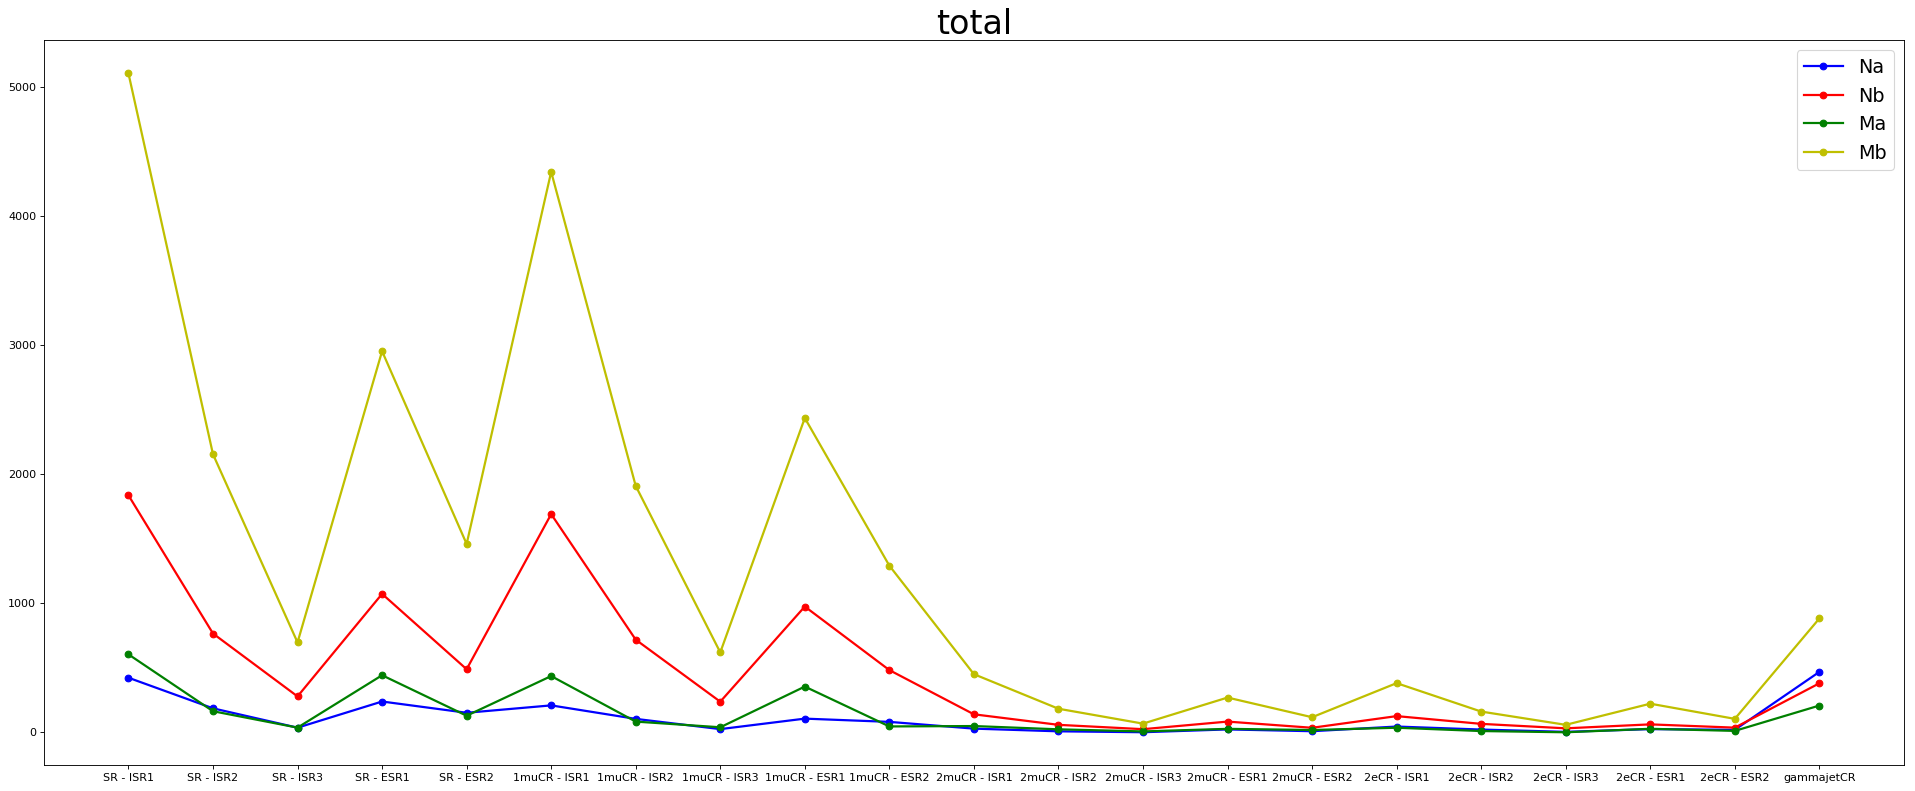

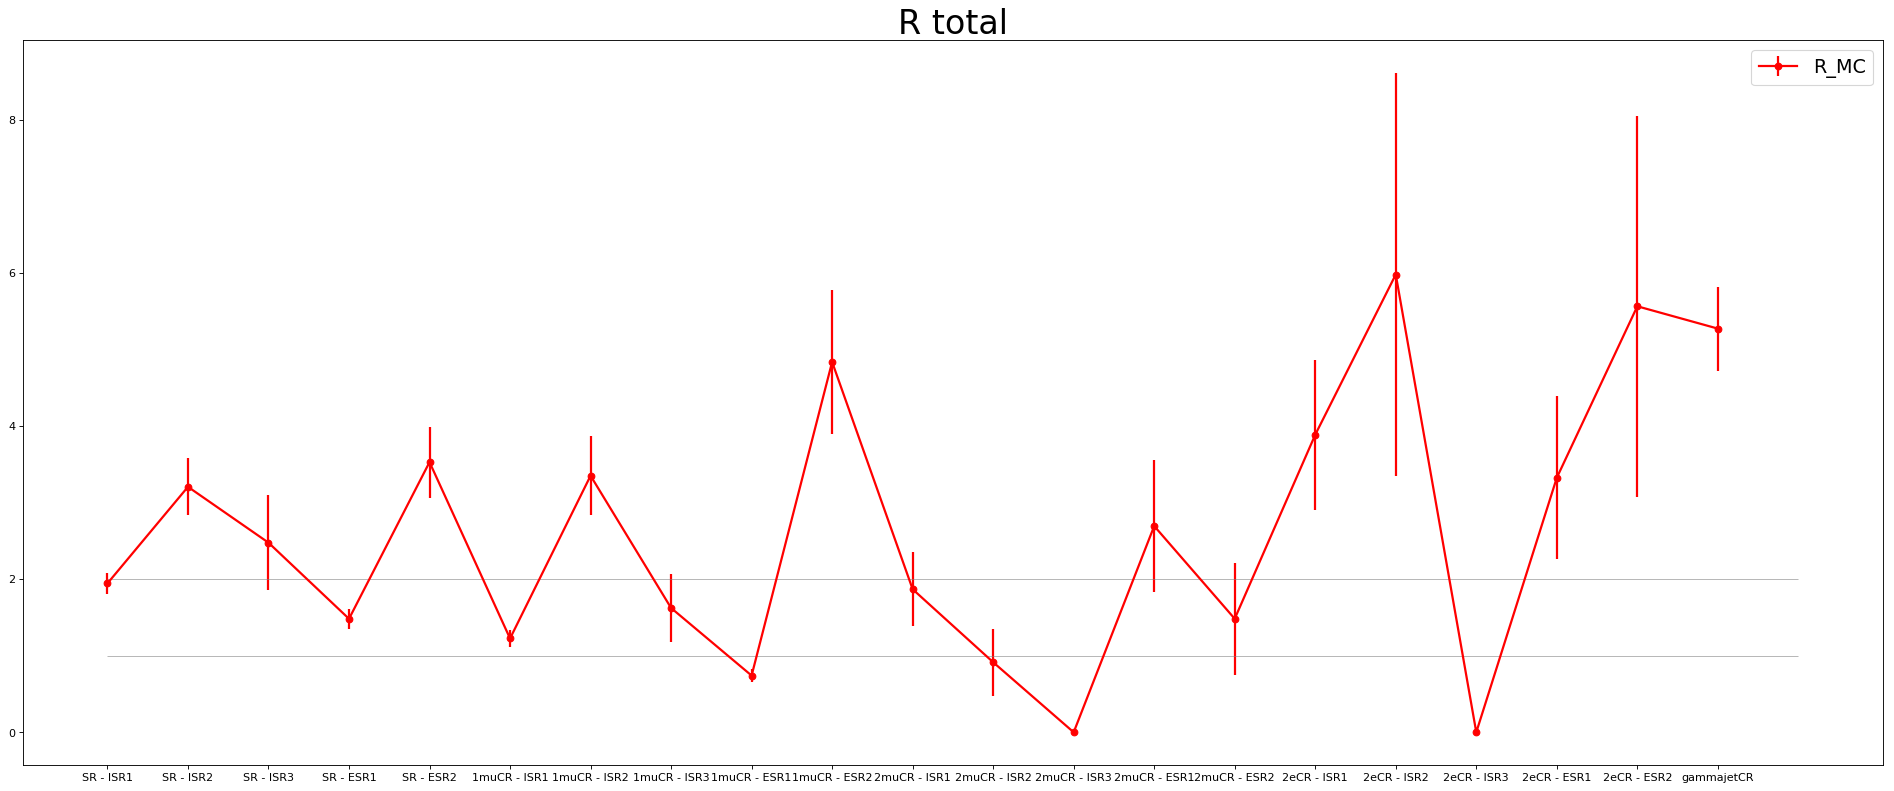

In [8]:

# Zjets
keys = sorted(listdir(PATH_Zjets_pesati))
for i in range(len(keys)):
    keys[i] = keys[i].split(".")[0]


values = []
for i in range(len(keys)):
    with open(PATH_Zjets_pesati+"/"+keys[i]+".txt", "r") as f:
        values.append(yaml.load(f, Loader=yaml.SafeLoader))


regions = list(values[0].keys())
data_Z = dict(zip(keys, values))


# Wjets
keys = sorted(listdir(PATH_Wjets_pesati))
for i in range(len(keys)):
    keys[i] = keys[i].split(".")[0]


values = []
for i in range(len(keys)):
    with open(PATH_Wjets_pesati+"/"+keys[i]+".txt", "r") as f:
        values.append(yaml.load(f, Loader=yaml.SafeLoader))


regions = list(values[0].keys())
data_W = dict(zip(keys, values))

x = [i for i in range(21)]

# CVetoBVeto + CFilterBVeto + BFilter

Zjets_0_70     = ["364100", "364101", "364102", "364114", "364115", "364116", "364128", "364129", "364130"]
Zjets_70_140   = ["364103", "364104", "364105", "364117", "364118", "364119", "364131", "364132", "364133"]
Zjets_140_280  = ["364106", "364107", "364108", "364120", "364121", "364122", "364134", "364135", "364136", "364148", "364149", "364150"]
Zjets_280_500  = ["364109", "364110", "364111", "364123", "364124", "364125", "364137", "364138", "364139", "364151", "364152", "364153"]
Zjets_500_1000 = ["364112", "364126", "364140", "364154"]
Zjets_1000     = ["364113", "364127", "364141", "364155"]

Zjets = [Zjets_0_70, Zjets_70_140, Zjets_140_280, Zjets_280_500, Zjets_500_1000, Zjets_1000]

Wjets_0_70     = ["364156", "364157", "364158", "364170", "364171", "364172", "364184", "364185", "364186"]
Wjets_70_140   = ["364159", "364160", "364161", "364173", "364174", "364175", "364187", "364188", "364189"]
Wjets_140_280  = ["364162", "364163", "364164", "364176", "364177", "364178", "364190", "364191", "364182"]
Wjets_280_500  = ["364165", "364166", "364167", "364179", "364180", "364181", "364193", "364194", "364195"]
Wjets_500_1000 = ["364168", "364182", "364196"]
Wjets_1000     = ["364169", "364183", "364197"]

Wjets = [Wjets_0_70, Wjets_70_140, Wjets_140_280, Wjets_280_500, Wjets_500_1000, Wjets_1000]

slices = ["0 - 70", "70 - 140", "140 - 280", "280 - 500", "500 - 1000", "1000+"]

Na = [0 for _ in range(21)]
Nb = [0 for _ in range(21)]
Ma = [0 for _ in range(21)]
Mb = [0 for _ in range(21)]

for i in range(len(Wjets)):
    

    for j in range(len(Wjets[i])):
        for k in range(21):
            Na[k] = Na[k] + data_W[Wjets[i][j]][regions[k]]["Na_b"] 
            Nb[k] = Nb[k] + data_W[Wjets[i][j]][regions[k]]["Nb_b"] 
            Ma[k] = Ma[k] + data_W[Wjets[i][j]][regions[k]]["Ma_b"] 
            Mb[k] = Mb[k] + data_W[Wjets[i][j]][regions[k]]["Mb_b"] 
    
    for j in range(len(Zjets[i])):
        for k in range(21):
            Na[k] = Na[k] + data_Z[Zjets[i][j]][regions[k]]["Na_b"]
            Nb[k] = Nb[k] + data_Z[Zjets[i][j]][regions[k]]["Nb_b"]
            Ma[k] = Ma[k] + data_Z[Zjets[i][j]][regions[k]]["Ma_b"]
            Mb[k] = Mb[k] + data_Z[Zjets[i][j]][regions[k]]["Mb_b"]
        
plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x, Na, label="Na", color="b", marker="o", linestyle="-", linewidth=2)
plt.plot(x, Nb, label="Nb", color="r", marker="o", linestyle="-", linewidth=2)
plt.plot(x, Ma, label="Ma", color="g", marker="o", linestyle="-", linewidth=2)
plt.plot(x, Mb, label="Mb", color="y", marker="o", linestyle="-", linewidth=2)

plt.xticks(range(len(regions)), regions)
plt.legend(fontsize="xx-large")
plt.title("total", fontsize=30)

# calcolo R
R = [0 for i in range(21)]
sigma_R = [0 for i in range(21)]

for l in range(21):
    if (Na[l]>0 and Nb[l]>0 and Ma[l]>0 and Mb[l]>0):

        try:
            R[l] = (Na[l]*Mb[l])/(Nb[l]*Ma[l])
            sigma_R[l] = R[l] * math.sqrt((1/Na[l]) + (1/Nb[l]) + (1/Ma[l]) + (1/Mb[l])) 
        except (ZeroDivisionError, ValueError):
            R[l] = 0
            sigma_R[l] = 0
    else:
        print(repr(regions[l]) + ":")
        print("  Na: " + repr(Na[l]))
        print("  Nb: " + repr(Nb[l]))
        print("  Ma: " + repr(Ma[l]))
        print("  Mb: " + repr(Mb[l]))


plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

plt.errorbar(x, R, yerr=sigma_R, fmt="or", linestyle="-", linewidth=2, label="R_MC") 

plt.xticks(range(len(regions)), regions)
plt.legend(fontsize="xx-large")
plt.title("R total", fontsize=30)

plt.hlines(1, 0, 21, colors='gray', linestyles='solid', label='', linewidth=0.5)
plt.hlines(2, 0, 21, colors='gray', linestyles='solid', label='', linewidth=0.5)

#if( slices[i] is ""):
#    plt.axis([-1, 21, -0.5, 8])





In [9]:
# media pesata sugli errori

num = 0;
den = 0;

for i in range(21):
    if sigma_R[i] is not 0:
        num = num + R[i]/pow(sigma_R[i], 2)
        den = den + 1/pow(sigma_R[i], 2)

R_p = num/den
sigma_p = math.sqrt(1/den)
print("R = " + repr(round(R_p, 4)) + " +- " + repr(round(sigma_p, 4)))
print("errore relativo: " + repr(round(100*sigma_p/R_p, 2)) + " %")

R = 1.3777 +- 0.0519
errore relativo: 3.76 %


### Merging SR + 2muCR + 2eCR di Zjets + Wjets (1mu e gammajet da sole)

Text(0.5, 1.0, 'R')

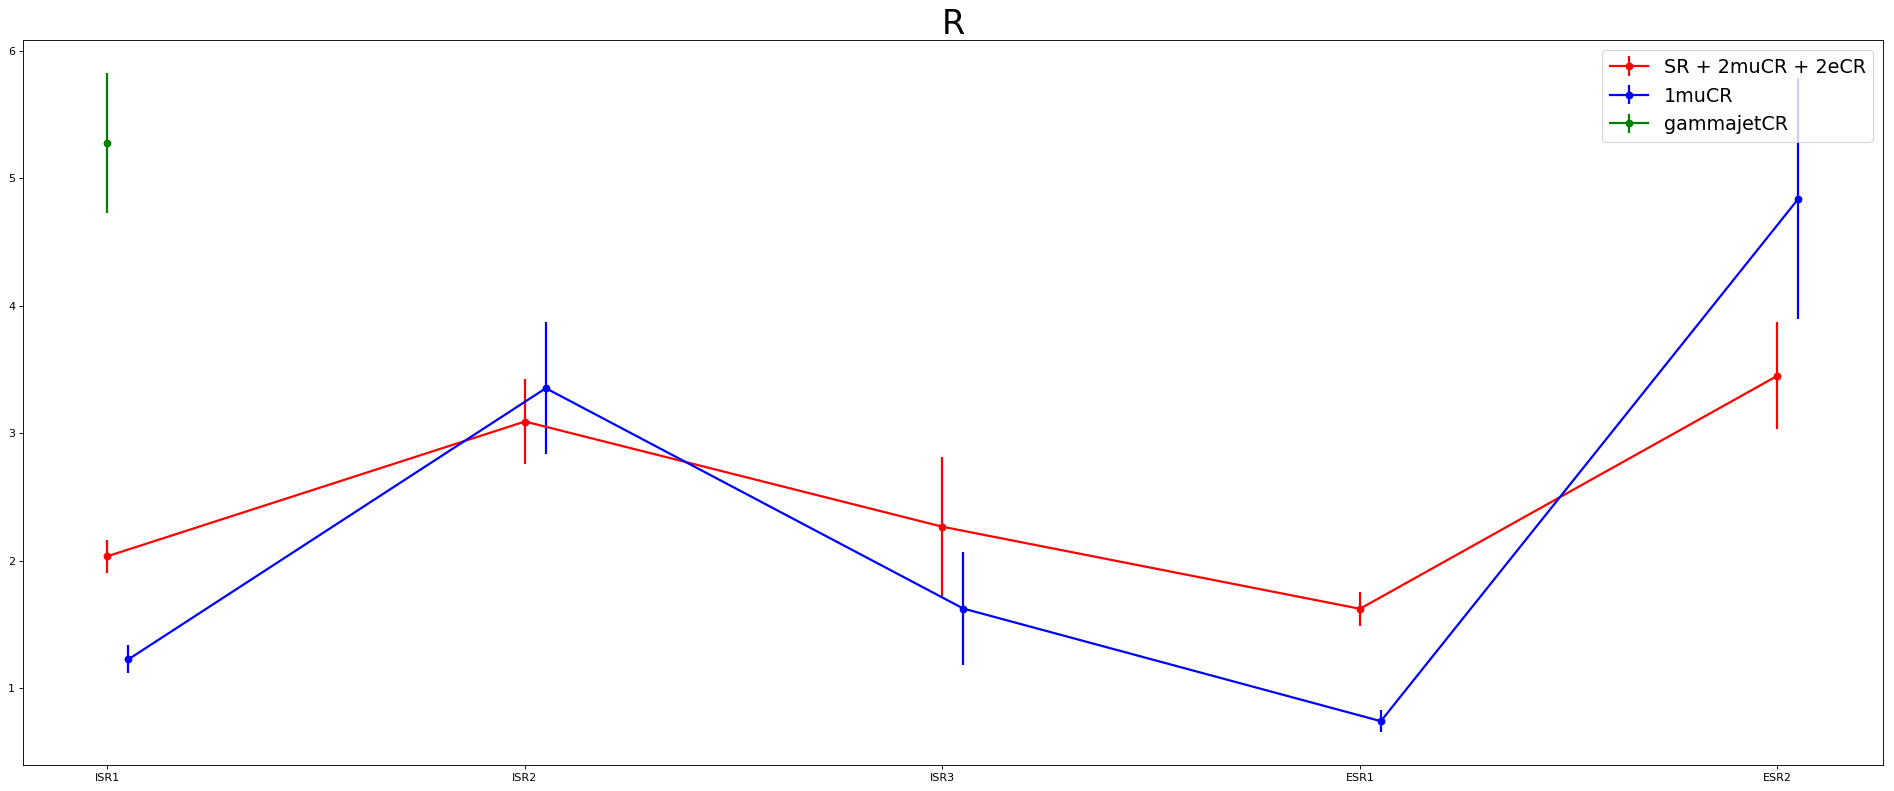

In [10]:
Na_m = [Na[i] + Na[i+10] + Na[i+15] for i in range(5)]
Nb_m = [Nb[i] + Nb[i+10] + Nb[i+15] for i in range(5)]
Ma_m = [Ma[i] + Ma[i+10] + Ma[i+15] for i in range(5)]
Mb_m = [Mb[i] + Mb[i+10] + Mb[i+15] for i in range(5)]



# calcolo R
R = [0 for i in range(5)]
sigma_R = [0 for i in range(5)]

for l in range(5):
    if (Na_m[l]>0 and Nb_m[l]>0 and Ma_m[l]>0 and Mb_m[l]>0):

        try:
            R[l] = (Na_m[l]*Mb_m[l])/(Nb_m[l]*Ma_m[l])
            sigma_R[l] = R[l] * math.sqrt((1/Na_m[l]) + (1/Nb_m[l]) + (1/Ma_m[l]) + (1/Mb_m[l])) 
        except (ZeroDivisionError, ValueError):
            R[l] = 0
            sigma_R[l] = 0
    else:
        print(repr(regions[l]) + ":")
        print("  Na: " + repr(Na_m[l]))
        print("  Nb: " + repr(Nb_m[l]))
        print("  Ma: " + repr(Ma_m[l]))
        print("  Mb: " + repr(Mb_m[l]))


plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')

plt.errorbar(list(range(5)), R, yerr=sigma_R, fmt="or", linestyle="-", linewidth=2, label="SR + 2muCR + 2eCR") 






# solo 1muCR

Na_n = [Na[i+5] for i in range(5)]
Nb_n = [Nb[i+5] for i in range(5)]
Ma_n = [Ma[i+5] for i in range(5)]
Mb_n = [Mb[i+5] for i in range(5)]



# calcolo R
R = [0 for i in range(5)]
sigma_R = [0 for i in range(5)]

for l in range(5):
    if (Na_n[l]>0 and Nb_n[l]>0 and Ma_n[l]>0 and Mb_n[l]>0):

        try:
            R[l] = (Na_n[l]*Mb_n[l])/(Nb_n[l]*Ma_n[l])
            sigma_R[l] = R[l] * math.sqrt((1/Na_n[l]) + (1/Nb_n[l]) + (1/Ma_n[l]) + (1/Mb_n[l])) 
        except (ZeroDivisionError, ValueError):
            R[l] = 0
            sigma_R[l] = 0
    else:
        print(repr(regions[l]) + ":")
        print("  Na: " + repr(Na_n[l]))
        print("  Nb: " + repr(Nb_n[l]))
        print("  Ma: " + repr(Ma_n[l]))
        print("  Mb: " + repr(Mb_n[l]))


plt.errorbar([i+0.05 for i in range(5)], R, yerr=sigma_R, fmt="ob", linestyle="-", linewidth=2, label="1muCR")


# solo gammajet
R = 0
sigma_R = 0

if (Na[20]>0 and Nb[20]>0 and Ma[20]>0 and Mb[20]>0):

    try:
        R = (Na[20]*Mb[20])/(Nb[20]*Ma[20])
        sigma_R = R * math.sqrt((1/Na[20]) + (1/Nb[20]) + (1/Ma[20]) + (1/Mb[20])) 
    except (ZeroDivisionError, ValueError):
        R = 0
        sigma_R = 0
else:
    print(repr(regions[20]) + ":")
    print("  Na: " + repr(Na[20]))
    print("  Nb: " + repr(Nb[20]))
    print("  Ma: " + repr(Ma[20]))
    print("  Mb: " + repr(Mb[20]))

plt.errorbar(0, R, yerr=sigma_R, fmt="og", linestyle="-", linewidth=2, label="gammajetCR")

plt.xticks(range(5), ["ISR1", "ISR2", "ISR3", "ESR1", "ESR2"])
plt.legend(fontsize="xx-large")
plt.title("R", fontsize=30)


